<h1> QRT Grand Data Challenge

<h2> 1. Dataset overview and imports

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold



print('Imports completed')

Imports completed


In [141]:
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv')
sample = pd.read_csv('data/sample_submission.csv')

In [100]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ROW_ID              7735 non-null   int64  
 1   TS                  7735 non-null   object 
 2   ALLOCATION          7735 non-null   object 
 3   RET_20              7735 non-null   float64
 4   RET_19              7735 non-null   float64
 5   RET_18              7735 non-null   float64
 6   RET_17              7735 non-null   float64
 7   RET_16              7735 non-null   float64
 8   RET_15              7735 non-null   float64
 9   RET_14              7735 non-null   float64
 10  RET_13              7735 non-null   float64
 11  RET_12              7735 non-null   float64
 12  RET_11              7735 non-null   float64
 13  RET_10              7735 non-null   float64
 14  RET_9               7735 non-null   float64
 15  RET_8               7735 non-null   float64
 16  RET_7 

In [101]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180245 entries, 0 to 180244
Data columns (total 44 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ROW_ID              180245 non-null  int64  
 1   TS                  180245 non-null  object 
 2   ALLOCATION          180245 non-null  object 
 3   RET_20              180245 non-null  float64
 4   RET_19              180245 non-null  float64
 5   RET_18              180245 non-null  float64
 6   RET_17              180245 non-null  float64
 7   RET_16              180245 non-null  float64
 8   RET_15              180245 non-null  float64
 9   RET_14              180245 non-null  float64
 10  RET_13              180245 non-null  float64
 11  RET_12              180245 non-null  float64
 12  RET_11              180245 non-null  float64
 13  RET_10              180245 non-null  float64
 14  RET_9               180245 non-null  float64
 15  RET_8               180245 non-nul

In [102]:
X_train.describe()

,ROW_ID,RET_20,RET_19,RET_18,RET_17,RET_16,RET_15,RET_14,RET_13,RET_12,...,SIGNED_VOLUME_9,SIGNED_VOLUME_8,SIGNED_VOLUME_7,SIGNED_VOLUME_6,SIGNED_VOLUME_5,SIGNED_VOLUME_4,SIGNED_VOLUME_3,SIGNED_VOLUME_2,SIGNED_VOLUME_1,AVG_DAILY_TURNOVER
count,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,...,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000,180245.000000
mean,90122.000000,0.000049,0.000047,0.000048,0.000044,0.000046,0.000047,0.000048,0.000051,0.000047,...,0.346875,0.346634,0.345756,0.345852,0.346303,0.346012,0.345476,0.347039,0.312530,0.090553
std,52032.393972,0.003219,0.003221,0.003218,0.003210,0.003224,0.003230,0.003230,0.003232,0.003236,...,1.459649,1.457869,1.456189,1.456412,1.451778,1.451993,1.453936,1.455624,1.258024,0.211366
min,0.000000,-0.034057,-0.033873,-0.033873,-0.033873,-0.033880,-0.033880,-0.033880,-0.033880,-0.033868,...,-67.664980,-67.664980,-67.664980,-67.664980,-67.664980,-67.664980,-67.664980,-67.664980,-45.866750,0.000060
25%,45061.000000,-0.001297,-0.001297,-0.001299,-0.001302,-0.001301,-0.001301,-0.001299,-0.001296,-0.001300,...,-0.622953,-0.622107,-0.621620,-0.621587,-0.623241,-0.624514,-0.626985,-0.631204,-0.500096,0.004642
50%,90122.000000,0.000036,0.000035,0.000036,0.000034,0.000033,0.000034,0.000036,0.000036,0.000033,...,0.746502,0.745122,0.744565,0.745393,0.746206,0.747261,0.747909,0.752970,0.632397,0.019241
75%,135183.000000,0.001394,0.001391,0.001393,0.001390,0.001391,0.001396,0.001397,0.001398,0.001395,...,1.106023,1.105206,1.103555,1.103333,1.104396,1.104378,1.104410,1.106166,0.975190,0.058259
max,180244.000000,0.038305,0.038305,0.038199,0.038199,0.038199,0.038199,0.038199,0.038199,0.038199,...,74.096560,74.096560,74.096560,74.096560,45.691677,45.691677,45.463356,45.463356,46.314335,1.580719


In [103]:
X_train.describe(include='O')

,TS,ALLOCATION
count,180245,180245
unique,2773,65
top,DATE_0001,ALLOCATION_01
freq,65,2773


In [104]:
X_train.head()

,ROW_ID,TS,ALLOCATION,RET_20,RET_19,RET_18,RET_17,RET_16,RET_15,RET_14,...,SIGNED_VOLUME_9,SIGNED_VOLUME_8,SIGNED_VOLUME_7,SIGNED_VOLUME_6,SIGNED_VOLUME_5,SIGNED_VOLUME_4,SIGNED_VOLUME_3,SIGNED_VOLUME_2,SIGNED_VOLUME_1,AVG_DAILY_TURNOVER
0,0,DATE_0001,ALLOCATION_01,-0.002477,0.004826,0.005374,-0.001688,-0.000152,-0.000685,-0.002217,...,-1.016154,-1.011450,-1.171714,-0.729594,-1.208138,-1.215123,-0.848346,-0.642461,-0.203447,0.054324
1,1,DATE_0001,ALLOCATION_02,0.006863,-0.005265,-0.004249,0.002686,-0.002638,0.003056,0.002712,...,0.896098,1.429419,0.946527,1.059767,0.988289,0.956915,0.943508,0.124168,0.081083,0.015669
2,2,DATE_0001,ALLOCATION_03,-0.005535,0.008541,0.005360,-0.002491,0.004679,-0.000848,-0.007197,...,-0.889142,-0.939257,-0.980370,-0.863196,-0.839662,-0.882459,-1.172723,-0.863937,-0.695998,0.057961
3,3,DATE_0001,ALLOCATION_04,0.003178,-0.001352,-0.004051,-0.001841,-0.005659,0.000627,0.006686,...,-1.788263,-0.807971,-1.587942,-0.042083,-1.356051,-1.007006,-1.821786,-0.455660,-1.090989,0.096004
4,4,DATE_0001,ALLOCATION_05,0.003359,-0.003349,-0.005460,0.000416,-0.003533,0.000913,0.005088,...,0.326148,1.013100,0.362135,0.774670,0.370484,-0.132558,-0.417645,-1.284208,-1.382900,0.005816


In [105]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ROW_ID              7735 non-null   int64  
 1   TS                  7735 non-null   object 
 2   ALLOCATION          7735 non-null   object 
 3   RET_20              7735 non-null   float64
 4   RET_19              7735 non-null   float64
 5   RET_18              7735 non-null   float64
 6   RET_17              7735 non-null   float64
 7   RET_16              7735 non-null   float64
 8   RET_15              7735 non-null   float64
 9   RET_14              7735 non-null   float64
 10  RET_13              7735 non-null   float64
 11  RET_12              7735 non-null   float64
 12  RET_11              7735 non-null   float64
 13  RET_10              7735 non-null   float64
 14  RET_9               7735 non-null   float64
 15  RET_8               7735 non-null   float64
 16  RET_7 

In [106]:
X_test.describe()

,ROW_ID,RET_20,RET_19,RET_18,RET_17,RET_16,RET_15,RET_14,RET_13,RET_12,...,SIGNED_VOLUME_9,SIGNED_VOLUME_8,SIGNED_VOLUME_7,SIGNED_VOLUME_6,SIGNED_VOLUME_5,SIGNED_VOLUME_4,SIGNED_VOLUME_3,SIGNED_VOLUME_2,SIGNED_VOLUME_1,AVG_DAILY_TURNOVER
count,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,...,7735.000000,7735.000000,7735.000000,7676.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000
mean,184112.000000,-0.000031,-0.000075,-0.000023,0.000016,0.000115,0.000119,0.000010,0.000065,-0.000054,...,0.391035,0.400705,0.372728,0.391833,0.368366,0.416738,0.382572,0.422824,0.291271,0.086437
std,2233.046499,0.003970,0.003473,0.002951,0.003063,0.003038,0.003591,0.003187,0.003710,0.003298,...,1.309588,1.466399,1.299512,1.321934,1.350420,1.298961,1.323287,1.299067,1.014690,0.217977
min,180245.000000,-0.069293,-0.029015,-0.029395,-0.029063,-0.021838,-0.033068,-0.025319,-0.029438,-0.023345,...,-11.636165,-48.806396,-12.053021,-10.466323,-19.391768,-10.787054,-16.648079,-9.743671,-7.725879,0.000154
25%,182178.500000,-0.001621,-0.001674,-0.001545,-0.001514,-0.001386,-0.001472,-0.001562,-0.001540,-0.001597,...,-0.539940,-0.575735,-0.536445,-0.572215,-0.616311,-0.588531,-0.578938,-0.542556,-0.385317,0.004717
50%,184112.000000,-0.000035,-0.000007,-0.000013,0.000014,0.000092,0.000003,-0.000017,0.000003,-0.000033,...,0.793514,0.813243,0.786609,0.810943,0.809134,0.839687,0.806879,0.805861,0.568110,0.016478
75%,186045.500000,0.001549,0.001553,0.001511,0.001493,0.001639,0.001540,0.001530,0.001547,0.001478,...,1.118323,1.115314,1.101853,1.143613,1.096189,1.144513,1.127580,1.115669,0.879886,0.044575
max,187979.000000,0.047968,0.025006,0.020434,0.023931,0.019229,0.037660,0.027331,0.032316,0.024474,...,10.227108,23.734669,8.011360,8.795315,10.373502,19.734356,9.067154,10.373459,6.319981,1.527174


In [107]:
X_test.describe(include='O')

,TS,ALLOCATION
count,7735,7735
unique,119,65
top,DATE_2774,ALLOCATION_01
freq,65,119


In [108]:
X_test.head(70)

,ROW_ID,TS,ALLOCATION,RET_20,RET_19,RET_18,RET_17,RET_16,RET_15,RET_14,...,SIGNED_VOLUME_9,SIGNED_VOLUME_8,SIGNED_VOLUME_7,SIGNED_VOLUME_6,SIGNED_VOLUME_5,SIGNED_VOLUME_4,SIGNED_VOLUME_3,SIGNED_VOLUME_2,SIGNED_VOLUME_1,AVG_DAILY_TURNOVER
0,180245,DATE_2774,ALLOCATION_01,-0.006869,-0.001703,-0.003348,-0.003129,-0.003368,-0.002515,-0.001182,...,1.467264,1.114890,1.227472,0.835403,1.571033,0.946056,1.691493,3.561658,0.038297,0.010310
1,180246,DATE_2774,ALLOCATION_02,-0.002409,-0.000763,0.001349,-0.002069,-0.000147,0.002263,-0.004348,...,0.212862,0.571286,0.711297,0.815702,-0.102490,0.969315,1.738142,5.400385,2.127508,0.013252
2,180247,DATE_2774,ALLOCATION_03,-0.004936,-0.001041,-0.004108,-0.002354,-0.003627,0.000263,0.001072,...,1.165160,1.004918,1.159257,1.110129,1.473592,1.013560,1.622486,2.346189,0.676293,0.013975
3,180248,DATE_2774,ALLOCATION_04,-0.008992,-0.000644,0.001352,-0.004524,-0.004002,-0.004404,0.000524,...,1.557001,1.156245,1.688199,0.553323,2.060668,0.746113,2.300634,5.564923,-0.637974,0.017026
4,180249,DATE_2774,ALLOCATION_05,-0.002797,-0.001686,0.002453,-0.000645,0.000615,-0.000624,-0.004374,...,0.135133,0.115105,0.344619,0.312612,0.932051,0.335749,1.021416,2.351529,0.030891,0.006701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,180310,DATE_2775,ALLOCATION_01,0.001492,0.003836,-0.002736,0.000867,0.001361,-0.003420,0.000498,...,1.620890,1.752802,1.987774,3.717221,1.969099,1.786482,2.277948,2.236189,1.574036,0.039296
66,180311,DATE_2775,ALLOCATION_02,-0.001004,0.000786,0.001672,-0.004822,0.000780,0.005752,-0.000114,...,2.123775,2.491327,3.982524,1.628860,1.141928,1.302914,1.949023,0.831566,1.466624,0.015080
67,180312,DATE_2775,ALLOCATION_03,0.001220,0.005028,-0.000982,0.002371,0.000495,-0.003739,-0.000054,...,1.055995,1.256934,1.335385,2.569958,1.367763,1.244728,1.655826,1.747727,1.318365,0.041072
68,180313,DATE_2775,ALLOCATION_04,0.000963,0.003119,-0.003957,-0.000383,0.001816,0.000248,0.002078,...,2.086635,1.718470,1.658662,3.006546,2.007813,1.781856,1.714665,1.876948,1.313433,0.059018


<h2> EDA + Visualization

In [109]:
ret_cols = [f'RET_{i}' for i in range(1,21)]
vol_cols = [f'SIGNED_VOLUME_{i}' for i in range(1,21)]

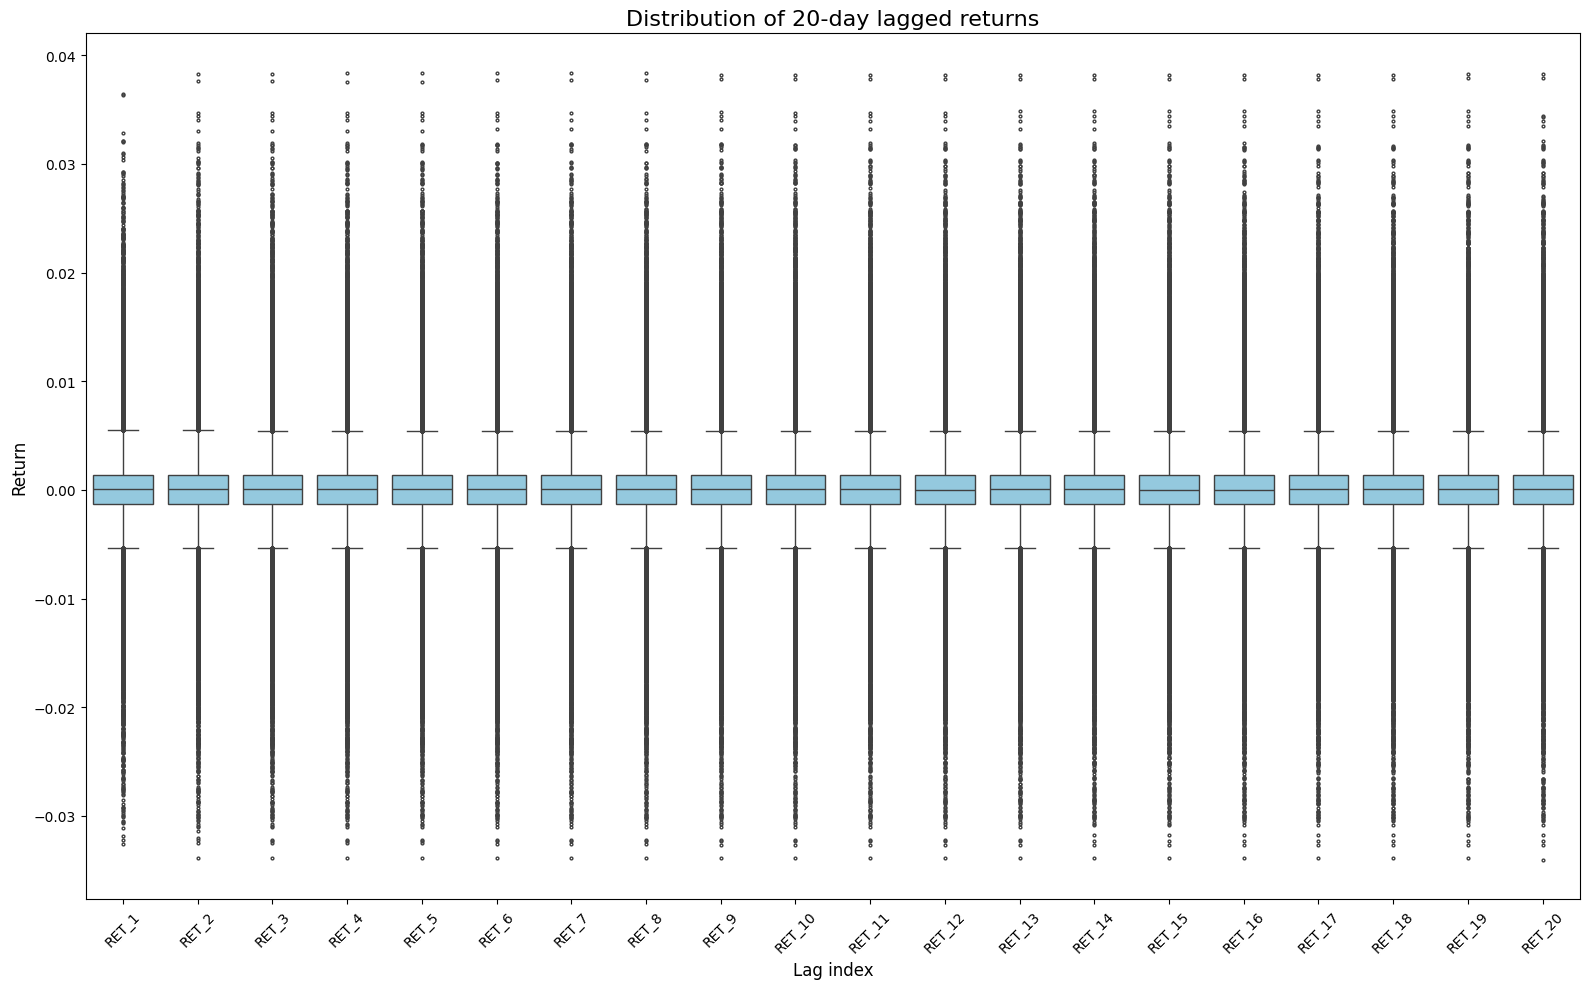

In [13]:
plt.figure(figsize=(16, 10))  # 👈 increase width and height here
sns.boxplot(data=X_train[ret_cols], color='skyblue', fliersize=2)
plt.title("Distribution of 20-day lagged returns", fontsize=16)
plt.xlabel("Lag index", fontsize=12)
plt.ylabel("Return", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

Observations :
- The median seems always close to O
- A big number of outliers indicates a certain noise in the dataset

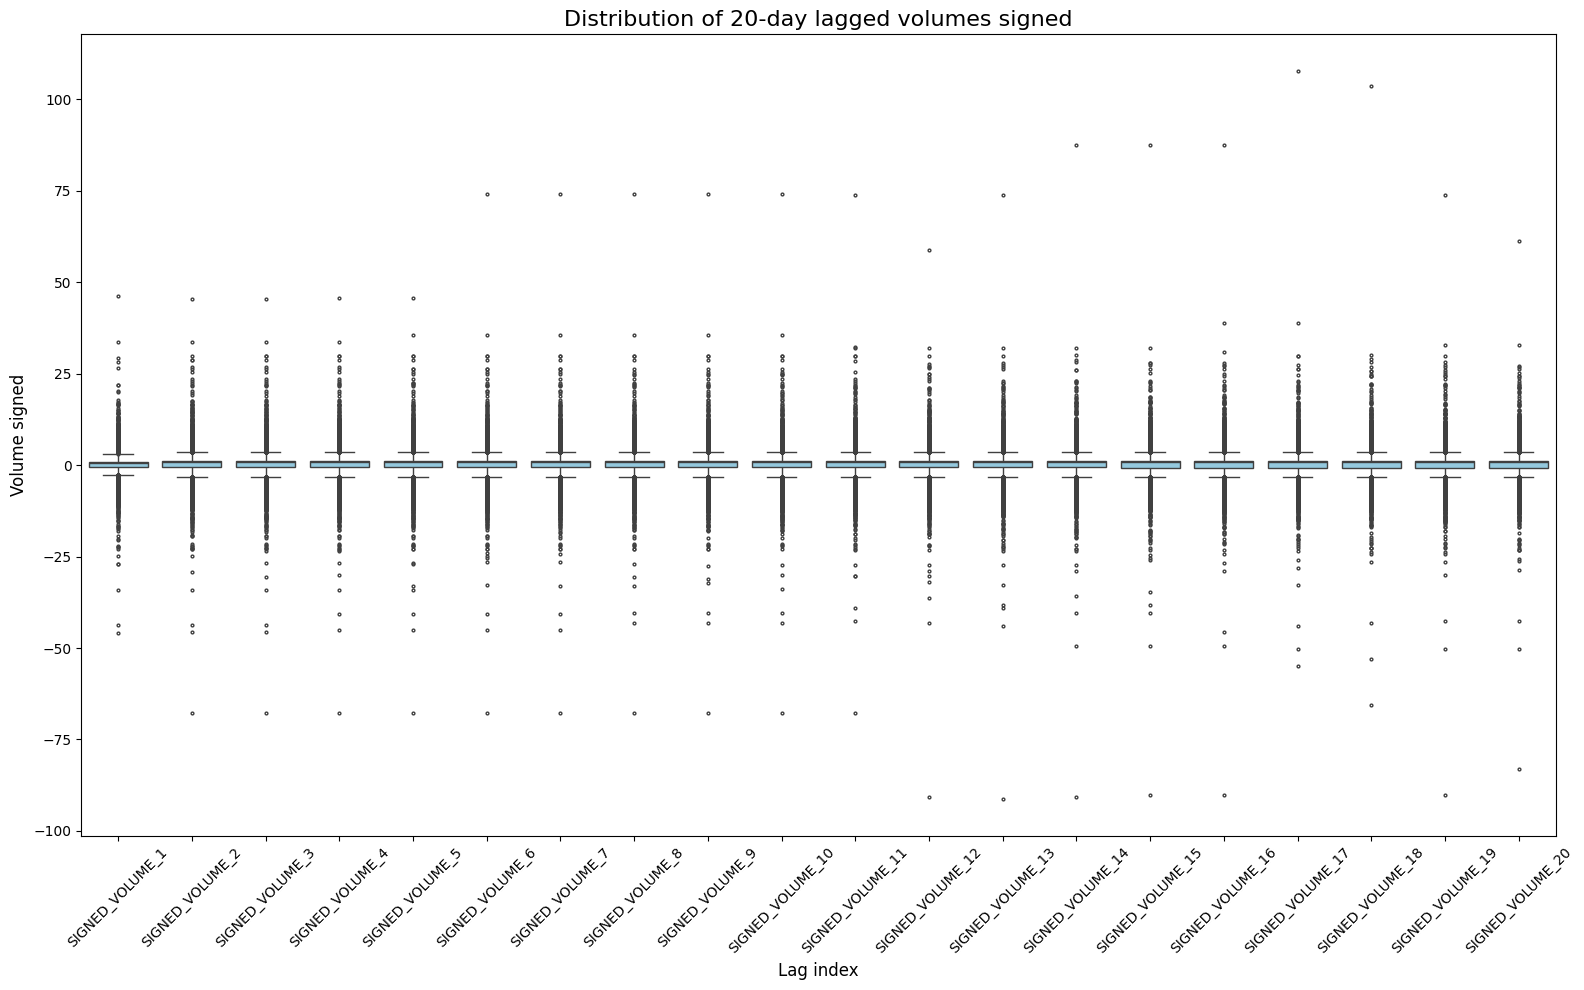

In [14]:
plt.figure(figsize=(16, 10))  # 👈 increase width and height here
sns.boxplot(data=X_train[vol_cols], color='skyblue', fliersize=2)
plt.title("Distribution of 20-day lagged volumes signed", fontsize=16)
plt.xlabel("Lag index", fontsize=12)
plt.ylabel("Volume signed", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

Still quite a few outliers !

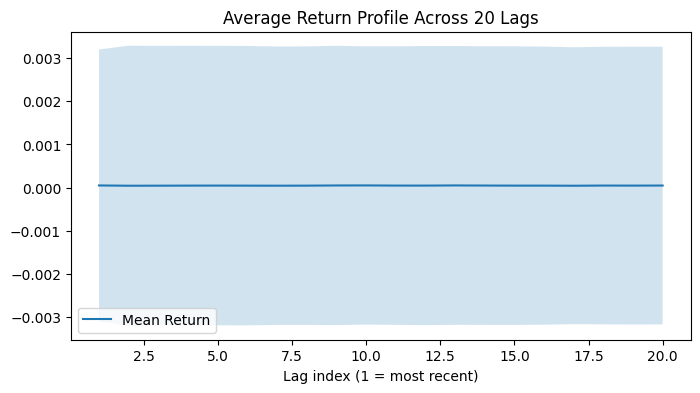

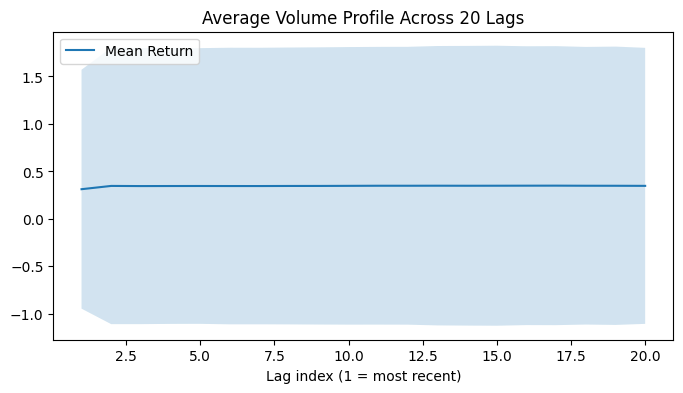

In [15]:
mean_returns = X_train[ret_cols].mean()
mean_volumes = X_train[vol_cols].mean()
std_returns = X_train[ret_cols].std()
std_volumes = X_train[vol_cols].std()



plt.figure(figsize=(8, 4))
plt.plot(range(1, 21), mean_returns, label="Mean Return")
plt.fill_between(range(1, 21),
                 mean_returns - std_returns,
                 mean_returns + std_returns,
                 alpha=0.2)
plt.title("Average Return Profile Across 20 Lags")
plt.xlabel("Lag index (1 = most recent)")
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(range(1, 21), mean_volumes, label="Mean Return")
plt.fill_between(range(1, 21),
                 mean_volumes- std_volumes,
                 mean_volumes + std_volumes,
                 alpha=0.2)
plt.title("Average Volume Profile Across 20 Lags")
plt.xlabel("Lag index (1 = most recent)")
plt.legend()
plt.show()


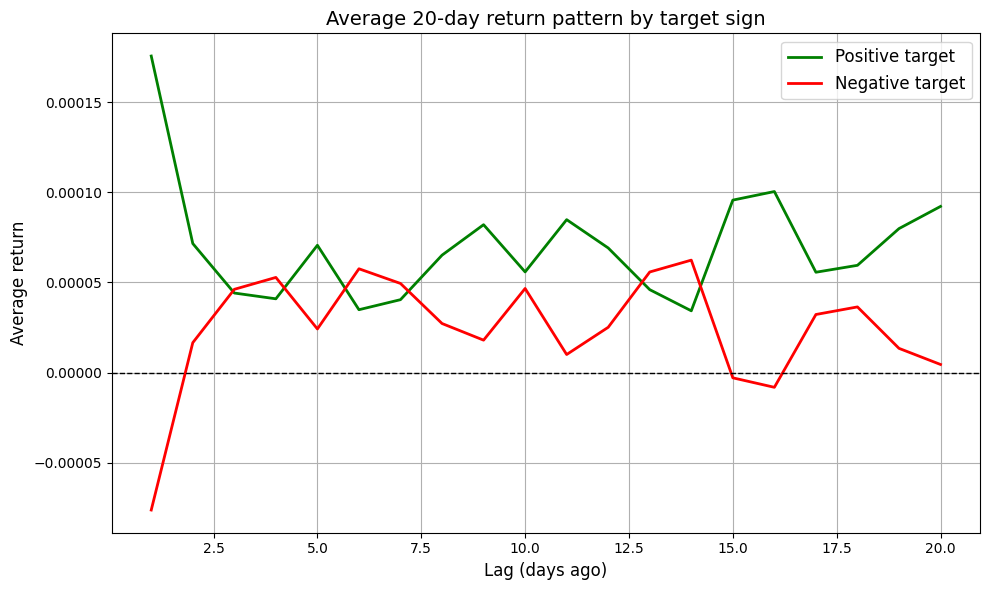

In [16]:
pos_index = (y_train[(y_train.target >0)]).index
neg_index = (y_train[(y_train.target <=0)]).index
pos = X_train.iloc[pos_index,:][ret_cols]
neg = X_train.iloc[neg_index,:][ret_cols]

mean_pos = pos.mean()
mean_neg = neg.mean()

# Plot both on same figure
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), mean_pos, label="Positive target", color="green", linewidth=2)
plt.plot(range(1, 21), mean_neg, label="Negative target", color="red", linewidth=2)

# Optional: add a horizontal line at 0
plt.axhline(0, color="black", linestyle="--", linewidth=1)

# Titles and legend
plt.title("Average 20-day return pattern by target sign", fontsize=14)
plt.xlabel("Lag (days ago)", fontsize=12)
plt.ylabel("Average return", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
y_train = y_train.drop(columns=['ROW_ID'])

In [32]:
pd.DataFrame((y_train.target>0).astype(int))

,target
0,1
1,0
2,1
3,0
4,0
...,...
180240,0
180241,1
180242,0
180243,1


Feature engineering of Olivier

In [207]:
def feature_engineering(X):
    
    RET_features = [f'RET_{i}' for i in range(1, 20)]
    SIGNED_VOLUME_features = [f'SIGNED_VOLUME_{i}' for i in range(1, 20)]
    TURNOVER_features = ['AVG_DAILY_TURNOVER']

    for i in range(2,21):
        X[f'AVERAGE_PERF_{i}'] = X[RET_features[:i]].mean(1)
        X[f'ALLOCATIONS_AVERAGE_PERF_{i}'] = X.groupby('TS')[f'AVERAGE_PERF_{i}'].transform('mean')
        X[f'AVERAGE_VOL_{i}'] = X[SIGNED_VOLUME_features[:i]].mean(1)
        X[f'STD_PERF_{i}'] = X[RET_features[:i]].std(axis=1)
        X[f'STD_VOL_{i}'] = X[SIGNED_VOLUME_features[:i]].std(axis=1)



    X["RET_VOLATILITY_20"] = X[RET_features].std(axis=1)
    X["RET_MOMENTUM"] = X["RET_1"] - X[RET_features].mean(axis=1)
    X["RET_SHARPE"] = X["RET_MOMENTUM"] / (X["RET_VOLATILITY_20"] + 1e-6)
    X["SIGNED_VOLUME_VOL"] = X[SIGNED_VOLUME_features].std(axis=1)
    X["TS_num"] = X["TS"].str.extract("(\d+)").astype(int)
    X["RET_TREND_5"] = X["RET_20"] - X["RET_15"]
    X["VOL_TREND_5"] = X["SIGNED_VOLUME_20"] - X["SIGNED_VOLUME_15"]
    X["RET_LAG1"] = X["RET_1"]
    X["RET_DIFF1"] = X["RET_1"] - X["RET_2"]

    X["RET_SKEW_20"] = X[RET_features].skew(axis=1)
    X["RET_KURT_20"] = X[RET_features].kurt(axis=1)
    X["VOL_PERF_RATIO"] = X[SIGNED_VOLUME_features].mean(axis=1) / (X[RET_features].std(axis=1) + 1e-6)

    weights = np.linspace(1, 2, 19)
    X["RET_WEIGHTED_MOMENTUM"] = (X[RET_features].values * weights).sum(axis=1) / weights.sum()

    return X, RET_features, SIGNED_VOLUME_features, TURNOVER_features

<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\d'
/var/folders/tp/p2fdv61s7979qs0rlp6mh9qw0000gn/T/ipykernel_54693/824743120.py:20: SyntaxWarning: invalid escape sequence '\d'
  X["TS_num"] = X["TS"].str.extract("(\d+)").astype(int)


In [208]:
X_train, RET_features, SIGNED_VOLUME_features, TURNOVER_features = feature_engineering(X_train)

features = (
    RET_features
    + SIGNED_VOLUME_features
    + TURNOVER_features
    + [f'AVERAGE_PERF_{i}' for i in range(2,21)]
    + [f'AVERAGE_VOL_{i}' for i in range(2,21)]
    + [f'ALLOCATIONS_AVERAGE_PERF_{i}' for i in range(2,21)]
    + [f'STD_PERF_{i}' for i in range(2,21)]
    + [f'STD_VOL_{i}' for i in range(2,21)]
    + ["RET_VOLATILITY_20", "RET_MOMENTUM", "RET_SHARPE", "SIGNED_VOLUME_VOL","VOL_TREND_5","RET_TREND_5"]
    + ["alloc_enc"]
    +["TS_num"]
    +["VOL_PERF_RATIO","RET_KURT_20","RET_SKEW_20","RET_DIFF1","RET_LAG1"]
)

X_train.columns

Index(['ROW_ID', 'TS', 'ALLOCATION', 'RET_20', 'RET_19', 'RET_18', 'RET_17',
       'RET_16', 'RET_15', 'RET_14',
       ...
       'TS_num', 'RET_TREND_5', 'VOL_TREND_5', 'RET_LAG1', 'RET_DIFF1',
       'RET_SKEW_20', 'RET_KURT_20', 'VOL_PERF_RATIO', 'RET_WEIGHTED_MOMENTUM',
       'alloc_enc'],
      dtype='object', length=153)

In [209]:
encoder = TargetEncoder()
X_train["alloc_enc"] = encoder.fit_transform(X[["ALLOCATION"]], (y_train.target > 0).astype(int))

In [216]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[features])

It seems that the mean last day return is quite correlated with the sign of the return of the next day. It could be very useful to create a feature representing the mean, and if that mean if higher than 0.00005 ?

Text(0.5, 1.0, 'Feature Correlation Heatmap')

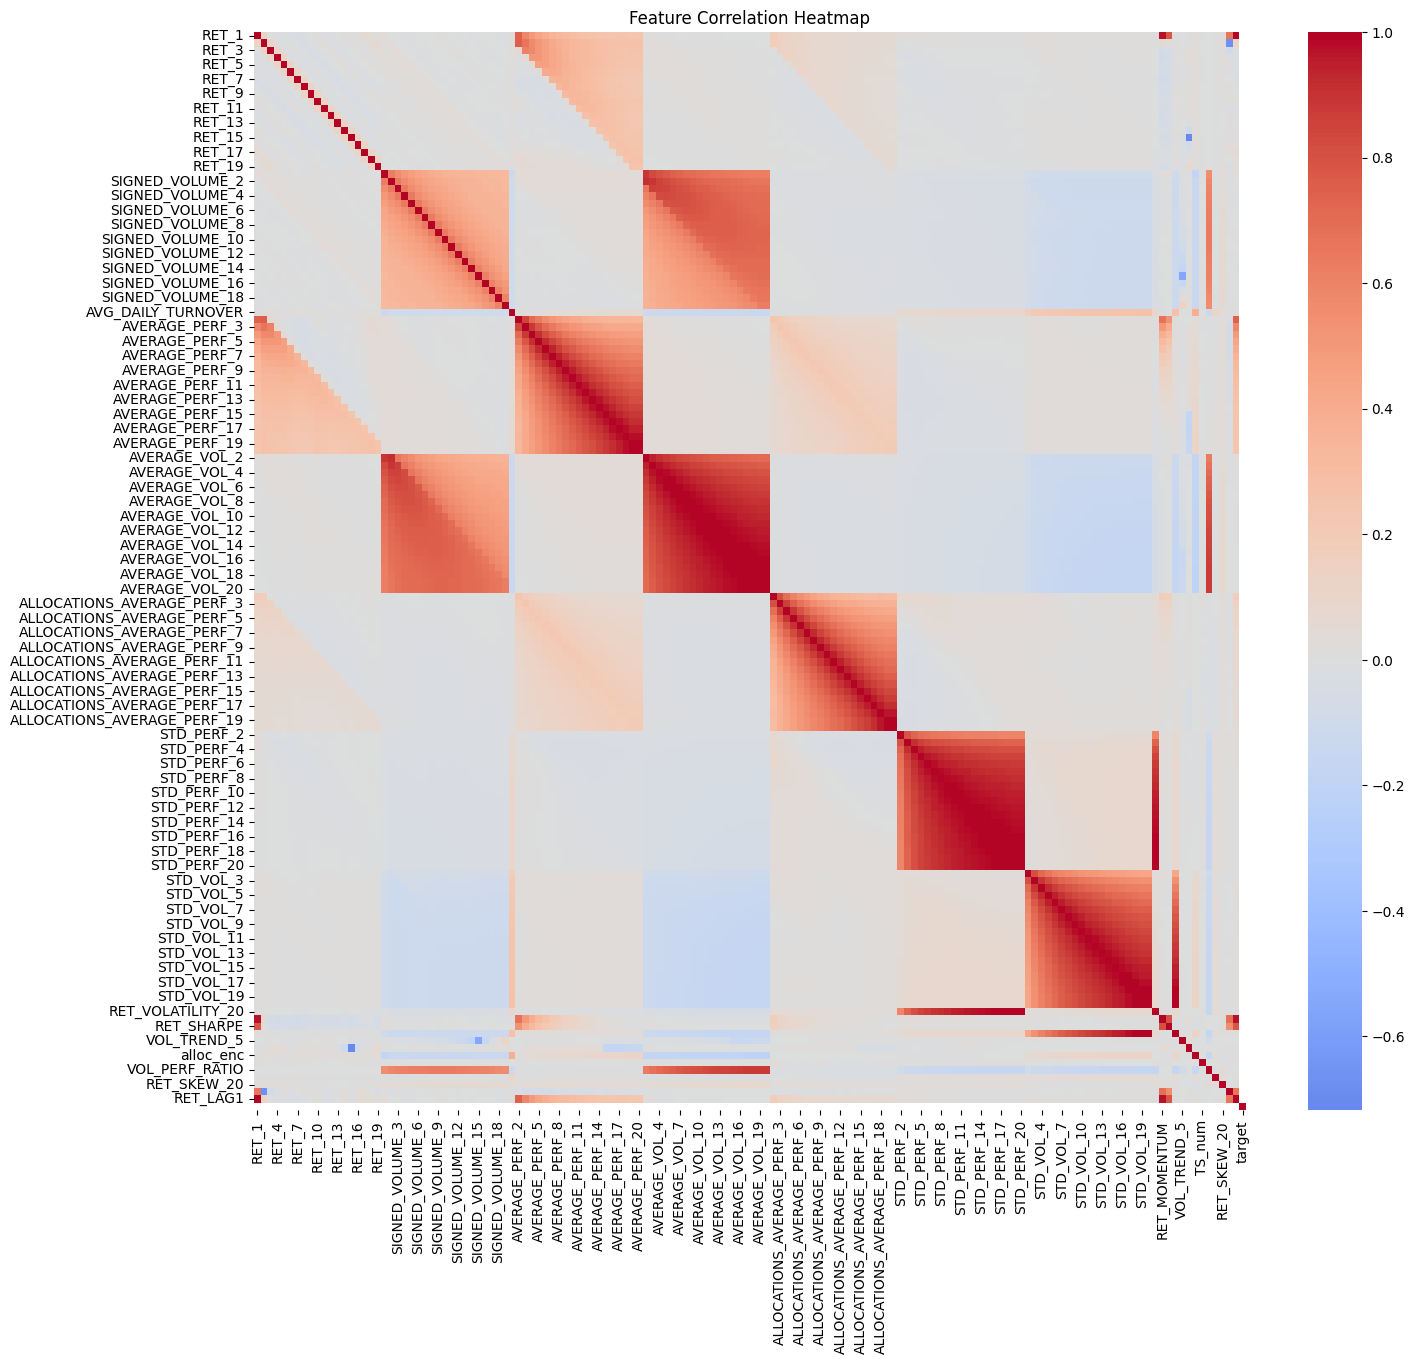

In [206]:
plt.figure(figsize=(16,14))
corr = pd.concat([X_train[features], y_train.target]).corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")

Observation :
- The return of two consecutive days are a bit correlated, that makes sense with the graph plotting the positive/negative target std_returns
- The volumes are very correlated, we can think about the PCA or dropping some columns to avoid too highly correlated features

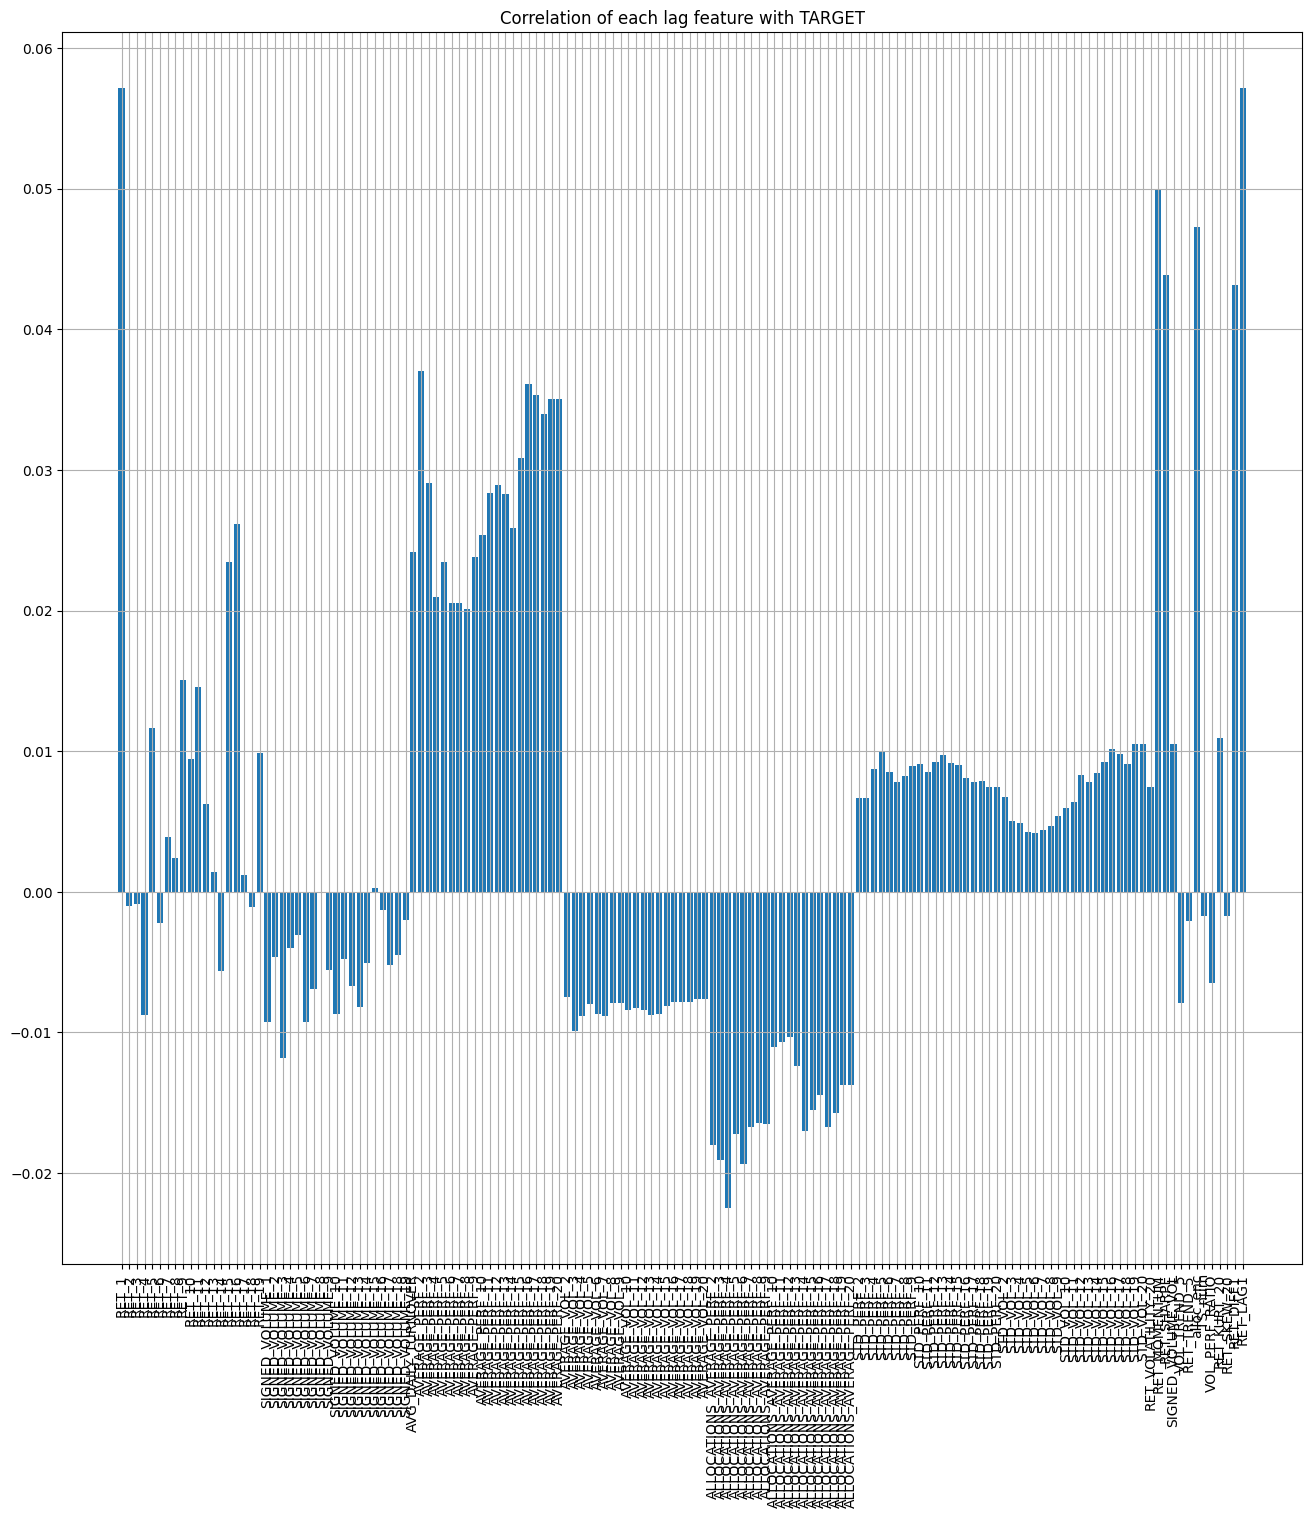

In [120]:
plt.figure(figsize=(16,16))
corrs = [np.corrcoef(X_train[col], y_train.target.T)[0, 1] for col in features]
plt.bar(range(len(corrs)), corrs)
plt.xticks(range(len(corrs)), features, rotation=90)
plt.title("Correlation of each lag feature with TARGET")
plt.grid()

Preprocessing + PCA + Isolation Forest

In [217]:
import numpy as np
from sklearn.decomposition import PCA

# Ajuste ton seuil ici (ex. 0.95 = 95 % de variance expliquée)
variance_threshold = 0.9

# Fit PCA sur toutes les dimensions possibles
pca_full = PCA(random_state=42)
pca_full.fit(X_train_scaled)

# Calcul de la variance cumulée
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Trouver le plus petit k tel que variance cumulée >= seuil
optimal_k = np.argmax(cumulative_variance >= variance_threshold) + 1

print(f"Nombre optimal de composantes PCA : {optimal_k}")
print(f"Variance expliquée cumulée : {cumulative_variance[optimal_k-1]:.4f}")

# Recalcule le PCA final avec ce nombre de composantes
pca_optimal = PCA(n_components=optimal_k, random_state=42)
X_pca_optimal = pca_optimal.fit_transform(X_train_scaled)

print("Forme du jeu de données après PCA :", X_pca_optimal.shape)


Nombre optimal de composantes PCA : 32
Variance expliquée cumulée : 0.9038
Forme du jeu de données après PCA : (180245, 32)


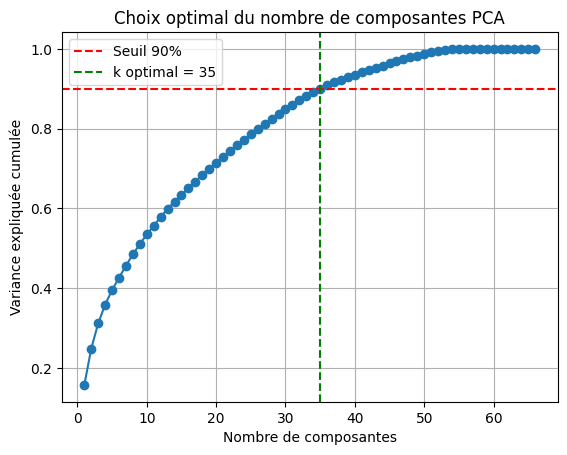

In [125]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(variance_threshold, color='r', linestyle='--', label=f'Seuil {variance_threshold*100:.0f}%')
plt.axvline(optimal_k, color='g', linestyle='--', label=f'k optimal = {optimal_k}')
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.title("Choix optimal du nombre de composantes PCA")
plt.legend()
plt.grid(True)
plt.show()


In [256]:
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# --- Paramètres ---
pca_components = [i for i in range(3,60,3)]         # ajout de 35 et 45
iso_contaminations = [i/100 for i in range(1,15)]      # ajout de 12%

# --- Étape 1 : Créer et ajuster les PCA ---
pca_models = {f"pca{k}": PCA(n_components=k, random_state=42) for k in pca_components}
X_pca = {f"X_pca{k}": model.fit_transform(X_train_scaled) for k, model in pca_models.items()}

# --- Étape 2 : Créer les IsolationForest ---
iso_models = {f"iso{int(c*100)}": IsolationForest(contamination=c, random_state=42) for c in iso_contaminations}

# --- Étape 3 : Entraîner les IsolationForest sur chaque PCA ---
labels = {}
for k, Xpca in X_pca.items():          # k = "X_pca5", "X_pca15", ...
    for c_str, iso in iso_models.items():  # c_str = "iso4", "iso8", "iso12"
        c_val = iso.contamination          # on récupère la vraie valeur 0.04, 0.08 ou 0.12
        label_name = f"label_{k[6:]}_{int(c_val*100)}"  # ex: label_5_4, label_15_8
        labels[label_name] = iso.fit_predict(Xpca)
        print(f"{label_name} créé → {sum(labels[label_name]==-1)} anomalies détectées")


label_ca3_1 créé → 1803 anomalies détectées
label_ca3_2 créé → 3605 anomalies détectées
label_ca3_3 créé → 5408 anomalies détectées
label_ca3_4 créé → 7210 anomalies détectées
label_ca3_5 créé → 9013 anomalies détectées
label_ca3_6 créé → 10815 anomalies détectées
label_ca3_7 créé → 12618 anomalies détectées
label_ca3_8 créé → 14420 anomalies détectées
label_ca3_9 créé → 16222 anomalies détectées
label_ca3_10 créé → 18025 anomalies détectées
label_ca3_11 créé → 19827 anomalies détectées
label_ca3_12 créé → 21630 anomalies détectées
label_ca3_13 créé → 23432 anomalies détectées
label_ca3_14 créé → 25235 anomalies détectées
label_ca6_1 créé → 1803 anomalies détectées
label_ca6_2 créé → 3605 anomalies détectées
label_ca6_3 créé → 5408 anomalies détectées
label_ca6_4 créé → 7210 anomalies détectées
label_ca6_5 créé → 9013 anomalies détectées
label_ca6_6 créé → 10815 anomalies détectées
label_ca6_7 créé → 12618 anomalies détectées
label_ca6_8 créé → 14420 anomalies détectées
label_ca6_9 cré

In [255]:
labels

array([1, 1, 1, ..., 1, 1, 1], shape=(180245,))

AVEC LASSO

In [259]:
from sklearn.linear_model import LogisticRegression
ridge_params = dict(alpha=1e-2, fit_intercept=False)
n_splits = 5
random_state = 42
results = []

# --- Créons un mapping explicite label → PCA ---
label_to_pca = {}
for label_name in labels.keys():
    # Cherchons dans X_pca celle dont le n_components est contenu dans le nom du label
    for pca_key in X_pca.keys():
        if pca_key[6:] in label_name:  # ex: "5" dans "label_5_4"
            label_to_pca[label_name] = pca_key
            break
    else:
        raise KeyError(f"Impossible de trouver PCA correspondante pour {label_name}")

# --- Boucle sur chaque label ---
for label_name, lbl_array in labels.items():
    print(f"\n=== Test avec {label_name} ===")

    pca_key = label_to_pca[label_name]
    X_train_pca = X_pca[pca_key]

    # Filtrage des inliers
    mask = lbl_array == 1
    X_train_clean = X_train_pca[mask]
    y_train_clean = y_train[mask].squeeze()   # Assure-toi que y_train est aligné avec X_scaled
    y_train_clean = (y_train_clean > 0).astype(int).squeeze()
    y_train_clean = y_train_clean.drop(columns=['ROW_ID'])



    print(f"Train shape after PCA+ISO ({label_name}): {X_train_clean.shape}")
    print(f"Outliers retirés: {(lbl_array == -1).sum()}")

    # K-Fold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    oof_preds = np.zeros(len(y_train_clean))
    fold_scores = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_clean, y_train_clean)):
        X_tr, X_val = X_train_clean[train_idx], X_train_clean[val_idx]
        y_tr, y_val = y_train_clean.iloc[train_idx], y_train_clean.iloc[val_idx]

        model = LogisticRegression(
                    penalty='elasticnet',
                    solver='saga',
                    l1_ratio=0.5,
                    C=1.0,
                    max_iter=1000
                )
        model.fit(X_tr, y_tr)

        y_val_pred = model.predict(X_val)
        oof_preds[val_idx] = y_val_pred
        

        acc = accuracy_score(y_val, y_val_pred)
        f1 = f1_score(y_val, y_val_pred)
        auc = roc_auc_score(y_val, y_val_pred)
        fold_scores.append(dict(fold=fold+1, acc=acc, f1=f1, auc=auc))

        print(f"Fold {fold+1} → ACC={acc:.4f}, F1={f1:.4f}, AUC={auc:.4f}")

    # Scores globaux OOF
    acc_oof = accuracy_score(y_train_clean, oof_preds)
    f1_oof = f1_score(y_train_clean, oof_preds)
    auc_oof = roc_auc_score(y_train_clean, oof_preds)
    print(f"OOF ({label_name}) → ACC={acc_oof:.4f}, F1={f1_oof:.4f}, AUC={auc_oof:.4f}")

    results.append({
        "label": label_name,
        "pca_key": pca_key,
        "oof_acc": acc_oof,
        "oof_f1": f1_oof,
        "oof_auc": auc_oof,
        "fold_details": fold_scores
    })

# Comparaison globale
res_df = pd.DataFrame([
    {"Label": r["label"], "PCA": r["pca_key"], "OOF_ACC": r["oof_acc"], "OOF_F1": r["oof_f1"], "OOF_AUC": r["oof_auc"]}
    for r in results
])

display(res_df.sort_values("OOF_AUC", ascending=False))



=== Test avec label_ca3_1 ===
Train shape after PCA+ISO (label_ca3_1): (178442, 3)
Outliers retirés: 1803
Fold 1 → ACC=0.5122, F1=0.5540, AUC=0.5120


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5070, F1=0.5274, AUC=0.5067
Fold 3 → ACC=0.5110, F1=0.5508, AUC=0.5105


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5087, F1=0.5465, AUC=0.5082
Fold 5 → ACC=0.5098, F1=0.5525, AUC=0.5094
OOF (label_ca3_1) → ACC=0.5097, F1=0.5464, AUC=0.5093

=== Test avec label_ca3_2 ===
Train shape after PCA+ISO (label_ca3_2): (176640, 3)
Outliers retirés: 3605


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5095, F1=0.5519, AUC=0.5093
Fold 2 → ACC=0.5080, F1=0.5434, AUC=0.5075


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5079, F1=0.5415, AUC=0.5075
Fold 4 → ACC=0.5100, F1=0.5301, AUC=0.5095


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5120, F1=0.5642, AUC=0.5120
OOF (label_ca3_2) → ACC=0.5095, F1=0.5465, AUC=0.5090

=== Test avec label_ca3_3 ===
Train shape after PCA+ISO (label_ca3_3): (174837, 3)
Outliers retirés: 5408
Fold 1 → ACC=0.5130, F1=0.5649, AUC=0.5127


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5082, F1=0.5349, AUC=0.5077
Fold 3 → ACC=0.5061, F1=0.5403, AUC=0.5058


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5077, F1=0.5482, AUC=0.5075
Fold 5 → ACC=0.5136, F1=0.5479, AUC=0.5130
OOF (label_ca3_3) → ACC=0.5097, F1=0.5474, AUC=0.5093

=== Test avec label_ca3_4 ===
Train shape after PCA+ISO (label_ca3_4): (173035, 3)
Outliers retirés: 7210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5060, F1=0.5437, AUC=0.5055
Fold 2 → ACC=0.5079, F1=0.5677, AUC=0.5096


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5102, F1=0.5378, AUC=0.5098
Fold 4 → ACC=0.5102, F1=0.5475, AUC=0.5095
Fold 5 → ACC=0.5109, F1=0.5289, AUC=0.5104


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


OOF (label_ca3_4) → ACC=0.5090, F1=0.5455, AUC=0.5086

=== Test avec label_ca3_5 ===
Train shape after PCA+ISO (label_ca3_5): (171232, 3)
Outliers retirés: 9013
Fold 1 → ACC=0.5116, F1=0.5508, AUC=0.5112


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5114, F1=0.5349, AUC=0.5108
Fold 3 → ACC=0.5069, F1=0.5478, AUC=0.5071


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5084, F1=0.5536, AUC=0.5086
Fold 5 → ACC=0.5084, F1=0.5342, AUC=0.5079
OOF (label_ca3_5) → ACC=0.5093, F1=0.5444, AUC=0.5089

=== Test avec label_ca3_6 ===
Train shape after PCA+ISO (label_ca3_6): (169430, 3)
Outliers retirés: 10815


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5139, F1=0.5559, AUC=0.5132
Fold 2 → ACC=0.5096, F1=0.5477, AUC=0.5094


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5115, F1=0.5367, AUC=0.5108
Fold 4 → ACC=0.5063, F1=0.5683, AUC=0.5080


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5052, F1=0.5268, AUC=0.5046
OOF (label_ca3_6) → ACC=0.5093, F1=0.5475, AUC=0.5088

=== Test avec label_ca3_7 ===
Train shape after PCA+ISO (label_ca3_7): (167627, 3)
Outliers retirés: 12618
Fold 1 → ACC=0.5073, F1=0.5613, AUC=0.5083


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5085, F1=0.5378, AUC=0.5079
Fold 3 → ACC=0.5086, F1=0.5358, AUC=0.5080


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5100, F1=0.5507, AUC=0.5094
Fold 5 → ACC=0.5089, F1=0.5470, AUC=0.5083
OOF (label_ca3_7) → ACC=0.5087, F1=0.5467, AUC=0.5082

=== Test avec label_ca3_8 ===


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train shape after PCA+ISO (label_ca3_8): (165825, 3)
Outliers retirés: 14420
Fold 1 → ACC=0.5109, F1=0.5578, AUC=0.5104


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5052, F1=0.5277, AUC=0.5048
Fold 3 → ACC=0.5117, F1=0.5476, AUC=0.5114


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5079, F1=0.5506, AUC=0.5078
Fold 5 → ACC=0.5122, F1=0.5532, AUC=0.5116
OOF (label_ca3_8) → ACC=0.5096, F1=0.5476, AUC=0.5092

=== Test avec label_ca3_9 ===
Train shape after PCA+ISO (label_ca3_9): (164023, 3)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5107, F1=0.5437, AUC=0.5103
Fold 2 → ACC=0.5136, F1=0.5403, AUC=0.5130


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5081, F1=0.5402, AUC=0.5077
Fold 4 → ACC=0.5109, F1=0.5460, AUC=0.5104


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5042, F1=0.5573, AUC=0.5052
OOF (label_ca3_9) → ACC=0.5095, F1=0.5456, AUC=0.5091

=== Test avec label_ca3_10 ===
Train shape after PCA+ISO (label_ca3_10): (162220, 3)
Outliers retirés: 18025
Fold 1 → ACC=0.5061, F1=0.5376, AUC=0.5059


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5129, F1=0.5535, AUC=0.5124
Fold 3 → ACC=0.5058, F1=0.5429, AUC=0.5057


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5110, F1=0.5373, AUC=0.5105
Fold 5 → ACC=0.5109, F1=0.5480, AUC=0.5107
OOF (label_ca3_10) → ACC=0.5093, F1=0.5439, AUC=0.5090

=== Test avec label_ca3_11 ===
Train shape after PCA+ISO (label_ca3_11): (160418, 3)
Outliers retirés: 19827
Fold 1 → ACC=0.5114, F1=0.5528, AUC=0.5111


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5097, F1=0.5343, AUC=0.5094
Fold 3 → ACC=0.5093, F1=0.5297, AUC=0.5089


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5106, F1=0.5448, AUC=0.5101


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5064, F1=0.5539, AUC=0.5069
OOF (label_ca3_11) → ACC=0.5095, F1=0.5433, AUC=0.5091

=== Test avec label_ca3_12 ===
Train shape after PCA+ISO (label_ca3_12): (158615, 3)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5104, F1=0.5516, AUC=0.5102
Fold 2 → ACC=0.5075, F1=0.5394, AUC=0.5072


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5122, F1=0.5351, AUC=0.5117
Fold 4 → ACC=0.5066, F1=0.5415, AUC=0.5064


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5099, F1=0.5459, AUC=0.5096
OOF (label_ca3_12) → ACC=0.5093, F1=0.5428, AUC=0.5090

=== Test avec label_ca3_13 ===
Train shape after PCA+ISO (label_ca3_13): (156813, 3)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5137, F1=0.5488, AUC=0.5132
Fold 2 → ACC=0.5118, F1=0.5578, AUC=0.5117


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5037, F1=0.5304, AUC=0.5037
Fold 4 → ACC=0.5117, F1=0.5481, AUC=0.5114


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5060, F1=0.5212, AUC=0.5057
OOF (label_ca3_13) → ACC=0.5094, F1=0.5415, AUC=0.5090

=== Test avec label_ca3_14 ===
Train shape after PCA+ISO (label_ca3_14): (155010, 3)
Outliers retirés: 25235


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5102, F1=0.5373, AUC=0.5099
Fold 2 → ACC=0.5080, F1=0.5555, AUC=0.5084


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5095, F1=0.5175, AUC=0.5093
Fold 4 → ACC=0.5116, F1=0.5365, AUC=0.5114


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5083, F1=0.5455, AUC=0.5083
OOF (label_ca3_14) → ACC=0.5095, F1=0.5388, AUC=0.5093

=== Test avec label_ca6_1 ===
Train shape after PCA+ISO (label_ca6_1): (178442, 6)
Outliers retirés: 1803
Fold 1 → ACC=0.5112, F1=0.5373, AUC=0.5111
Fold 2 → ACC=0.5161, F1=0.5312, AUC=0.5158


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5130, F1=0.5386, AUC=0.5129


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5193, F1=0.5453, AUC=0.5190


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5256, F1=0.5476, AUC=0.5253
OOF (label_ca6_1) → ACC=0.5170, F1=0.5400, AUC=0.5168

=== Test avec label_ca6_2 ===
Train shape after PCA+ISO (label_ca6_2): (176640, 6)
Outliers retirés: 3605


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5180, F1=0.5462, AUC=0.5179


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5151, F1=0.5315, AUC=0.5148


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5166, F1=0.5457, AUC=0.5164


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5166, F1=0.5334, AUC=0.5163


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5172, F1=0.5422, AUC=0.5170
OOF (label_ca6_2) → ACC=0.5167, F1=0.5399, AUC=0.5164

=== Test avec label_ca6_3 ===
Train shape after PCA+ISO (label_ca6_3): (174837, 6)
Outliers retirés: 5408


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5165, F1=0.5330, AUC=0.5162


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5174, F1=0.5396, AUC=0.5172


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5196, F1=0.5449, AUC=0.5195


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5151, F1=0.5433, AUC=0.5150


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5172, F1=0.5381, AUC=0.5170
OOF (label_ca6_3) → ACC=0.5172, F1=0.5398, AUC=0.5170

=== Test avec label_ca6_4 ===
Train shape after PCA+ISO (label_ca6_4): (173035, 6)
Outliers retirés: 7210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5205, F1=0.5349, AUC=0.5201


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5105, F1=0.5390, AUC=0.5107


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5143, F1=0.5388, AUC=0.5142


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5144, F1=0.5392, AUC=0.5143


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5214, F1=0.5415, AUC=0.5212
OOF (label_ca6_4) → ACC=0.5162, F1=0.5387, AUC=0.5160

=== Test avec label_ca6_5 ===
Train shape after PCA+ISO (label_ca6_5): (171232, 6)
Outliers retirés: 9013


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5166, F1=0.5311, AUC=0.5163


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5160, F1=0.5378, AUC=0.5158
Fold 3 → ACC=0.5168, F1=0.5396, AUC=0.5168


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5180, F1=0.5513, AUC=0.5180
Fold 5 → ACC=0.5150, F1=0.5350, AUC=0.5148


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


OOF (label_ca6_5) → ACC=0.5165, F1=0.5391, AUC=0.5163

=== Test avec label_ca6_6 ===
Train shape after PCA+ISO (label_ca6_6): (169430, 6)
Outliers retirés: 10815


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5197, F1=0.5406, AUC=0.5193


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5159, F1=0.5345, AUC=0.5156


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5199, F1=0.5475, AUC=0.5198


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5127, F1=0.5406, AUC=0.5128


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5133, F1=0.5317, AUC=0.5131
OOF (label_ca6_6) → ACC=0.5163, F1=0.5390, AUC=0.5161

=== Test avec label_ca6_7 ===
Train shape after PCA+ISO (label_ca6_7): (167627, 6)
Outliers retirés: 12618


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5154, F1=0.5345, AUC=0.5151


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5165, F1=0.5430, AUC=0.5164


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5180, F1=0.5347, AUC=0.5179


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5181, F1=0.5349, AUC=0.5178


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5126, F1=0.5402, AUC=0.5126
OOF (label_ca6_7) → ACC=0.5161, F1=0.5375, AUC=0.5159

=== Test avec label_ca6_8 ===
Train shape after PCA+ISO (label_ca6_8): (165825, 6)
Outliers retirés: 14420


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5119, F1=0.5337, AUC=0.5118


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5191, F1=0.5356, AUC=0.5188


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5171, F1=0.5375, AUC=0.5168


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5175, F1=0.5448, AUC=0.5176


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5168, F1=0.5366, AUC=0.5167
OOF (label_ca6_8) → ACC=0.5165, F1=0.5377, AUC=0.5163

=== Test avec label_ca6_9 ===
Train shape after PCA+ISO (label_ca6_9): (164023, 6)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5157, F1=0.5390, AUC=0.5155


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5161, F1=0.5310, AUC=0.5158


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5160, F1=0.5317, AUC=0.5158


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5156, F1=0.5450, AUC=0.5160


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5187, F1=0.5352, AUC=0.5185
OOF (label_ca6_9) → ACC=0.5164, F1=0.5365, AUC=0.5163

=== Test avec label_ca6_10 ===
Train shape after PCA+ISO (label_ca6_10): (162220, 6)
Outliers retirés: 18025


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5185, F1=0.5354, AUC=0.5184


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5127, F1=0.5364, AUC=0.5127


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5182, F1=0.5345, AUC=0.5181


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5197, F1=0.5350, AUC=0.5194


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5116, F1=0.5323, AUC=0.5116
OOF (label_ca6_10) → ACC=0.5162, F1=0.5347, AUC=0.5160

=== Test avec label_ca6_11 ===
Train shape after PCA+ISO (label_ca6_11): (160418, 6)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5166, F1=0.5443, AUC=0.5170


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5122, F1=0.5331, AUC=0.5123


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5222, F1=0.5268, AUC=0.5221


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5151, F1=0.5358, AUC=0.5148


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5176, F1=0.5340, AUC=0.5175
OOF (label_ca6_11) → ACC=0.5167, F1=0.5349, AUC=0.5166

=== Test avec label_ca6_12 ===
Train shape after PCA+ISO (label_ca6_12): (158615, 6)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5115, F1=0.5386, AUC=0.5119


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5179, F1=0.5372, AUC=0.5178


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5168, F1=0.5297, AUC=0.5167


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5164, F1=0.5352, AUC=0.5163


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5202, F1=0.5285, AUC=0.5200
OOF (label_ca6_12) → ACC=0.5166, F1=0.5339, AUC=0.5164

=== Test avec label_ca6_13 ===
Train shape after PCA+ISO (label_ca6_13): (156813, 6)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5166, F1=0.5441, AUC=0.5170


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5228, F1=0.5378, AUC=0.5227


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5176, F1=0.5282, AUC=0.5175


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5162, F1=0.5250, AUC=0.5160


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5130, F1=0.5308, AUC=0.5129
OOF (label_ca6_13) → ACC=0.5172, F1=0.5332, AUC=0.5171

=== Test avec label_ca6_14 ===
Train shape after PCA+ISO (label_ca6_14): (155010, 6)
Outliers retirés: 25235


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5159, F1=0.5288, AUC=0.5159


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5162, F1=0.5374, AUC=0.5162


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5155, F1=0.5245, AUC=0.5154


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5176, F1=0.5258, AUC=0.5175


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5190, F1=0.5359, AUC=0.5190
OOF (label_ca6_14) → ACC=0.5168, F1=0.5305, AUC=0.5168

=== Test avec label_ca9_1 ===
Train shape after PCA+ISO (label_ca9_1): (178442, 9)
Outliers retirés: 1803


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5173, F1=0.5331, AUC=0.5171


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5202, F1=0.5392, AUC=0.5200


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5207, F1=0.5374, AUC=0.5204


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5240, F1=0.5403, AUC=0.5238


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5169, F1=0.5367, AUC=0.5169
OOF (label_ca9_1) → ACC=0.5198, F1=0.5373, AUC=0.5196

=== Test avec label_ca9_2 ===
Train shape after PCA+ISO (label_ca9_2): (176640, 9)
Outliers retirés: 3605


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5208, F1=0.5447, AUC=0.5208


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5208, F1=0.5415, AUC=0.5208


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5158, F1=0.5305, AUC=0.5156


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5178, F1=0.5272, AUC=0.5176


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5223, F1=0.5459, AUC=0.5222
OOF (label_ca9_2) → ACC=0.5195, F1=0.5380, AUC=0.5193

=== Test avec label_ca9_3 ===
Train shape after PCA+ISO (label_ca9_3): (174837, 9)
Outliers retirés: 5408


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5210, F1=0.5419, AUC=0.5208


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5207, F1=0.5407, AUC=0.5206


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5169, F1=0.5320, AUC=0.5167


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5214, F1=0.5366, AUC=0.5211


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5193, F1=0.5417, AUC=0.5191
OOF (label_ca9_3) → ACC=0.5199, F1=0.5386, AUC=0.5197

=== Test avec label_ca9_4 ===
Train shape after PCA+ISO (label_ca9_4): (173035, 9)
Outliers retirés: 7210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5132, F1=0.5262, AUC=0.5129


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5156, F1=0.5363, AUC=0.5156


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5195, F1=0.5324, AUC=0.5193


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5199, F1=0.5392, AUC=0.5196


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5252, F1=0.5527, AUC=0.5254
OOF (label_ca9_4) → ACC=0.5187, F1=0.5375, AUC=0.5185

=== Test avec label_ca9_5 ===
Train shape after PCA+ISO (label_ca9_5): (171232, 9)
Outliers retirés: 9013


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5191, F1=0.5410, AUC=0.5190


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5209, F1=0.5371, AUC=0.5206


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5178, F1=0.5396, AUC=0.5178


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5208, F1=0.5370, AUC=0.5207


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5195, F1=0.5364, AUC=0.5192
OOF (label_ca9_5) → ACC=0.5196, F1=0.5382, AUC=0.5195

=== Test avec label_ca9_6 ===
Train shape after PCA+ISO (label_ca9_6): (169430, 9)
Outliers retirés: 10815


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5190, F1=0.5372, AUC=0.5189


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5202, F1=0.5427, AUC=0.5202


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5232, F1=0.5355, AUC=0.5230


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5155, F1=0.5297, AUC=0.5153


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5193, F1=0.5419, AUC=0.5192
OOF (label_ca9_6) → ACC=0.5194, F1=0.5374, AUC=0.5193

=== Test avec label_ca9_7 ===
Train shape after PCA+ISO (label_ca9_7): (167627, 9)
Outliers retirés: 12618


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5208, F1=0.5379, AUC=0.5207


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5225, F1=0.5395, AUC=0.5223


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5201, F1=0.5342, AUC=0.5198


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5157, F1=0.5350, AUC=0.5156


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5202, F1=0.5423, AUC=0.5201
OOF (label_ca9_7) → ACC=0.5199, F1=0.5378, AUC=0.5197

=== Test avec label_ca9_8 ===
Train shape after PCA+ISO (label_ca9_8): (165825, 9)
Outliers retirés: 14420


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5213, F1=0.5383, AUC=0.5210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5216, F1=0.5422, AUC=0.5214


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5168, F1=0.5355, AUC=0.5167


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5212, F1=0.5358, AUC=0.5211


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5149, F1=0.5259, AUC=0.5148
OOF (label_ca9_8) → ACC=0.5191, F1=0.5356, AUC=0.5190

=== Test avec label_ca9_9 ===
Train shape after PCA+ISO (label_ca9_9): (164023, 9)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5229, F1=0.5398, AUC=0.5227


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5158, F1=0.5289, AUC=0.5157


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5178, F1=0.5275, AUC=0.5177


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5200, F1=0.5394, AUC=0.5198


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5200, F1=0.5405, AUC=0.5201
OOF (label_ca9_9) → ACC=0.5193, F1=0.5353, AUC=0.5192

=== Test avec label_ca9_10 ===
Train shape after PCA+ISO (label_ca9_10): (162220, 9)
Outliers retirés: 18025


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5184, F1=0.5396, AUC=0.5185


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5202, F1=0.5362, AUC=0.5202


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5190, F1=0.5316, AUC=0.5189


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5211, F1=0.5410, AUC=0.5210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5158, F1=0.5231, AUC=0.5156
OOF (label_ca9_10) → ACC=0.5189, F1=0.5344, AUC=0.5188

=== Test avec label_ca9_11 ===
Train shape after PCA+ISO (label_ca9_11): (160418, 9)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5204, F1=0.5347, AUC=0.5203


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5217, F1=0.5296, AUC=0.5216


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5150, F1=0.5308, AUC=0.5149


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5226, F1=0.5474, AUC=0.5227


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5144, F1=0.5274, AUC=0.5143
OOF (label_ca9_11) → ACC=0.5188, F1=0.5341, AUC=0.5187

=== Test avec label_ca9_12 ===
Train shape after PCA+ISO (label_ca9_12): (158615, 9)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5160, F1=0.5338, AUC=0.5159


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5245, F1=0.5348, AUC=0.5244


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5199, F1=0.5337, AUC=0.5198


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5149, F1=0.5304, AUC=0.5150


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5170, F1=0.5271, AUC=0.5169
OOF (label_ca9_12) → ACC=0.5185, F1=0.5320, AUC=0.5184

=== Test avec label_ca9_13 ===
Train shape after PCA+ISO (label_ca9_13): (156813, 9)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5209, F1=0.5356, AUC=0.5209


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5230, F1=0.5456, AUC=0.5234


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5148, F1=0.5303, AUC=0.5147


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5214, F1=0.5283, AUC=0.5213


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5151, F1=0.5219, AUC=0.5151
OOF (label_ca9_13) → ACC=0.5191, F1=0.5324, AUC=0.5190

=== Test avec label_ca9_14 ===
Train shape after PCA+ISO (label_ca9_14): (155010, 9)
Outliers retirés: 25235


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5197, F1=0.5361, AUC=0.5197


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5151, F1=0.5347, AUC=0.5151


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5220, F1=0.5337, AUC=0.5219


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5193, F1=0.5286, AUC=0.5192


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5174, F1=0.5309, AUC=0.5173
OOF (label_ca9_14) → ACC=0.5187, F1=0.5328, AUC=0.5186

=== Test avec label_ca12_1 ===
Train shape after PCA+ISO (label_ca12_1): (178442, 12)
Outliers retirés: 1803


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5179, F1=0.5328, AUC=0.5176


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5190, F1=0.5417, AUC=0.5188


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5167, F1=0.5360, AUC=0.5166


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5219, F1=0.5320, AUC=0.5217


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5235, F1=0.5446, AUC=0.5236
OOF (label_ca12_1) → ACC=0.5198, F1=0.5374, AUC=0.5196

=== Test avec label_ca12_2 ===
Train shape after PCA+ISO (label_ca12_2): (176640, 12)
Outliers retirés: 3605


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5217, F1=0.5402, AUC=0.5215


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5216, F1=0.5423, AUC=0.5214


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5184, F1=0.5394, AUC=0.5183


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5163, F1=0.5302, AUC=0.5161


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5167, F1=0.5308, AUC=0.5165
OOF (label_ca12_2) → ACC=0.5189, F1=0.5366, AUC=0.5187

=== Test avec label_ca12_3 ===
Train shape after PCA+ISO (label_ca12_3): (174837, 12)
Outliers retirés: 5408


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5202, F1=0.5346, AUC=0.5200


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5219, F1=0.5354, AUC=0.5216


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5198, F1=0.5428, AUC=0.5198


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5165, F1=0.5343, AUC=0.5163


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5208, F1=0.5432, AUC=0.5207
OOF (label_ca12_3) → ACC=0.5198, F1=0.5381, AUC=0.5196

=== Test avec label_ca12_4 ===
Train shape after PCA+ISO (label_ca12_4): (173035, 12)
Outliers retirés: 7210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5188, F1=0.5396, AUC=0.5187


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5192, F1=0.5353, AUC=0.5190


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5192, F1=0.5314, AUC=0.5190


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5199, F1=0.5342, AUC=0.5196


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5204, F1=0.5475, AUC=0.5205
OOF (label_ca12_4) → ACC=0.5195, F1=0.5377, AUC=0.5193

=== Test avec label_ca12_5 ===
Train shape after PCA+ISO (label_ca12_5): (171232, 12)
Outliers retirés: 9013


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5232, F1=0.5490, AUC=0.5235


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5226, F1=0.5308, AUC=0.5224


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5122, F1=0.5327, AUC=0.5122


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5216, F1=0.5365, AUC=0.5213


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5169, F1=0.5400, AUC=0.5168
OOF (label_ca12_5) → ACC=0.5193, F1=0.5379, AUC=0.5191

=== Test avec label_ca12_6 ===
Train shape after PCA+ISO (label_ca12_6): (169430, 12)
Outliers retirés: 10815


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5218, F1=0.5370, AUC=0.5216


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5206, F1=0.5389, AUC=0.5202


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5189, F1=0.5381, AUC=0.5189


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5195, F1=0.5325, AUC=0.5194


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5173, F1=0.5383, AUC=0.5173
OOF (label_ca12_6) → ACC=0.5196, F1=0.5370, AUC=0.5195

=== Test avec label_ca12_7 ===
Train shape after PCA+ISO (label_ca12_7): (167627, 12)
Outliers retirés: 12618


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5185, F1=0.5255, AUC=0.5184


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5172, F1=0.5330, AUC=0.5171


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5227, F1=0.5400, AUC=0.5226


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5179, F1=0.5367, AUC=0.5180


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5220, F1=0.5456, AUC=0.5221
OOF (label_ca12_7) → ACC=0.5197, F1=0.5362, AUC=0.5195

=== Test avec label_ca12_8 ===
Train shape after PCA+ISO (label_ca12_8): (165825, 12)
Outliers retirés: 14420


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5193, F1=0.5365, AUC=0.5192


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5188, F1=0.5413, AUC=0.5190


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5171, F1=0.5280, AUC=0.5170


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5217, F1=0.5389, AUC=0.5216


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5212, F1=0.5350, AUC=0.5210
OOF (label_ca12_8) → ACC=0.5196, F1=0.5360, AUC=0.5195

=== Test avec label_ca12_9 ===
Train shape after PCA+ISO (label_ca12_9): (164023, 12)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5133, F1=0.5282, AUC=0.5132


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5237, F1=0.5474, AUC=0.5237


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5196, F1=0.5385, AUC=0.5197


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5223, F1=0.5323, AUC=0.5221


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5185, F1=0.5317, AUC=0.5183
OOF (label_ca12_9) → ACC=0.5195, F1=0.5357, AUC=0.5193

=== Test avec label_ca12_10 ===
Train shape after PCA+ISO (label_ca12_10): (162220, 12)
Outliers retirés: 18025


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5245, F1=0.5392, AUC=0.5244


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5185, F1=0.5382, AUC=0.5184


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5196, F1=0.5372, AUC=0.5196


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5154, F1=0.5248, AUC=0.5153


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5195, F1=0.5308, AUC=0.5194
OOF (label_ca12_10) → ACC=0.5195, F1=0.5341, AUC=0.5194

=== Test avec label_ca12_11 ===
Train shape after PCA+ISO (label_ca12_11): (160418, 12)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5184, F1=0.5408, AUC=0.5187


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5190, F1=0.5337, AUC=0.5189


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5196, F1=0.5289, AUC=0.5195


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5222, F1=0.5327, AUC=0.5221


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5190, F1=0.5276, AUC=0.5189
OOF (label_ca12_11) → ACC=0.5196, F1=0.5328, AUC=0.5195

=== Test avec label_ca12_12 ===
Train shape after PCA+ISO (label_ca12_12): (158615, 12)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5143, F1=0.5309, AUC=0.5143


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5189, F1=0.5339, AUC=0.5189


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5193, F1=0.5261, AUC=0.5192


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5238, F1=0.5322, AUC=0.5238


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5200, F1=0.5353, AUC=0.5199
OOF (label_ca12_12) → ACC=0.5193, F1=0.5317, AUC=0.5192

=== Test avec label_ca12_13 ===
Train shape after PCA+ISO (label_ca12_13): (156813, 12)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5209, F1=0.5413, AUC=0.5211


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5202, F1=0.5293, AUC=0.5201


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5189, F1=0.5284, AUC=0.5188


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5195, F1=0.5300, AUC=0.5193


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5182, F1=0.5260, AUC=0.5182
OOF (label_ca12_13) → ACC=0.5195, F1=0.5310, AUC=0.5195

=== Test avec label_ca12_14 ===
Train shape after PCA+ISO (label_ca12_14): (155010, 12)
Outliers retirés: 25235


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5167, F1=0.5239, AUC=0.5167


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5164, F1=0.5330, AUC=0.5165


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5181, F1=0.5298, AUC=0.5180


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5229, F1=0.5353, AUC=0.5228


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5212, F1=0.5331, AUC=0.5210
OOF (label_ca12_14) → ACC=0.5191, F1=0.5311, AUC=0.5190

=== Test avec label_ca15_1 ===
Train shape after PCA+ISO (label_ca15_1): (178442, 15)
Outliers retirés: 1803


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5207, F1=0.5392, AUC=0.5207


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5212, F1=0.5298, AUC=0.5210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5228, F1=0.5414, AUC=0.5227


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5235, F1=0.5384, AUC=0.5233


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5181, F1=0.5329, AUC=0.5180
OOF (label_ca15_1) → ACC=0.5213, F1=0.5364, AUC=0.5211

=== Test avec label_ca15_2 ===
Train shape after PCA+ISO (label_ca15_2): (176640, 15)
Outliers retirés: 3605


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5267, F1=0.5462, AUC=0.5268


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5200, F1=0.5255, AUC=0.5200


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5148, F1=0.5263, AUC=0.5146


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5217, F1=0.5372, AUC=0.5215


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5181, F1=0.5406, AUC=0.5183
OOF (label_ca15_2) → ACC=0.5203, F1=0.5353, AUC=0.5201

=== Test avec label_ca15_3 ===
Train shape after PCA+ISO (label_ca15_3): (174837, 15)
Outliers retirés: 5408


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5198, F1=0.5328, AUC=0.5196


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5184, F1=0.5314, AUC=0.5182


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5242, F1=0.5406, AUC=0.5240


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5219, F1=0.5388, AUC=0.5218


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5178, F1=0.5335, AUC=0.5176
OOF (label_ca15_3) → ACC=0.5204, F1=0.5354, AUC=0.5203

=== Test avec label_ca15_4 ===
Train shape after PCA+ISO (label_ca15_4): (173035, 15)
Outliers retirés: 7210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5223, F1=0.5446, AUC=0.5222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5168, F1=0.5337, AUC=0.5168


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5229, F1=0.5290, AUC=0.5228


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5196, F1=0.5300, AUC=0.5194


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5191, F1=0.5344, AUC=0.5190
OOF (label_ca15_4) → ACC=0.5201, F1=0.5344, AUC=0.5200

=== Test avec label_ca15_5 ===
Train shape after PCA+ISO (label_ca15_5): (171232, 15)
Outliers retirés: 9013


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5206, F1=0.5307, AUC=0.5205


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5206, F1=0.5481, AUC=0.5211


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5199, F1=0.5267, AUC=0.5198


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5206, F1=0.5270, AUC=0.5205


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5188, F1=0.5371, AUC=0.5187
OOF (label_ca15_5) → ACC=0.5201, F1=0.5340, AUC=0.5200

=== Test avec label_ca15_6 ===
Train shape after PCA+ISO (label_ca15_6): (169430, 15)
Outliers retirés: 10815


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5155, F1=0.5328, AUC=0.5154


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5154, F1=0.5395, AUC=0.5155


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5216, F1=0.5321, AUC=0.5215


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5214, F1=0.5351, AUC=0.5213


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5217, F1=0.5329, AUC=0.5216
OOF (label_ca15_6) → ACC=0.5191, F1=0.5345, AUC=0.5190

=== Test avec label_ca15_7 ===
Train shape after PCA+ISO (label_ca15_7): (167627, 15)
Outliers retirés: 12618


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5198, F1=0.5321, AUC=0.5196


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5220, F1=0.5415, AUC=0.5219


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5230, F1=0.5394, AUC=0.5229


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5178, F1=0.5367, AUC=0.5177


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5160, F1=0.5271, AUC=0.5158
OOF (label_ca15_7) → ACC=0.5197, F1=0.5354, AUC=0.5196

=== Test avec label_ca15_8 ===
Train shape after PCA+ISO (label_ca15_8): (165825, 15)
Outliers retirés: 14420


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5235, F1=0.5409, AUC=0.5233


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5190, F1=0.5311, AUC=0.5189


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5165, F1=0.5294, AUC=0.5164


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5177, F1=0.5364, AUC=0.5177


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5178, F1=0.5291, AUC=0.5178
OOF (label_ca15_8) → ACC=0.5189, F1=0.5334, AUC=0.5188

=== Test avec label_ca15_9 ===
Train shape after PCA+ISO (label_ca15_9): (164023, 15)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5210, F1=0.5342, AUC=0.5209


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5235, F1=0.5343, AUC=0.5234


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5139, F1=0.5218, AUC=0.5138


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5178, F1=0.5330, AUC=0.5177


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5201, F1=0.5401, AUC=0.5202
OOF (label_ca15_9) → ACC=0.5193, F1=0.5327, AUC=0.5192

=== Test avec label_ca15_10 ===
Train shape after PCA+ISO (label_ca15_10): (162220, 15)
Outliers retirés: 18025


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5221, F1=0.5408, AUC=0.5222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5185, F1=0.5288, AUC=0.5184


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5174, F1=0.5317, AUC=0.5174


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5218, F1=0.5289, AUC=0.5217


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5168, F1=0.5281, AUC=0.5166
OOF (label_ca15_10) → ACC=0.5193, F1=0.5317, AUC=0.5192

=== Test avec label_ca15_11 ===
Train shape after PCA+ISO (label_ca15_11): (160418, 15)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5204, F1=0.5376, AUC=0.5204


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5222, F1=0.5344, AUC=0.5221


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5165, F1=0.5200, AUC=0.5164


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5177, F1=0.5363, AUC=0.5178


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5186, F1=0.5278, AUC=0.5185
OOF (label_ca15_11) → ACC=0.5191, F1=0.5313, AUC=0.5190

=== Test avec label_ca15_12 ===
Train shape after PCA+ISO (label_ca15_12): (158615, 15)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5171, F1=0.5231, AUC=0.5170


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5224, F1=0.5387, AUC=0.5223


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5188, F1=0.5279, AUC=0.5187


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5220, F1=0.5350, AUC=0.5220


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5176, F1=0.5340, AUC=0.5177
OOF (label_ca15_12) → ACC=0.5196, F1=0.5318, AUC=0.5195

=== Test avec label_ca15_13 ===
Train shape after PCA+ISO (label_ca15_13): (156813, 15)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5173, F1=0.5280, AUC=0.5174


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5190, F1=0.5355, AUC=0.5192


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5168, F1=0.5298, AUC=0.5167


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5202, F1=0.5273, AUC=0.5201


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5226, F1=0.5308, AUC=0.5225
OOF (label_ca15_13) → ACC=0.5192, F1=0.5303, AUC=0.5191

=== Test avec label_ca15_14 ===
Train shape after PCA+ISO (label_ca15_14): (155010, 15)
Outliers retirés: 25235


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5233, F1=0.5352, AUC=0.5232


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5185, F1=0.5337, AUC=0.5187


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5174, F1=0.5315, AUC=0.5174


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5190, F1=0.5280, AUC=0.5189


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5156, F1=0.5153, AUC=0.5157
OOF (label_ca15_14) → ACC=0.5187, F1=0.5288, AUC=0.5187

=== Test avec label_ca18_1 ===
Train shape after PCA+ISO (label_ca18_1): (178442, 18)
Outliers retirés: 1803


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5291, F1=0.5189, AUC=0.5293


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5251, F1=0.5145, AUC=0.5254


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5272, F1=0.5217, AUC=0.5272


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5269, F1=0.5194, AUC=0.5271


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5284, F1=0.5281, AUC=0.5284
OOF (label_ca18_1) → ACC=0.5273, F1=0.5206, AUC=0.5274

=== Test avec label_ca18_2 ===
Train shape after PCA+ISO (label_ca18_2): (176640, 18)
Outliers retirés: 3605


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5296, F1=0.5193, AUC=0.5299


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5226, F1=0.5248, AUC=0.5226


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5249, F1=0.5247, AUC=0.5249


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5243, F1=0.5117, AUC=0.5247


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5335, F1=0.5260, AUC=0.5337
OOF (label_ca18_2) → ACC=0.5270, F1=0.5214, AUC=0.5271

=== Test avec label_ca18_3 ===
Train shape after PCA+ISO (label_ca18_3): (174837, 18)
Outliers retirés: 5408


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5288, F1=0.5248, AUC=0.5289


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5242, F1=0.5159, AUC=0.5244


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5270, F1=0.5184, AUC=0.5271


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5304, F1=0.5281, AUC=0.5304


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5254, F1=0.5219, AUC=0.5255
OOF (label_ca18_3) → ACC=0.5272, F1=0.5218, AUC=0.5272

=== Test avec label_ca18_4 ===
Train shape after PCA+ISO (label_ca18_4): (173035, 18)
Outliers retirés: 7210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5276, F1=0.5260, AUC=0.5276


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5323, F1=0.5253, AUC=0.5324


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5276, F1=0.5184, AUC=0.5279


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5244, F1=0.5244, AUC=0.5244


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5235, F1=0.5157, AUC=0.5237
OOF (label_ca18_4) → ACC=0.5271, F1=0.5220, AUC=0.5272

=== Test avec label_ca18_5 ===
Train shape after PCA+ISO (label_ca18_5): (171232, 18)
Outliers retirés: 9013


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5265, F1=0.5195, AUC=0.5266


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5289, F1=0.5272, AUC=0.5289


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5249, F1=0.5178, AUC=0.5250


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5269, F1=0.5207, AUC=0.5270


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5274, F1=0.5240, AUC=0.5275
OOF (label_ca18_5) → ACC=0.5269, F1=0.5218, AUC=0.5270

=== Test avec label_ca18_6 ===
Train shape after PCA+ISO (label_ca18_6): (169430, 18)
Outliers retirés: 10815


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5301, F1=0.5196, AUC=0.5304


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5245, F1=0.5211, AUC=0.5246


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5279, F1=0.5277, AUC=0.5279


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5240, F1=0.5196, AUC=0.5240


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5279, F1=0.5240, AUC=0.5279
OOF (label_ca18_6) → ACC=0.5269, F1=0.5224, AUC=0.5269

=== Test avec label_ca18_7 ===
Train shape after PCA+ISO (label_ca18_7): (167627, 18)
Outliers retirés: 12618


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5253, F1=0.5216, AUC=0.5253


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5281, F1=0.5255, AUC=0.5282


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5267, F1=0.5213, AUC=0.5268


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5266, F1=0.5227, AUC=0.5266


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5275, F1=0.5229, AUC=0.5276
OOF (label_ca18_7) → ACC=0.5269, F1=0.5228, AUC=0.5269

=== Test avec label_ca18_8 ===
Train shape after PCA+ISO (label_ca18_8): (165825, 18)
Outliers retirés: 14420


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5306, F1=0.5299, AUC=0.5306


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5218, F1=0.5130, AUC=0.5220


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5273, F1=0.5168, AUC=0.5275


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5266, F1=0.5248, AUC=0.5266


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5284, F1=0.5248, AUC=0.5286
OOF (label_ca18_8) → ACC=0.5270, F1=0.5219, AUC=0.5270

=== Test avec label_ca18_9 ===
Train shape after PCA+ISO (label_ca18_9): (164023, 18)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5242, F1=0.5221, AUC=0.5242


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5296, F1=0.5324, AUC=0.5296


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5244, F1=0.5130, AUC=0.5247


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5289, F1=0.5160, AUC=0.5292


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5260, F1=0.5222, AUC=0.5260
OOF (label_ca18_9) → ACC=0.5266, F1=0.5212, AUC=0.5267

=== Test avec label_ca18_10 ===
Train shape after PCA+ISO (label_ca18_10): (162220, 18)
Outliers retirés: 18025


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5268, F1=0.5260, AUC=0.5268


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5217, F1=0.5171, AUC=0.5217


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5282, F1=0.5187, AUC=0.5284


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5288, F1=0.5219, AUC=0.5289


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5218, F1=0.5083, AUC=0.5222
OOF (label_ca18_10) → ACC=0.5255, F1=0.5184, AUC=0.5255

=== Test avec label_ca18_11 ===
Train shape after PCA+ISO (label_ca18_11): (160418, 18)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5245, F1=0.5231, AUC=0.5245


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5288, F1=0.5208, AUC=0.5290


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5252, F1=0.5168, AUC=0.5252


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5243, F1=0.5118, AUC=0.5245


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5292, F1=0.5180, AUC=0.5294
OOF (label_ca18_11) → ACC=0.5264, F1=0.5181, AUC=0.5265

=== Test avec label_ca18_12 ===
Train shape after PCA+ISO (label_ca18_12): (158615, 18)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5233, F1=0.5175, AUC=0.5233


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5292, F1=0.5243, AUC=0.5293


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5258, F1=0.5253, AUC=0.5258


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5278, F1=0.5187, AUC=0.5279


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5222, F1=0.5052, AUC=0.5228
OOF (label_ca18_12) → ACC=0.5257, F1=0.5183, AUC=0.5257

=== Test avec label_ca18_13 ===
Train shape after PCA+ISO (label_ca18_13): (156813, 18)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5265, F1=0.5178, AUC=0.5266


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5283, F1=0.5207, AUC=0.5284


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5246, F1=0.5160, AUC=0.5248


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5248, F1=0.5214, AUC=0.5248


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5248, F1=0.5123, AUC=0.5251
OOF (label_ca18_13) → ACC=0.5258, F1=0.5176, AUC=0.5259

=== Test avec label_ca18_14 ===
Train shape after PCA+ISO (label_ca18_14): (155010, 18)
Outliers retirés: 25235


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5262, F1=0.5212, AUC=0.5262


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5282, F1=0.5129, AUC=0.5284


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5205, F1=0.5031, AUC=0.5209


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5281, F1=0.5170, AUC=0.5281


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5222, F1=0.5188, AUC=0.5221
OOF (label_ca18_14) → ACC=0.5250, F1=0.5147, AUC=0.5251

=== Test avec label_ca21_1 ===
Train shape after PCA+ISO (label_ca21_1): (178442, 21)
Outliers retirés: 1803


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5246, F1=0.5119, AUC=0.5251


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5289, F1=0.5268, AUC=0.5289


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5266, F1=0.5278, AUC=0.5266


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5265, F1=0.5180, AUC=0.5267


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5307, F1=0.5219, AUC=0.5309
OOF (label_ca21_1) → ACC=0.5275, F1=0.5213, AUC=0.5276

=== Test avec label_ca21_2 ===
Train shape after PCA+ISO (label_ca21_2): (176640, 21)
Outliers retirés: 3605


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5270, F1=0.5198, AUC=0.5271


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5263, F1=0.5304, AUC=0.5263


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5278, F1=0.5226, AUC=0.5279


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5254, F1=0.5135, AUC=0.5257


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5277, F1=0.5212, AUC=0.5278
OOF (label_ca21_2) → ACC=0.5269, F1=0.5215, AUC=0.5269

=== Test avec label_ca21_3 ===
Train shape after PCA+ISO (label_ca21_3): (174837, 21)
Outliers retirés: 5408


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5239, F1=0.5141, AUC=0.5241


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5329, F1=0.5317, AUC=0.5329


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5260, F1=0.5237, AUC=0.5260


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5248, F1=0.5222, AUC=0.5248


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5291, F1=0.5212, AUC=0.5292
OOF (label_ca21_3) → ACC=0.5273, F1=0.5226, AUC=0.5274

=== Test avec label_ca21_4 ===
Train shape after PCA+ISO (label_ca21_4): (173035, 21)
Outliers retirés: 7210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5273, F1=0.5272, AUC=0.5273


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5303, F1=0.5219, AUC=0.5305


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5268, F1=0.5172, AUC=0.5272


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5251, F1=0.5246, AUC=0.5251


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5267, F1=0.5278, AUC=0.5267
OOF (label_ca21_4) → ACC=0.5272, F1=0.5238, AUC=0.5273

=== Test avec label_ca21_5 ===
Train shape after PCA+ISO (label_ca21_5): (171232, 21)
Outliers retirés: 9013


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5259, F1=0.5233, AUC=0.5260


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5224, F1=0.5256, AUC=0.5224


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5269, F1=0.5225, AUC=0.5269


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5250, F1=0.5197, AUC=0.5251


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5293, F1=0.5219, AUC=0.5294
OOF (label_ca21_5) → ACC=0.5259, F1=0.5226, AUC=0.5259

=== Test avec label_ca21_6 ===
Train shape after PCA+ISO (label_ca21_6): (169430, 21)
Outliers retirés: 10815


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5236, F1=0.5172, AUC=0.5237


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5265, F1=0.5276, AUC=0.5265


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5301, F1=0.5292, AUC=0.5302


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5253, F1=0.5150, AUC=0.5257


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5276, F1=0.5269, AUC=0.5276
OOF (label_ca21_6) → ACC=0.5266, F1=0.5232, AUC=0.5267

=== Test avec label_ca21_7 ===
Train shape after PCA+ISO (label_ca21_7): (167627, 21)
Outliers retirés: 12618


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5271, F1=0.5238, AUC=0.5272


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5282, F1=0.5155, AUC=0.5288


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5260, F1=0.5274, AUC=0.5260


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5198, F1=0.5230, AUC=0.5199


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5273, F1=0.5207, AUC=0.5274
OOF (label_ca21_7) → ACC=0.5257, F1=0.5221, AUC=0.5257

=== Test avec label_ca21_8 ===
Train shape after PCA+ISO (label_ca21_8): (165825, 21)
Outliers retirés: 14420


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5212, F1=0.5216, AUC=0.5212


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5261, F1=0.5254, AUC=0.5261


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5245, F1=0.5134, AUC=0.5248


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5295, F1=0.5283, AUC=0.5295


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5271, F1=0.5204, AUC=0.5272
OOF (label_ca21_8) → ACC=0.5257, F1=0.5218, AUC=0.5257

=== Test avec label_ca21_9 ===
Train shape after PCA+ISO (label_ca21_9): (164023, 21)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5229, F1=0.5229, AUC=0.5229


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5227, F1=0.5180, AUC=0.5228


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5284, F1=0.5199, AUC=0.5286


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5261, F1=0.5278, AUC=0.5261


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5293, F1=0.5236, AUC=0.5295
OOF (label_ca21_9) → ACC=0.5259, F1=0.5225, AUC=0.5259

=== Test avec label_ca21_10 ===
Train shape after PCA+ISO (label_ca21_10): (162220, 21)
Outliers retirés: 18025


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5241, F1=0.5232, AUC=0.5241


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5261, F1=0.5271, AUC=0.5261


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5257, F1=0.5186, AUC=0.5259


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5272, F1=0.5226, AUC=0.5272


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5284, F1=0.5288, AUC=0.5284
OOF (label_ca21_10) → ACC=0.5263, F1=0.5241, AUC=0.5263

=== Test avec label_ca21_11 ===
Train shape after PCA+ISO (label_ca21_11): (160418, 21)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5230, F1=0.5152, AUC=0.5232


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5273, F1=0.5269, AUC=0.5273


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5271, F1=0.5247, AUC=0.5272


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5224, F1=0.5167, AUC=0.5227


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5318, F1=0.5345, AUC=0.5318
OOF (label_ca21_11) → ACC=0.5263, F1=0.5237, AUC=0.5264

=== Test avec label_ca21_12 ===
Train shape after PCA+ISO (label_ca21_12): (158615, 21)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5222, F1=0.5171, AUC=0.5223


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5271, F1=0.5376, AUC=0.5276


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5259, F1=0.5177, AUC=0.5262


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5301, F1=0.5207, AUC=0.5305


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5240, F1=0.5211, AUC=0.5241
OOF (label_ca21_12) → ACC=0.5259, F1=0.5230, AUC=0.5259

=== Test avec label_ca21_13 ===
Train shape after PCA+ISO (label_ca21_13): (156813, 21)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5244, F1=0.5223, AUC=0.5244


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5246, F1=0.5250, AUC=0.5246


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5286, F1=0.5250, AUC=0.5286


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5232, F1=0.5174, AUC=0.5233


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5282, F1=0.5185, AUC=0.5285
OOF (label_ca21_13) → ACC=0.5258, F1=0.5217, AUC=0.5258

=== Test avec label_ca21_14 ===
Train shape after PCA+ISO (label_ca21_14): (155010, 21)
Outliers retirés: 25235


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5306, F1=0.5225, AUC=0.5308


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5246, F1=0.5235, AUC=0.5246


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5210, F1=0.5162, AUC=0.5210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5266, F1=0.5131, AUC=0.5268


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5275, F1=0.5264, AUC=0.5276
OOF (label_ca21_14) → ACC=0.5261, F1=0.5204, AUC=0.5261

=== Test avec label_ca24_1 ===
Train shape after PCA+ISO (label_ca24_1): (178442, 24)
Outliers retirés: 1803


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5244, F1=0.5165, AUC=0.5245


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5297, F1=0.5247, AUC=0.5298


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5265, F1=0.5208, AUC=0.5265


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5273, F1=0.5236, AUC=0.5274


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5344, F1=0.5301, AUC=0.5345
OOF (label_ca24_1) → ACC=0.5285, F1=0.5232, AUC=0.5285

=== Test avec label_ca24_2 ===
Train shape after PCA+ISO (label_ca24_2): (176640, 24)
Outliers retirés: 3605


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5284, F1=0.5240, AUC=0.5284


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5274, F1=0.5217, AUC=0.5274


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5274, F1=0.5264, AUC=0.5274


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5292, F1=0.5219, AUC=0.5293


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5284, F1=0.5188, AUC=0.5287
OOF (label_ca24_2) → ACC=0.5282, F1=0.5226, AUC=0.5282

=== Test avec label_ca24_3 ===
Train shape after PCA+ISO (label_ca24_3): (174837, 24)
Outliers retirés: 5408


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5285, F1=0.5261, AUC=0.5285


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5310, F1=0.5250, AUC=0.5312


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5263, F1=0.5185, AUC=0.5265


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5251, F1=0.5196, AUC=0.5252


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5298, F1=0.5263, AUC=0.5298
OOF (label_ca24_3) → ACC=0.5281, F1=0.5231, AUC=0.5282

=== Test avec label_ca24_4 ===
Train shape after PCA+ISO (label_ca24_4): (173035, 24)
Outliers retirés: 7210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5253, F1=0.5146, AUC=0.5256


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5316, F1=0.5310, AUC=0.5316


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5251, F1=0.5212, AUC=0.5251


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5295, F1=0.5217, AUC=0.5297


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5273, F1=0.5263, AUC=0.5273
OOF (label_ca24_4) → ACC=0.5277, F1=0.5230, AUC=0.5278

=== Test avec label_ca24_5 ===
Train shape after PCA+ISO (label_ca24_5): (171232, 24)
Outliers retirés: 9013


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5273, F1=0.5209, AUC=0.5275


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5291, F1=0.5255, AUC=0.5292


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5279, F1=0.5269, AUC=0.5279


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5296, F1=0.5248, AUC=0.5297


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5250, F1=0.5200, AUC=0.5250
OOF (label_ca24_5) → ACC=0.5278, F1=0.5236, AUC=0.5278

=== Test avec label_ca24_6 ===
Train shape after PCA+ISO (label_ca24_6): (169430, 24)
Outliers retirés: 10815


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5295, F1=0.5220, AUC=0.5296


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5284, F1=0.5217, AUC=0.5285


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5212, F1=0.5177, AUC=0.5212


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5269, F1=0.5198, AUC=0.5271


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5289, F1=0.5319, AUC=0.5289
OOF (label_ca24_6) → ACC=0.5270, F1=0.5226, AUC=0.5270

=== Test avec label_ca24_7 ===
Train shape after PCA+ISO (label_ca24_7): (167627, 24)
Outliers retirés: 12618


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5316, F1=0.5246, AUC=0.5317


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5290, F1=0.5292, AUC=0.5290


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5251, F1=0.5267, AUC=0.5251


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5265, F1=0.5159, AUC=0.5266


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5250, F1=0.5211, AUC=0.5251
OOF (label_ca24_7) → ACC=0.5274, F1=0.5235, AUC=0.5275

=== Test avec label_ca24_8 ===
Train shape after PCA+ISO (label_ca24_8): (165825, 24)
Outliers retirés: 14420


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5306, F1=0.5261, AUC=0.5307


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5256, F1=0.5255, AUC=0.5256


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5249, F1=0.5138, AUC=0.5255


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5229, F1=0.5230, AUC=0.5229


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5314, F1=0.5258, AUC=0.5315
OOF (label_ca24_8) → ACC=0.5271, F1=0.5229, AUC=0.5271

=== Test avec label_ca24_9 ===
Train shape after PCA+ISO (label_ca24_9): (164023, 24)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5275, F1=0.5224, AUC=0.5277


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5263, F1=0.5246, AUC=0.5263


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5225, F1=0.5152, AUC=0.5227


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5299, F1=0.5278, AUC=0.5299


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5297, F1=0.5270, AUC=0.5297
OOF (label_ca24_9) → ACC=0.5272, F1=0.5234, AUC=0.5272

=== Test avec label_ca24_10 ===
Train shape after PCA+ISO (label_ca24_10): (162220, 24)
Outliers retirés: 18025


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5299, F1=0.5297, AUC=0.5299


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5239, F1=0.5149, AUC=0.5240


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5342, F1=0.5335, AUC=0.5342


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5261, F1=0.5190, AUC=0.5263


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5226, F1=0.5150, AUC=0.5226
OOF (label_ca24_10) → ACC=0.5273, F1=0.5225, AUC=0.5274

=== Test avec label_ca24_11 ===
Train shape after PCA+ISO (label_ca24_11): (160418, 24)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5292, F1=0.5215, AUC=0.5294


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5245, F1=0.5264, AUC=0.5245


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5227, F1=0.5179, AUC=0.5228


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5285, F1=0.5225, AUC=0.5286


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5302, F1=0.5263, AUC=0.5303
OOF (label_ca24_11) → ACC=0.5270, F1=0.5229, AUC=0.5271

=== Test avec label_ca24_12 ===
Train shape after PCA+ISO (label_ca24_12): (158615, 24)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5241, F1=0.5253, AUC=0.5241


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5328, F1=0.5229, AUC=0.5331


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5254, F1=0.5242, AUC=0.5254


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5273, F1=0.5168, AUC=0.5275


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5266, F1=0.5193, AUC=0.5266
OOF (label_ca24_12) → ACC=0.5272, F1=0.5217, AUC=0.5273

=== Test avec label_ca24_13 ===
Train shape after PCA+ISO (label_ca24_13): (156813, 24)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5247, F1=0.5174, AUC=0.5248


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5286, F1=0.5325, AUC=0.5286


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5251, F1=0.5207, AUC=0.5252


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5298, F1=0.5247, AUC=0.5298


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5272, F1=0.5130, AUC=0.5276
OOF (label_ca24_13) → ACC=0.5271, F1=0.5217, AUC=0.5271

=== Test avec label_ca24_14 ===
Train shape after PCA+ISO (label_ca24_14): (155010, 24)
Outliers retirés: 25235


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5326, F1=0.5211, AUC=0.5328


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5265, F1=0.5265, AUC=0.5266


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5239, F1=0.5118, AUC=0.5242


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5249, F1=0.5182, AUC=0.5250


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5280, F1=0.5234, AUC=0.5280
OOF (label_ca24_14) → ACC=0.5272, F1=0.5202, AUC=0.5273

=== Test avec label_ca27_1 ===
Train shape after PCA+ISO (label_ca27_1): (178442, 27)
Outliers retirés: 1803


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5295, F1=0.5151, AUC=0.5299


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5306, F1=0.5290, AUC=0.5306


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5252, F1=0.5147, AUC=0.5254


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5265, F1=0.5161, AUC=0.5267


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5326, F1=0.5249, AUC=0.5327
OOF (label_ca27_1) → ACC=0.5289, F1=0.5200, AUC=0.5290

=== Test avec label_ca27_2 ===
Train shape after PCA+ISO (label_ca27_2): (176640, 27)
Outliers retirés: 3605


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5324, F1=0.5232, AUC=0.5325


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5286, F1=0.5188, AUC=0.5289


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5289, F1=0.5222, AUC=0.5289


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5241, F1=0.5187, AUC=0.5242


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5283, F1=0.5204, AUC=0.5284
OOF (label_ca27_2) → ACC=0.5285, F1=0.5207, AUC=0.5286

=== Test avec label_ca27_3 ===
Train shape after PCA+ISO (label_ca27_3): (174837, 27)
Outliers retirés: 5408


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5261, F1=0.5226, AUC=0.5261


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5273, F1=0.5144, AUC=0.5277


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5299, F1=0.5215, AUC=0.5301


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5284, F1=0.5230, AUC=0.5284


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5268, F1=0.5203, AUC=0.5269
OOF (label_ca27_3) → ACC=0.5277, F1=0.5204, AUC=0.5278

=== Test avec label_ca27_4 ===
Train shape after PCA+ISO (label_ca27_4): (173035, 27)
Outliers retirés: 7210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5263, F1=0.5175, AUC=0.5264


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5322, F1=0.5289, AUC=0.5322


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5279, F1=0.5135, AUC=0.5283


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5275, F1=0.5249, AUC=0.5275


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5287, F1=0.5200, AUC=0.5290
OOF (label_ca27_4) → ACC=0.5285, F1=0.5210, AUC=0.5286

=== Test avec label_ca27_5 ===
Train shape after PCA+ISO (label_ca27_5): (171232, 27)
Outliers retirés: 9013


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5289, F1=0.5225, AUC=0.5290


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5304, F1=0.5282, AUC=0.5304


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5279, F1=0.5217, AUC=0.5280


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5269, F1=0.5162, AUC=0.5271


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5231, F1=0.5148, AUC=0.5232
OOF (label_ca27_5) → ACC=0.5274, F1=0.5207, AUC=0.5275

=== Test avec label_ca27_6 ===
Train shape after PCA+ISO (label_ca27_6): (169430, 27)
Outliers retirés: 10815


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5265, F1=0.5183, AUC=0.5265


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5271, F1=0.5180, AUC=0.5275


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5275, F1=0.5204, AUC=0.5276


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5263, F1=0.5240, AUC=0.5263


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5267, F1=0.5199, AUC=0.5267
OOF (label_ca27_6) → ACC=0.5268, F1=0.5201, AUC=0.5269

=== Test avec label_ca27_7 ===
Train shape after PCA+ISO (label_ca27_7): (167627, 27)
Outliers retirés: 12618


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5286, F1=0.5248, AUC=0.5286


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5274, F1=0.5236, AUC=0.5274


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5242, F1=0.5115, AUC=0.5244


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5251, F1=0.5131, AUC=0.5256


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5285, F1=0.5268, AUC=0.5285
OOF (label_ca27_7) → ACC=0.5268, F1=0.5200, AUC=0.5268

=== Test avec label_ca27_8 ===
Train shape after PCA+ISO (label_ca27_8): (165825, 27)
Outliers retirés: 14420


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5279, F1=0.5167, AUC=0.5282


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5278, F1=0.5184, AUC=0.5280


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5242, F1=0.5202, AUC=0.5242


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5271, F1=0.5231, AUC=0.5271


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5306, F1=0.5263, AUC=0.5307
OOF (label_ca27_8) → ACC=0.5275, F1=0.5210, AUC=0.5276

=== Test avec label_ca27_9 ===
Train shape after PCA+ISO (label_ca27_9): (164023, 27)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5261, F1=0.5162, AUC=0.5262


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5259, F1=0.5203, AUC=0.5259


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5267, F1=0.5256, AUC=0.5267


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5293, F1=0.5272, AUC=0.5294


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5266, F1=0.5158, AUC=0.5270
OOF (label_ca27_9) → ACC=0.5269, F1=0.5211, AUC=0.5270

=== Test avec label_ca27_10 ===
Train shape after PCA+ISO (label_ca27_10): (162220, 27)
Outliers retirés: 18025


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5280, F1=0.5200, AUC=0.5281


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5305, F1=0.5209, AUC=0.5306


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5262, F1=0.5202, AUC=0.5263


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5260, F1=0.5205, AUC=0.5261


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5256, F1=0.5228, AUC=0.5256
OOF (label_ca27_10) → ACC=0.5273, F1=0.5209, AUC=0.5273

=== Test avec label_ca27_11 ===
Train shape after PCA+ISO (label_ca27_11): (160418, 27)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5286, F1=0.5262, AUC=0.5286


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5268, F1=0.5183, AUC=0.5270


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5278, F1=0.5255, AUC=0.5278


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5245, F1=0.5122, AUC=0.5248


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5246, F1=0.5188, AUC=0.5247
OOF (label_ca27_11) → ACC=0.5265, F1=0.5202, AUC=0.5265

=== Test avec label_ca27_12 ===
Train shape after PCA+ISO (label_ca27_12): (158615, 27)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5307, F1=0.5252, AUC=0.5308


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5270, F1=0.5160, AUC=0.5274


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5246, F1=0.5184, AUC=0.5246


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5292, F1=0.5290, AUC=0.5292


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5250, F1=0.5159, AUC=0.5252
OOF (label_ca27_12) → ACC=0.5273, F1=0.5209, AUC=0.5274

=== Test avec label_ca27_13 ===
Train shape after PCA+ISO (label_ca27_13): (156813, 27)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5284, F1=0.5222, AUC=0.5284


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5331, F1=0.5206, AUC=0.5332


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5242, F1=0.5216, AUC=0.5242


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5253, F1=0.5148, AUC=0.5257


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5258, F1=0.5176, AUC=0.5258
OOF (label_ca27_13) → ACC=0.5274, F1=0.5194, AUC=0.5274

=== Test avec label_ca27_14 ===
Train shape after PCA+ISO (label_ca27_14): (155010, 27)
Outliers retirés: 25235


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5271, F1=0.5218, AUC=0.5271


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5303, F1=0.5221, AUC=0.5304


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5238, F1=0.5139, AUC=0.5242


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5266, F1=0.5208, AUC=0.5266


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5292, F1=0.5183, AUC=0.5294
OOF (label_ca27_14) → ACC=0.5274, F1=0.5194, AUC=0.5275

=== Test avec label_ca30_1 ===
Train shape after PCA+ISO (label_ca30_1): (178442, 3)
Outliers retirés: 1803
Fold 1 → ACC=0.5070, F1=0.5456, AUC=0.5064


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5118, F1=0.5507, AUC=0.5112
Fold 3 → ACC=0.5101, F1=0.5516, AUC=0.5100


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5080, F1=0.5257, AUC=0.5075
Fold 5 → ACC=0.5094, F1=0.5556, AUC=0.5095
OOF (label_ca30_1) → ACC=0.5092, F1=0.5461, AUC=0.5088

=== Test avec label_ca30_2 ===
Train shape after PCA+ISO (label_ca30_2): (176640, 3)
Outliers retirés: 3605


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5095, F1=0.5558, AUC=0.5094
Fold 2 → ACC=0.5099, F1=0.5449, AUC=0.5094


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5097, F1=0.5494, AUC=0.5092
Fold 4 → ACC=0.5099, F1=0.5315, AUC=0.5094


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5089, F1=0.5458, AUC=0.5088
OOF (label_ca30_2) → ACC=0.5096, F1=0.5456, AUC=0.5092

=== Test avec label_ca30_3 ===
Train shape after PCA+ISO (label_ca30_3): (174837, 3)
Outliers retirés: 5408
Fold 1 → ACC=0.5096, F1=0.5223, AUC=0.5093


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5059, F1=0.5784, AUC=0.5077
Fold 3 → ACC=0.5079, F1=0.5247, AUC=0.5076


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5137, F1=0.5461, AUC=0.5130
Fold 5 → ACC=0.5046, F1=0.5434, AUC=0.5044
OOF (label_ca30_3) → ACC=0.5083, F1=0.5439, AUC=0.5080

=== Test avec label_ca30_4 ===
Train shape after PCA+ISO (label_ca30_4): (173035, 3)
Outliers retirés: 7210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5091, F1=0.5377, AUC=0.5087
Fold 2 → ACC=0.5140, F1=0.5660, AUC=0.5142


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5091, F1=0.5132, AUC=0.5091
Fold 4 → ACC=0.5097, F1=0.5491, AUC=0.5095


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5063, F1=0.5450, AUC=0.5062
OOF (label_ca30_4) → ACC=0.5096, F1=0.5428, AUC=0.5093

=== Test avec label_ca30_5 ===
Train shape after PCA+ISO (label_ca30_5): (171232, 3)
Outliers retirés: 9013
Fold 1 → ACC=0.5158, F1=0.5414, AUC=0.5153


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5113, F1=0.5210, AUC=0.5112
Fold 3 → ACC=0.5059, F1=0.5582, AUC=0.5064


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5078, F1=0.5465, AUC=0.5076
Fold 5 → ACC=0.5048, F1=0.5387, AUC=0.5047
OOF (label_ca30_5) → ACC=0.5091, F1=0.5415, AUC=0.5088

=== Test avec label_ca30_6 ===
Train shape after PCA+ISO (label_ca30_6): (169430, 3)
Outliers retirés: 10815


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5087, F1=0.5460, AUC=0.5085
Fold 2 → ACC=0.5111, F1=0.5353, AUC=0.5108


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5068, F1=0.5403, AUC=0.5067
Fold 4 → ACC=0.5139, F1=0.5361, AUC=0.5134


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5111, F1=0.5593, AUC=0.5117
OOF (label_ca30_6) → ACC=0.5103, F1=0.5436, AUC=0.5101

=== Test avec label_ca30_7 ===
Train shape after PCA+ISO (label_ca30_7): (167627, 3)
Outliers retirés: 12618
Fold 1 → ACC=0.5102, F1=0.5363, AUC=0.5100


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5098, F1=0.5333, AUC=0.5094
Fold 3 → ACC=0.5075, F1=0.5530, AUC=0.5079


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5087, F1=0.5333, AUC=0.5082
Fold 5 → ACC=0.5113, F1=0.5494, AUC=0.5113
OOF (label_ca30_7) → ACC=0.5095, F1=0.5412, AUC=0.5093

=== Test avec label_ca30_8 ===
Train shape after PCA+ISO (label_ca30_8): (165825, 3)
Outliers retirés: 14420


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5123, F1=0.5464, AUC=0.5121
Fold 2 → ACC=0.5043, F1=0.5417, AUC=0.5039


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5057, F1=0.5394, AUC=0.5056
Fold 4 → ACC=0.5167, F1=0.5508, AUC=0.5163


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5098, F1=0.5345, AUC=0.5094
OOF (label_ca30_8) → ACC=0.5097, F1=0.5426, AUC=0.5095

=== Test avec label_ca30_9 ===
Train shape after PCA+ISO (label_ca30_9): (164023, 3)
Outliers retirés: 16222
Fold 1 → ACC=0.5100, F1=0.5490, AUC=0.5097


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5068, F1=0.5460, AUC=0.5068
Fold 3 → ACC=0.5083, F1=0.5376, AUC=0.5080


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5119, F1=0.5407, AUC=0.5117
Fold 5 → ACC=0.5090, F1=0.5365, AUC=0.5086
OOF (label_ca30_9) → ACC=0.5092, F1=0.5420, AUC=0.5089

=== Test avec label_ca30_10 ===
Train shape after PCA+ISO (label_ca30_10): (162220, 3)
Outliers retirés: 18025


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5088, F1=0.5519, AUC=0.5088
Fold 2 → ACC=0.5113, F1=0.5331, AUC=0.5107


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5136, F1=0.5692, AUC=0.5143
Fold 4 → ACC=0.5068, F1=0.5291, AUC=0.5065


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5075, F1=0.5362, AUC=0.5072
OOF (label_ca30_10) → ACC=0.5096, F1=0.5443, AUC=0.5093

=== Test avec label_ca30_11 ===
Train shape after PCA+ISO (label_ca30_11): (160418, 3)
Outliers retirés: 19827
Fold 1 → ACC=0.5083, F1=0.5486, AUC=0.5080


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5081, F1=0.5310, AUC=0.5079
Fold 3 → ACC=0.5103, F1=0.5552, AUC=0.5101


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5087, F1=0.5250, AUC=0.5084
Fold 5 → ACC=0.5114, F1=0.5647, AUC=0.5115
OOF (label_ca30_11) → ACC=0.5094, F1=0.5454, AUC=0.5090

=== Test avec label_ca30_12 ===
Train shape after PCA+ISO (label_ca30_12): (158615, 3)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5102, F1=0.5311, AUC=0.5099
Fold 2 → ACC=0.5143, F1=0.5364, AUC=0.5138


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5084, F1=0.5488, AUC=0.5087
Fold 4 → ACC=0.5075, F1=0.5540, AUC=0.5078


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5098, F1=0.5378, AUC=0.5093
OOF (label_ca30_12) → ACC=0.5100, F1=0.5418, AUC=0.5098

=== Test avec label_ca30_13 ===
Train shape after PCA+ISO (label_ca30_13): (156813, 3)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5110, F1=0.5531, AUC=0.5111
Fold 2 → ACC=0.5096, F1=0.5426, AUC=0.5093


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5092, F1=0.5186, AUC=0.5090
Fold 4 → ACC=0.5054, F1=0.5508, AUC=0.5058


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5101, F1=0.5366, AUC=0.5098
OOF (label_ca30_13) → ACC=0.5091, F1=0.5407, AUC=0.5088

=== Test avec label_ca30_14 ===
Train shape after PCA+ISO (label_ca30_14): (155010, 3)
Outliers retirés: 25235
Fold 1 → ACC=0.5115, F1=0.5434, AUC=0.5113


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5104, F1=0.5466, AUC=0.5102
Fold 3 → ACC=0.5072, F1=0.5282, AUC=0.5070


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5094, F1=0.5306, AUC=0.5090
Fold 5 → ACC=0.5078, F1=0.5425, AUC=0.5077
OOF (label_ca30_14) → ACC=0.5092, F1=0.5384, AUC=0.5090

=== Test avec label_ca33_1 ===
Train shape after PCA+ISO (label_ca33_1): (178442, 3)
Outliers retirés: 1803


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5068, F1=0.5545, AUC=0.5070
Fold 2 → ACC=0.5084, F1=0.5425, AUC=0.5078


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5077, F1=0.5390, AUC=0.5074
Fold 4 → ACC=0.5112, F1=0.5480, AUC=0.5108


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5137, F1=0.5412, AUC=0.5131
OOF (label_ca33_1) → ACC=0.5095, F1=0.5451, AUC=0.5091

=== Test avec label_ca33_2 ===
Train shape after PCA+ISO (label_ca33_2): (176640, 3)
Outliers retirés: 3605
Fold 1 → ACC=0.5114, F1=0.5546, AUC=0.5109


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5055, F1=0.5287, AUC=0.5051
Fold 3 → ACC=0.5110, F1=0.5408, AUC=0.5104


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5101, F1=0.5415, AUC=0.5098
Fold 5 → ACC=0.5072, F1=0.5536, AUC=0.5072
OOF (label_ca33_2) → ACC=0.5090, F1=0.5440, AUC=0.5086

=== Test avec label_ca33_3 ===
Train shape after PCA+ISO (label_ca33_3): (174837, 3)
Outliers retirés: 5408


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5102, F1=0.5458, AUC=0.5098
Fold 2 → ACC=0.5081, F1=0.5276, AUC=0.5078


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5135, F1=0.5555, AUC=0.5132
Fold 4 → ACC=0.5062, F1=0.5504, AUC=0.5061


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5098, F1=0.5435, AUC=0.5094
OOF (label_ca33_3) → ACC=0.5096, F1=0.5447, AUC=0.5092

=== Test avec label_ca33_4 ===
Train shape after PCA+ISO (label_ca33_4): (173035, 3)
Outliers retirés: 7210
Fold 1 → ACC=0.5139, F1=0.5472, AUC=0.5134


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5140, F1=0.5631, AUC=0.5135
Fold 3 → ACC=0.5090, F1=0.5297, AUC=0.5086


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5042, F1=0.5390, AUC=0.5040
Fold 5 → ACC=0.5062, F1=0.5509, AUC=0.5064
OOF (label_ca33_4) → ACC=0.5095, F1=0.5462, AUC=0.5091

=== Test avec label_ca33_5 ===
Train shape after PCA+ISO (label_ca33_5): (171232, 3)
Outliers retirés: 9013


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5079, F1=0.5152, AUC=0.5078
Fold 2 → ACC=0.5081, F1=0.5584, AUC=0.5081


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5121, F1=0.5372, AUC=0.5115
Fold 4 → ACC=0.5129, F1=0.5495, AUC=0.5125


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5046, F1=0.5717, AUC=0.5058
OOF (label_ca33_5) → ACC=0.5091, F1=0.5472, AUC=0.5087

=== Test avec label_ca33_6 ===
Train shape after PCA+ISO (label_ca33_6): (169430, 3)
Outliers retirés: 10815
Fold 1 → ACC=0.5100, F1=0.5294, AUC=0.5096
Fold 2 → ACC=0.5096, F1=0.5427, AUC=0.5092


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5124, F1=0.5449, AUC=0.5120
Fold 4 → ACC=0.5033, F1=0.5689, AUC=0.5051


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5068, F1=0.5364, AUC=0.5063
OOF (label_ca33_6) → ACC=0.5084, F1=0.5449, AUC=0.5081

=== Test avec label_ca33_7 ===
Train shape after PCA+ISO (label_ca33_7): (167627, 3)
Outliers retirés: 12618


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5102, F1=0.5363, AUC=0.5098
Fold 2 → ACC=0.5098, F1=0.5466, AUC=0.5093


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5080, F1=0.5472, AUC=0.5079
Fold 4 → ACC=0.5097, F1=0.5517, AUC=0.5091


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5091, F1=0.5471, AUC=0.5090
OOF (label_ca33_7) → ACC=0.5094, F1=0.5458, AUC=0.5090

=== Test avec label_ca33_8 ===
Train shape after PCA+ISO (label_ca33_8): (165825, 3)
Outliers retirés: 14420
Fold 1 → ACC=0.5076, F1=0.5482, AUC=0.5074


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5094, F1=0.5680, AUC=0.5107
Fold 3 → ACC=0.5081, F1=0.5251, AUC=0.5078


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5113, F1=0.5334, AUC=0.5109
Fold 5 → ACC=0.5099, F1=0.5426, AUC=0.5094
OOF (label_ca33_8) → ACC=0.5093, F1=0.5439, AUC=0.5090

=== Test avec label_ca33_9 ===
Train shape after PCA+ISO (label_ca33_9): (164023, 3)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5105, F1=0.5335, AUC=0.5101
Fold 2 → ACC=0.5099, F1=0.5569, AUC=0.5101


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5077, F1=0.5357, AUC=0.5073
Fold 4 → ACC=0.5082, F1=0.5507, AUC=0.5082


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5118, F1=0.5433, AUC=0.5114
OOF (label_ca33_9) → ACC=0.5096, F1=0.5442, AUC=0.5093

=== Test avec label_ca33_10 ===
Train shape after PCA+ISO (label_ca33_10): (162220, 3)
Outliers retirés: 18025
Fold 1 → ACC=0.5088, F1=0.5548, AUC=0.5093


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5094, F1=0.5298, AUC=0.5090
Fold 3 → ACC=0.5137, F1=0.5469, AUC=0.5133


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5094, F1=0.5540, AUC=0.5095
Fold 5 → ACC=0.5065, F1=0.5245, AUC=0.5062
OOF (label_ca33_10) → ACC=0.5095, F1=0.5423, AUC=0.5093

=== Test avec label_ca33_11 ===
Train shape after PCA+ISO (label_ca33_11): (160418, 3)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5088, F1=0.5606, AUC=0.5092
Fold 2 → ACC=0.5085, F1=0.5351, AUC=0.5082


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5122, F1=0.5429, AUC=0.5120
Fold 4 → ACC=0.5088, F1=0.5415, AUC=0.5085


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5086, F1=0.5312, AUC=0.5082
OOF (label_ca33_11) → ACC=0.5094, F1=0.5425, AUC=0.5091

=== Test avec label_ca33_12 ===
Train shape after PCA+ISO (label_ca33_12): (158615, 3)
Outliers retirés: 21630
Fold 1 → ACC=0.5065, F1=0.5340, AUC=0.5063


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5089, F1=0.5379, AUC=0.5089
Fold 3 → ACC=0.5088, F1=0.5291, AUC=0.5084


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5094, F1=0.5486, AUC=0.5096
Fold 5 → ACC=0.5157, F1=0.5506, AUC=0.5153
OOF (label_ca33_12) → ACC=0.5099, F1=0.5402, AUC=0.5096

=== Test avec label_ca33_13 ===
Train shape after PCA+ISO (label_ca33_13): (156813, 3)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5097, F1=0.5319, AUC=0.5094
Fold 2 → ACC=0.5130, F1=0.5375, AUC=0.5126


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5105, F1=0.5473, AUC=0.5105
Fold 4 → ACC=0.5085, F1=0.5573, AUC=0.5088


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5061, F1=0.5280, AUC=0.5059
OOF (label_ca33_13) → ACC=0.5096, F1=0.5406, AUC=0.5093

=== Test avec label_ca33_14 ===
Train shape after PCA+ISO (label_ca33_14): (155010, 3)
Outliers retirés: 25235
Fold 1 → ACC=0.5120, F1=0.5416, AUC=0.5118


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5063, F1=0.5382, AUC=0.5061
Fold 3 → ACC=0.5111, F1=0.5377, AUC=0.5107


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5092, F1=0.5374, AUC=0.5091
Fold 5 → ACC=0.5088, F1=0.5445, AUC=0.5088
OOF (label_ca33_14) → ACC=0.5095, F1=0.5399, AUC=0.5093

=== Test avec label_ca36_1 ===
Train shape after PCA+ISO (label_ca36_1): (178442, 3)
Outliers retirés: 1803


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5102, F1=0.5448, AUC=0.5098
Fold 2 → ACC=0.5067, F1=0.5382, AUC=0.5063


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5097, F1=0.5641, AUC=0.5099
Fold 4 → ACC=0.5087, F1=0.5279, AUC=0.5082


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5132, F1=0.5600, AUC=0.5128
OOF (label_ca36_1) → ACC=0.5097, F1=0.5473, AUC=0.5093

=== Test avec label_ca36_2 ===
Train shape after PCA+ISO (label_ca36_2): (176640, 3)
Outliers retirés: 3605
Fold 1 → ACC=0.5088, F1=0.5329, AUC=0.5083


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5102, F1=0.5551, AUC=0.5098
Fold 3 → ACC=0.5108, F1=0.5530, AUC=0.5103


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5046, F1=0.5258, AUC=0.5041
Fold 5 → ACC=0.5097, F1=0.5595, AUC=0.5103
OOF (label_ca36_2) → ACC=0.5088, F1=0.5456, AUC=0.5084

=== Test avec label_ca36_3 ===
Train shape after PCA+ISO (label_ca36_3): (174837, 3)
Outliers retirés: 5408


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5112, F1=0.5411, AUC=0.5105
Fold 2 → ACC=0.5037, F1=0.5429, AUC=0.5040


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5079, F1=0.5460, AUC=0.5073
Fold 4 → ACC=0.5070, F1=0.5655, AUC=0.5076


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5141, F1=0.5322, AUC=0.5137
OOF (label_ca36_3) → ACC=0.5088, F1=0.5458, AUC=0.5084

=== Test avec label_ca36_4 ===
Train shape after PCA+ISO (label_ca36_4): (173035, 3)
Outliers retirés: 7210
Fold 1 → ACC=0.5097, F1=0.5505, AUC=0.5092


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5091, F1=0.5470, AUC=0.5084
Fold 3 → ACC=0.5078, F1=0.5516, AUC=0.5076


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5102, F1=0.5381, AUC=0.5097
Fold 5 → ACC=0.5084, F1=0.5473, AUC=0.5083
OOF (label_ca36_4) → ACC=0.5090, F1=0.5469, AUC=0.5086

=== Test avec label_ca36_5 ===
Train shape after PCA+ISO (label_ca36_5): (171232, 3)
Outliers retirés: 9013


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5073, F1=0.5530, AUC=0.5071
Fold 2 → ACC=0.5108, F1=0.5590, AUC=0.5104


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5053, F1=0.5351, AUC=0.5050
Fold 4 → ACC=0.5088, F1=0.5377, AUC=0.5084


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5120, F1=0.5543, AUC=0.5114
OOF (label_ca36_5) → ACC=0.5089, F1=0.5480, AUC=0.5084

=== Test avec label_ca36_6 ===
Train shape after PCA+ISO (label_ca36_6): (169430, 3)
Outliers retirés: 10815
Fold 1 → ACC=0.5092, F1=0.5277, AUC=0.5089


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5084, F1=0.5372, AUC=0.5079
Fold 3 → ACC=0.5115, F1=0.5554, AUC=0.5113


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5060, F1=0.5582, AUC=0.5061
Fold 5 → ACC=0.5129, F1=0.5552, AUC=0.5127
OOF (label_ca36_6) → ACC=0.5096, F1=0.5471, AUC=0.5092

=== Test avec label_ca36_7 ===
Train shape after PCA+ISO (label_ca36_7): (167627, 3)
Outliers retirés: 12618


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5092, F1=0.5324, AUC=0.5087
Fold 2 → ACC=0.5060, F1=0.5670, AUC=0.5069


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5079, F1=0.5537, AUC=0.5078
Fold 4 → ACC=0.5113, F1=0.5342, AUC=0.5110


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5077, F1=0.5424, AUC=0.5072
OOF (label_ca36_7) → ACC=0.5084, F1=0.5463, AUC=0.5081

=== Test avec label_ca36_8 ===
Train shape after PCA+ISO (label_ca36_8): (165825, 3)
Outliers retirés: 14420
Fold 1 → ACC=0.5085, F1=0.5231, AUC=0.5081


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5098, F1=0.5460, AUC=0.5096
Fold 3 → ACC=0.5051, F1=0.5450, AUC=0.5052


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5107, F1=0.5533, AUC=0.5107
Fold 5 → ACC=0.5114, F1=0.5597, AUC=0.5114
OOF (label_ca36_8) → ACC=0.5091, F1=0.5457, AUC=0.5088

=== Test avec label_ca36_9 ===
Train shape after PCA+ISO (label_ca36_9): (164023, 3)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5131, F1=0.5521, AUC=0.5128
Fold 2 → ACC=0.5123, F1=0.5414, AUC=0.5119


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5053, F1=0.5294, AUC=0.5049
Fold 4 → ACC=0.5065, F1=0.5495, AUC=0.5068


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5102, F1=0.5476, AUC=0.5099
OOF (label_ca36_9) → ACC=0.5095, F1=0.5441, AUC=0.5092

=== Test avec label_ca36_10 ===
Train shape after PCA+ISO (label_ca36_10): (162220, 3)
Outliers retirés: 18025
Fold 1 → ACC=0.5065, F1=0.5183, AUC=0.5063


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5125, F1=0.5441, AUC=0.5120
Fold 3 → ACC=0.5100, F1=0.5521, AUC=0.5102


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5112, F1=0.5541, AUC=0.5108
Fold 5 → ACC=0.5100, F1=0.5594, AUC=0.5102
OOF (label_ca36_10) → ACC=0.5100, F1=0.5460, AUC=0.5097

=== Test avec label_ca36_11 ===
Train shape after PCA+ISO (label_ca36_11): (160418, 3)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5127, F1=0.5437, AUC=0.5126
Fold 2 → ACC=0.5086, F1=0.5460, AUC=0.5084


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5102, F1=0.5541, AUC=0.5102
Fold 4 → ACC=0.5072, F1=0.5265, AUC=0.5068


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5097, F1=0.5505, AUC=0.5093
OOF (label_ca36_11) → ACC=0.5097, F1=0.5443, AUC=0.5094

=== Test avec label_ca36_12 ===
Train shape after PCA+ISO (label_ca36_12): (158615, 3)
Outliers retirés: 21630
Fold 1 → ACC=0.5118, F1=0.5258, AUC=0.5116


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5103, F1=0.5438, AUC=0.5100
Fold 3 → ACC=0.5090, F1=0.5560, AUC=0.5092


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5071, F1=0.5553, AUC=0.5075
Fold 5 → ACC=0.5095, F1=0.5289, AUC=0.5091
OOF (label_ca36_12) → ACC=0.5096, F1=0.5423, AUC=0.5093

=== Test avec label_ca36_13 ===
Train shape after PCA+ISO (label_ca36_13): (156813, 3)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5091, F1=0.5435, AUC=0.5090
Fold 2 → ACC=0.5138, F1=0.5331, AUC=0.5134


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5067, F1=0.5460, AUC=0.5070
Fold 4 → ACC=0.5083, F1=0.5453, AUC=0.5083


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5106, F1=0.5300, AUC=0.5103
OOF (label_ca36_13) → ACC=0.5097, F1=0.5397, AUC=0.5095

=== Test avec label_ca36_14 ===
Train shape after PCA+ISO (label_ca36_14): (155010, 3)
Outliers retirés: 25235
Fold 1 → ACC=0.5089, F1=0.5343, AUC=0.5088


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5126, F1=0.5499, AUC=0.5125
Fold 3 → ACC=0.5105, F1=0.5400, AUC=0.5103


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5095, F1=0.5395, AUC=0.5092
Fold 5 → ACC=0.5098, F1=0.5360, AUC=0.5096
OOF (label_ca36_14) → ACC=0.5103, F1=0.5400, AUC=0.5101

=== Test avec label_ca39_1 ===
Train shape after PCA+ISO (label_ca39_1): (178442, 3)
Outliers retirés: 1803


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5104, F1=0.5242, AUC=0.5102
Fold 2 → ACC=0.5086, F1=0.5476, AUC=0.5084


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5074, F1=0.5516, AUC=0.5075
Fold 4 → ACC=0.5109, F1=0.5554, AUC=0.5107


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5113, F1=0.5374, AUC=0.5107
OOF (label_ca39_1) → ACC=0.5097, F1=0.5435, AUC=0.5093

=== Test avec label_ca39_2 ===
Train shape after PCA+ISO (label_ca39_2): (176640, 3)
Outliers retirés: 3605
Fold 1 → ACC=0.5113, F1=0.5431, AUC=0.5108


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5094, F1=0.5480, AUC=0.5090
Fold 3 → ACC=0.5063, F1=0.5445, AUC=0.5061


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5127, F1=0.5461, AUC=0.5120
Fold 5 → ACC=0.5085, F1=0.5501, AUC=0.5082
OOF (label_ca39_2) → ACC=0.5096, F1=0.5464, AUC=0.5092

=== Test avec label_ca39_3 ===
Train shape after PCA+ISO (label_ca39_3): (174837, 3)
Outliers retirés: 5408


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5052, F1=0.5649, AUC=0.5053
Fold 2 → ACC=0.5097, F1=0.5346, AUC=0.5094


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5085, F1=0.5476, AUC=0.5080
Fold 4 → ACC=0.5096, F1=0.5119, AUC=0.5097


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5097, F1=0.5704, AUC=0.5101
OOF (label_ca39_3) → ACC=0.5085, F1=0.5469, AUC=0.5081

=== Test avec label_ca39_4 ===
Train shape after PCA+ISO (label_ca39_4): (173035, 3)
Outliers retirés: 7210
Fold 1 → ACC=0.5137, F1=0.5449, AUC=0.5131


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5099, F1=0.5284, AUC=0.5095
Fold 3 → ACC=0.5062, F1=0.5448, AUC=0.5060


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5083, F1=0.5531, AUC=0.5081
Fold 5 → ACC=0.5064, F1=0.5550, AUC=0.5066
OOF (label_ca39_4) → ACC=0.5089, F1=0.5455, AUC=0.5085

=== Test avec label_ca39_5 ===
Train shape after PCA+ISO (label_ca39_5): (171232, 3)
Outliers retirés: 9013


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5120, F1=0.5402, AUC=0.5116
Fold 2 → ACC=0.5093, F1=0.5614, AUC=0.5094


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5071, F1=0.5432, AUC=0.5067
Fold 4 → ACC=0.5094, F1=0.5620, AUC=0.5099


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5071, F1=0.5193, AUC=0.5069
OOF (label_ca39_5) → ACC=0.5090, F1=0.5457, AUC=0.5086

=== Test avec label_ca39_6 ===
Train shape after PCA+ISO (label_ca39_6): (169430, 3)
Outliers retirés: 10815
Fold 1 → ACC=0.5120, F1=0.5394, AUC=0.5115


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5099, F1=0.5427, AUC=0.5094
Fold 3 → ACC=0.5091, F1=0.5410, AUC=0.5092


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5077, F1=0.5538, AUC=0.5077
Fold 5 → ACC=0.5103, F1=0.5475, AUC=0.5098
OOF (label_ca39_6) → ACC=0.5098, F1=0.5449, AUC=0.5095

=== Test avec label_ca39_7 ===
Train shape after PCA+ISO (label_ca39_7): (167627, 3)
Outliers retirés: 12618


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5091, F1=0.5331, AUC=0.5086
Fold 2 → ACC=0.5088, F1=0.5382, AUC=0.5083


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5074, F1=0.5461, AUC=0.5072
Fold 4 → ACC=0.5109, F1=0.5645, AUC=0.5113


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5099, F1=0.5553, AUC=0.5095
OOF (label_ca39_7) → ACC=0.5092, F1=0.5477, AUC=0.5089

=== Test avec label_ca39_8 ===
Train shape after PCA+ISO (label_ca39_8): (165825, 3)
Outliers retirés: 14420
Fold 1 → ACC=0.5127, F1=0.5635, AUC=0.5124


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5084, F1=0.5551, AUC=0.5082
Fold 3 → ACC=0.5077, F1=0.5472, AUC=0.5076


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5077, F1=0.5449, AUC=0.5072
Fold 5 → ACC=0.5055, F1=0.5261, AUC=0.5051
OOF (label_ca39_8) → ACC=0.5084, F1=0.5476, AUC=0.5080

=== Test avec label_ca39_9 ===
Train shape after PCA+ISO (label_ca39_9): (164023, 3)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5099, F1=0.5455, AUC=0.5094
Fold 2 → ACC=0.5071, F1=0.5503, AUC=0.5070


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5073, F1=0.5419, AUC=0.5068
Fold 4 → ACC=0.5084, F1=0.5445, AUC=0.5079


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5130, F1=0.5648, AUC=0.5128
OOF (label_ca39_9) → ACC=0.5092, F1=0.5495, AUC=0.5088

=== Test avec label_ca39_10 ===
Train shape after PCA+ISO (label_ca39_10): (162220, 3)
Outliers retirés: 18025
Fold 1 → ACC=0.5060, F1=0.5495, AUC=0.5062


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5104, F1=0.5544, AUC=0.5101
Fold 3 → ACC=0.5078, F1=0.5368, AUC=0.5073


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5105, F1=0.5456, AUC=0.5101
Fold 5 → ACC=0.5137, F1=0.5530, AUC=0.5132
OOF (label_ca39_10) → ACC=0.5097, F1=0.5479, AUC=0.5093

=== Test avec label_ca39_11 ===
Train shape after PCA+ISO (label_ca39_11): (160418, 3)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5087, F1=0.5456, AUC=0.5082
Fold 2 → ACC=0.5072, F1=0.5468, AUC=0.5068


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5096, F1=0.5470, AUC=0.5095
Fold 4 → ACC=0.5088, F1=0.5401, AUC=0.5084


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5120, F1=0.5546, AUC=0.5115
OOF (label_ca39_11) → ACC=0.5093, F1=0.5469, AUC=0.5089

=== Test avec label_ca39_12 ===
Train shape after PCA+ISO (label_ca39_12): (158615, 3)
Outliers retirés: 21630
Fold 1 → ACC=0.5082, F1=0.5551, AUC=0.5085


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5074, F1=0.5475, AUC=0.5071
Fold 3 → ACC=0.5108, F1=0.5374, AUC=0.5103


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5078, F1=0.5457, AUC=0.5075
Fold 5 → ACC=0.5116, F1=0.5427, AUC=0.5110
OOF (label_ca39_12) → ACC=0.5092, F1=0.5458, AUC=0.5088

=== Test avec label_ca39_13 ===
Train shape after PCA+ISO (label_ca39_13): (156813, 3)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5099, F1=0.5407, AUC=0.5093
Fold 2 → ACC=0.5069, F1=0.5620, AUC=0.5075


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5116, F1=0.5540, AUC=0.5116
Fold 4 → ACC=0.5050, F1=0.5229, AUC=0.5047


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5116, F1=0.5293, AUC=0.5114
OOF (label_ca39_13) → ACC=0.5090, F1=0.5422, AUC=0.5087

=== Test avec label_ca39_14 ===
Train shape after PCA+ISO (label_ca39_14): (155010, 3)
Outliers retirés: 25235
Fold 1 → ACC=0.5096, F1=0.5475, AUC=0.5094


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5095, F1=0.5454, AUC=0.5092
Fold 3 → ACC=0.5089, F1=0.5430, AUC=0.5088


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5097, F1=0.5311, AUC=0.5094
Fold 5 → ACC=0.5083, F1=0.5431, AUC=0.5080
OOF (label_ca39_14) → ACC=0.5092, F1=0.5421, AUC=0.5089

=== Test avec label_ca42_1 ===


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train shape after PCA+ISO (label_ca42_1): (178442, 42)
Outliers retirés: 1803


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5295, F1=0.5213, AUC=0.5299


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5289, F1=0.5233, AUC=0.5290


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5289, F1=0.5221, AUC=0.5290


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5313, F1=0.5246, AUC=0.5314


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5246, F1=0.5241, AUC=0.5246
OOF (label_ca42_1) → ACC=0.5286, F1=0.5231, AUC=0.5287

=== Test avec label_ca42_2 ===
Train shape after PCA+ISO (label_ca42_2): (176640, 42)
Outliers retirés: 3605


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5323, F1=0.5292, AUC=0.5323


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5287, F1=0.5255, AUC=0.5287


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5237, F1=0.5186, AUC=0.5238


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5302, F1=0.5204, AUC=0.5305


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5254, F1=0.5147, AUC=0.5257
OOF (label_ca42_2) → ACC=0.5281, F1=0.5217, AUC=0.5282

=== Test avec label_ca42_3 ===
Train shape after PCA+ISO (label_ca42_3): (174837, 42)
Outliers retirés: 5408


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5265, F1=0.5238, AUC=0.5265


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5298, F1=0.5273, AUC=0.5298


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5331, F1=0.5222, AUC=0.5333


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5230, F1=0.5166, AUC=0.5230


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5311, F1=0.5263, AUC=0.5312
OOF (label_ca42_3) → ACC=0.5287, F1=0.5233, AUC=0.5288

=== Test avec label_ca42_4 ===
Train shape after PCA+ISO (label_ca42_4): (173035, 42)
Outliers retirés: 7210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5244, F1=0.5177, AUC=0.5245


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5318, F1=0.5283, AUC=0.5319


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5272, F1=0.5228, AUC=0.5272


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5274, F1=0.5209, AUC=0.5275


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5289, F1=0.5215, AUC=0.5290
OOF (label_ca42_4) → ACC=0.5279, F1=0.5222, AUC=0.5280

=== Test avec label_ca42_5 ===
Train shape after PCA+ISO (label_ca42_5): (171232, 42)
Outliers retirés: 9013


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5275, F1=0.5200, AUC=0.5276


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5245, F1=0.5194, AUC=0.5246


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5244, F1=0.5155, AUC=0.5245


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5306, F1=0.5287, AUC=0.5306


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5301, F1=0.5264, AUC=0.5301
OOF (label_ca42_5) → ACC=0.5274, F1=0.5220, AUC=0.5275

=== Test avec label_ca42_6 ===
Train shape after PCA+ISO (label_ca42_6): (169430, 42)
Outliers retirés: 10815


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5318, F1=0.5281, AUC=0.5318


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5253, F1=0.5218, AUC=0.5253


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5262, F1=0.5146, AUC=0.5263


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5268, F1=0.5217, AUC=0.5269


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5263, F1=0.5172, AUC=0.5267
OOF (label_ca42_6) → ACC=0.5273, F1=0.5207, AUC=0.5274

=== Test avec label_ca42_7 ===
Train shape after PCA+ISO (label_ca42_7): (167627, 42)
Outliers retirés: 12618


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5273, F1=0.5238, AUC=0.5273


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5285, F1=0.5239, AUC=0.5286


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5311, F1=0.5250, AUC=0.5313


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5234, F1=0.5122, AUC=0.5235


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5267, F1=0.5228, AUC=0.5267
OOF (label_ca42_7) → ACC=0.5274, F1=0.5216, AUC=0.5275

=== Test avec label_ca42_8 ===
Train shape after PCA+ISO (label_ca42_8): (165825, 42)
Outliers retirés: 14420


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5266, F1=0.5212, AUC=0.5266


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5252, F1=0.5161, AUC=0.5253


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5344, F1=0.5317, AUC=0.5344


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5274, F1=0.5217, AUC=0.5275


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5275, F1=0.5195, AUC=0.5277
OOF (label_ca42_8) → ACC=0.5282, F1=0.5221, AUC=0.5283

=== Test avec label_ca42_9 ===
Train shape after PCA+ISO (label_ca42_9): (164023, 42)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5279, F1=0.5187, AUC=0.5281


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5280, F1=0.5224, AUC=0.5280


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5292, F1=0.5228, AUC=0.5293


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5225, F1=0.5197, AUC=0.5226


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5321, F1=0.5265, AUC=0.5321
OOF (label_ca42_9) → ACC=0.5279, F1=0.5220, AUC=0.5280

=== Test avec label_ca42_10 ===
Train shape after PCA+ISO (label_ca42_10): (162220, 42)
Outliers retirés: 18025


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5279, F1=0.5238, AUC=0.5279


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5280, F1=0.5176, AUC=0.5283


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5252, F1=0.5221, AUC=0.5253


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5332, F1=0.5255, AUC=0.5334


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5274, F1=0.5256, AUC=0.5274
OOF (label_ca42_10) → ACC=0.5284, F1=0.5229, AUC=0.5284

=== Test avec label_ca42_11 ===
Train shape after PCA+ISO (label_ca42_11): (160418, 42)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5311, F1=0.5214, AUC=0.5314


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5289, F1=0.5208, AUC=0.5291


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5280, F1=0.5248, AUC=0.5280


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5284, F1=0.5275, AUC=0.5284


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5248, F1=0.5149, AUC=0.5248
OOF (label_ca42_11) → ACC=0.5282, F1=0.5219, AUC=0.5283

=== Test avec label_ca42_12 ===
Train shape after PCA+ISO (label_ca42_12): (158615, 42)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5296, F1=0.5192, AUC=0.5300


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5311, F1=0.5233, AUC=0.5312


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5261, F1=0.5185, AUC=0.5261


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5262, F1=0.5224, AUC=0.5263


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5271, F1=0.5249, AUC=0.5271
OOF (label_ca42_12) → ACC=0.5280, F1=0.5217, AUC=0.5281

=== Test avec label_ca42_13 ===
Train shape after PCA+ISO (label_ca42_13): (156813, 42)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5276, F1=0.5197, AUC=0.5276


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5258, F1=0.5196, AUC=0.5258


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5280, F1=0.5220, AUC=0.5281


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5251, F1=0.5163, AUC=0.5251


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5291, F1=0.5224, AUC=0.5291
OOF (label_ca42_13) → ACC=0.5271, F1=0.5200, AUC=0.5272

=== Test avec label_ca42_14 ===
Train shape after PCA+ISO (label_ca42_14): (155010, 42)
Outliers retirés: 25235


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5295, F1=0.5223, AUC=0.5296


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5269, F1=0.5217, AUC=0.5270


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5278, F1=0.5194, AUC=0.5279


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5261, F1=0.5180, AUC=0.5262


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5225, F1=0.5166, AUC=0.5225
OOF (label_ca42_14) → ACC=0.5266, F1=0.5196, AUC=0.5266

=== Test avec label_ca45_1 ===
Train shape after PCA+ISO (label_ca45_1): (178442, 45)
Outliers retirés: 1803


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5306, F1=0.5242, AUC=0.5307


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5244, F1=0.5162, AUC=0.5247


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5294, F1=0.5253, AUC=0.5295


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5284, F1=0.5260, AUC=0.5284


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5356, F1=0.5325, AUC=0.5356
OOF (label_ca45_1) → ACC=0.5297, F1=0.5249, AUC=0.5297

=== Test avec label_ca45_2 ===
Train shape after PCA+ISO (label_ca45_2): (176640, 45)
Outliers retirés: 3605


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5266, F1=0.5277, AUC=0.5267


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5337, F1=0.5291, AUC=0.5337


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5296, F1=0.5197, AUC=0.5299


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5262, F1=0.5200, AUC=0.5263


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5318, F1=0.5256, AUC=0.5321
OOF (label_ca45_2) → ACC=0.5296, F1=0.5244, AUC=0.5296

=== Test avec label_ca45_3 ===
Train shape after PCA+ISO (label_ca45_3): (174837, 45)
Outliers retirés: 5408


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5237, F1=0.5177, AUC=0.5238


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5302, F1=0.5281, AUC=0.5302


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5282, F1=0.5187, AUC=0.5284


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5325, F1=0.5273, AUC=0.5325


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5310, F1=0.5267, AUC=0.5310
OOF (label_ca45_3) → ACC=0.5291, F1=0.5237, AUC=0.5292

=== Test avec label_ca45_4 ===
Train shape after PCA+ISO (label_ca45_4): (173035, 45)
Outliers retirés: 7210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5282, F1=0.5167, AUC=0.5285


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5295, F1=0.5281, AUC=0.5295


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5304, F1=0.5258, AUC=0.5304


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5298, F1=0.5298, AUC=0.5298


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5265, F1=0.5162, AUC=0.5267
OOF (label_ca45_4) → ACC=0.5289, F1=0.5234, AUC=0.5289

=== Test avec label_ca45_5 ===
Train shape after PCA+ISO (label_ca45_5): (171232, 45)
Outliers retirés: 9013


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5288, F1=0.5256, AUC=0.5288


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5264, F1=0.5202, AUC=0.5265


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5312, F1=0.5280, AUC=0.5313


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5292, F1=0.5217, AUC=0.5293


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5278, F1=0.5216, AUC=0.5278
OOF (label_ca45_5) → ACC=0.5287, F1=0.5234, AUC=0.5288

=== Test avec label_ca45_6 ===
Train shape after PCA+ISO (label_ca45_6): (169430, 45)
Outliers retirés: 10815


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5311, F1=0.5283, AUC=0.5311


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5247, F1=0.5201, AUC=0.5248


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5264, F1=0.5154, AUC=0.5266


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5246, F1=0.5162, AUC=0.5247


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5321, F1=0.5297, AUC=0.5321
OOF (label_ca45_6) → ACC=0.5278, F1=0.5220, AUC=0.5278

=== Test avec label_ca45_7 ===
Train shape after PCA+ISO (label_ca45_7): (167627, 45)
Outliers retirés: 12618


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5307, F1=0.5249, AUC=0.5308


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5272, F1=0.5212, AUC=0.5273


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5268, F1=0.5166, AUC=0.5272


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5249, F1=0.5232, AUC=0.5249


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5284, F1=0.5270, AUC=0.5284
OOF (label_ca45_7) → ACC=0.5276, F1=0.5226, AUC=0.5277

=== Test avec label_ca45_8 ===
Train shape after PCA+ISO (label_ca45_8): (165825, 45)
Outliers retirés: 14420


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5270, F1=0.5234, AUC=0.5270


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5294, F1=0.5255, AUC=0.5294


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5302, F1=0.5259, AUC=0.5302


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5273, F1=0.5251, AUC=0.5273


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5256, F1=0.5173, AUC=0.5259
OOF (label_ca45_8) → ACC=0.5279, F1=0.5235, AUC=0.5279

=== Test avec label_ca45_9 ===
Train shape after PCA+ISO (label_ca45_9): (164023, 45)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5293, F1=0.5262, AUC=0.5294


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5298, F1=0.5295, AUC=0.5298


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5258, F1=0.5227, AUC=0.5259


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5279, F1=0.5217, AUC=0.5280


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5259, F1=0.5196, AUC=0.5261
OOF (label_ca45_9) → ACC=0.5277, F1=0.5240, AUC=0.5278

=== Test avec label_ca45_10 ===
Train shape after PCA+ISO (label_ca45_10): (162220, 45)
Outliers retirés: 18025


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5311, F1=0.5294, AUC=0.5311


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5223, F1=0.5148, AUC=0.5224


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5320, F1=0.5350, AUC=0.5320


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5284, F1=0.5194, AUC=0.5287


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5261, F1=0.5232, AUC=0.5261
OOF (label_ca45_10) → ACC=0.5280, F1=0.5244, AUC=0.5280

=== Test avec label_ca45_11 ===
Train shape after PCA+ISO (label_ca45_11): (160418, 45)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5295, F1=0.5251, AUC=0.5296


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5281, F1=0.5217, AUC=0.5283


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5295, F1=0.5312, AUC=0.5295


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5273, F1=0.5283, AUC=0.5273


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5259, F1=0.5191, AUC=0.5261
OOF (label_ca45_11) → ACC=0.5281, F1=0.5251, AUC=0.5281

=== Test avec label_ca45_12 ===
Train shape after PCA+ISO (label_ca45_12): (158615, 45)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5271, F1=0.5196, AUC=0.5272


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5311, F1=0.5269, AUC=0.5312


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5247, F1=0.5195, AUC=0.5248


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5273, F1=0.5253, AUC=0.5273


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5268, F1=0.5254, AUC=0.5268
OOF (label_ca45_12) → ACC=0.5274, F1=0.5234, AUC=0.5274

=== Test avec label_ca45_13 ===
Train shape after PCA+ISO (label_ca45_13): (156813, 45)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5248, F1=0.5171, AUC=0.5252


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5272, F1=0.5265, AUC=0.5272


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5292, F1=0.5234, AUC=0.5293


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5286, F1=0.5266, AUC=0.5286


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5296, F1=0.5245, AUC=0.5296
OOF (label_ca45_13) → ACC=0.5279, F1=0.5236, AUC=0.5279

=== Test avec label_ca45_14 ===
Train shape after PCA+ISO (label_ca45_14): (155010, 45)
Outliers retirés: 25235


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5262, F1=0.5150, AUC=0.5267


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5329, F1=0.5352, AUC=0.5330


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5225, F1=0.5199, AUC=0.5225


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5276, F1=0.5220, AUC=0.5278


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5283, F1=0.5268, AUC=0.5283
OOF (label_ca45_14) → ACC=0.5275, F1=0.5238, AUC=0.5276

=== Test avec label_ca48_1 ===
Train shape after PCA+ISO (label_ca48_1): (178442, 48)
Outliers retirés: 1803


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5306, F1=0.5278, AUC=0.5306


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5294, F1=0.5247, AUC=0.5294


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5268, F1=0.5191, AUC=0.5270


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5290, F1=0.5210, AUC=0.5292


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5322, F1=0.5333, AUC=0.5322
OOF (label_ca48_1) → ACC=0.5296, F1=0.5252, AUC=0.5297

=== Test avec label_ca48_2 ===
Train shape after PCA+ISO (label_ca48_2): (176640, 48)
Outliers retirés: 3605


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5343, F1=0.5293, AUC=0.5344


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5286, F1=0.5216, AUC=0.5289


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5274, F1=0.5252, AUC=0.5274


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5234, F1=0.5169, AUC=0.5235


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5284, F1=0.5273, AUC=0.5284
OOF (label_ca48_2) → ACC=0.5284, F1=0.5241, AUC=0.5285

=== Test avec label_ca48_3 ===
Train shape after PCA+ISO (label_ca48_3): (174837, 48)
Outliers retirés: 5408


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5296, F1=0.5236, AUC=0.5298


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5299, F1=0.5217, AUC=0.5302


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5249, F1=0.5248, AUC=0.5249


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5273, F1=0.5248, AUC=0.5273


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5317, F1=0.5301, AUC=0.5317
OOF (label_ca48_3) → ACC=0.5287, F1=0.5250, AUC=0.5287

=== Test avec label_ca48_4 ===
Train shape after PCA+ISO (label_ca48_4): (173035, 48)
Outliers retirés: 7210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5319, F1=0.5274, AUC=0.5320


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5345, F1=0.5306, AUC=0.5345


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5294, F1=0.5212, AUC=0.5296


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5256, F1=0.5246, AUC=0.5256


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5222, F1=0.5171, AUC=0.5223
OOF (label_ca48_4) → ACC=0.5287, F1=0.5242, AUC=0.5288

=== Test avec label_ca48_5 ===
Train shape after PCA+ISO (label_ca48_5): (171232, 48)
Outliers retirés: 9013


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5268, F1=0.5173, AUC=0.5274


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5271, F1=0.5285, AUC=0.5271


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5312, F1=0.5295, AUC=0.5313


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5282, F1=0.5242, AUC=0.5282


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5266, F1=0.5207, AUC=0.5266
OOF (label_ca48_5) → ACC=0.5280, F1=0.5241, AUC=0.5280

=== Test avec label_ca48_6 ===
Train shape after PCA+ISO (label_ca48_6): (169430, 48)
Outliers retirés: 10815


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5281, F1=0.5225, AUC=0.5283


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5291, F1=0.5257, AUC=0.5291


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5279, F1=0.5271, AUC=0.5279


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5276, F1=0.5198, AUC=0.5277


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5307, F1=0.5277, AUC=0.5308
OOF (label_ca48_6) → ACC=0.5287, F1=0.5246, AUC=0.5287

=== Test avec label_ca48_7 ===
Train shape after PCA+ISO (label_ca48_7): (167627, 48)
Outliers retirés: 12618


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5310, F1=0.5234, AUC=0.5313


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5294, F1=0.5243, AUC=0.5294


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5317, F1=0.5320, AUC=0.5317


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5248, F1=0.5232, AUC=0.5248


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5259, F1=0.5171, AUC=0.5263
OOF (label_ca48_7) → ACC=0.5286, F1=0.5240, AUC=0.5286

=== Test avec label_ca48_8 ===
Train shape after PCA+ISO (label_ca48_8): (165825, 48)
Outliers retirés: 14420


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5300, F1=0.5224, AUC=0.5301


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5260, F1=0.5226, AUC=0.5260


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5296, F1=0.5247, AUC=0.5297


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5317, F1=0.5249, AUC=0.5318


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5250, F1=0.5229, AUC=0.5250
OOF (label_ca48_8) → ACC=0.5284, F1=0.5235, AUC=0.5285

=== Test avec label_ca48_9 ===
Train shape after PCA+ISO (label_ca48_9): (164023, 48)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5263, F1=0.5187, AUC=0.5264


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5312, F1=0.5237, AUC=0.5314


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5279, F1=0.5256, AUC=0.5279


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5273, F1=0.5259, AUC=0.5273


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5264, F1=0.5180, AUC=0.5266
OOF (label_ca48_9) → ACC=0.5278, F1=0.5224, AUC=0.5279

=== Test avec label_ca48_10 ===
Train shape after PCA+ISO (label_ca48_10): (162220, 48)
Outliers retirés: 18025


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5310, F1=0.5268, AUC=0.5311


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5281, F1=0.5188, AUC=0.5283


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5269, F1=0.5206, AUC=0.5270


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5277, F1=0.5240, AUC=0.5277


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5255, F1=0.5238, AUC=0.5255
OOF (label_ca48_10) → ACC=0.5278, F1=0.5228, AUC=0.5279

=== Test avec label_ca48_11 ===
Train shape after PCA+ISO (label_ca48_11): (160418, 48)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5325, F1=0.5359, AUC=0.5325


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5280, F1=0.5204, AUC=0.5280


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5255, F1=0.5197, AUC=0.5257


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5265, F1=0.5205, AUC=0.5266


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5301, F1=0.5197, AUC=0.5303
OOF (label_ca48_11) → ACC=0.5285, F1=0.5233, AUC=0.5286

=== Test avec label_ca48_12 ===
Train shape after PCA+ISO (label_ca48_12): (158615, 48)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5255, F1=0.5274, AUC=0.5255


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5355, F1=0.5321, AUC=0.5355


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5263, F1=0.5218, AUC=0.5263


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5273, F1=0.5178, AUC=0.5275


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5263, F1=0.5132, AUC=0.5267
OOF (label_ca48_12) → ACC=0.5282, F1=0.5225, AUC=0.5282

=== Test avec label_ca48_13 ===
Train shape after PCA+ISO (label_ca48_13): (156813, 48)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5292, F1=0.5200, AUC=0.5295


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5231, F1=0.5172, AUC=0.5231


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5305, F1=0.5223, AUC=0.5307


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5285, F1=0.5224, AUC=0.5286


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5287, F1=0.5272, AUC=0.5287
OOF (label_ca48_13) → ACC=0.5280, F1=0.5218, AUC=0.5281

=== Test avec label_ca48_14 ===
Train shape after PCA+ISO (label_ca48_14): (155010, 48)
Outliers retirés: 25235


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5281, F1=0.5161, AUC=0.5285


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5314, F1=0.5327, AUC=0.5314


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5247, F1=0.5139, AUC=0.5250


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5271, F1=0.5238, AUC=0.5271


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5287, F1=0.5169, AUC=0.5289
OOF (label_ca48_14) → ACC=0.5280, F1=0.5208, AUC=0.5281

=== Test avec label_ca51_1 ===
Train shape after PCA+ISO (label_ca51_1): (178442, 51)
Outliers retirés: 1803


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5338, F1=0.5303, AUC=0.5338


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5286, F1=0.5265, AUC=0.5286


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5230, F1=0.5208, AUC=0.5230


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5244, F1=0.5159, AUC=0.5246


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5360, F1=0.5305, AUC=0.5361
OOF (label_ca51_1) → ACC=0.5291, F1=0.5248, AUC=0.5292

=== Test avec label_ca51_2 ===
Train shape after PCA+ISO (label_ca51_2): (176640, 51)
Outliers retirés: 3605


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5286, F1=0.5279, AUC=0.5286


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5257, F1=0.5201, AUC=0.5258


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5309, F1=0.5280, AUC=0.5310


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5280, F1=0.5239, AUC=0.5280


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5318, F1=0.5224, AUC=0.5321
OOF (label_ca51_2) → ACC=0.5290, F1=0.5245, AUC=0.5291

=== Test avec label_ca51_3 ===
Train shape after PCA+ISO (label_ca51_3): (174837, 51)
Outliers retirés: 5408


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5339, F1=0.5340, AUC=0.5339


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5260, F1=0.5226, AUC=0.5260


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5286, F1=0.5240, AUC=0.5287


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5296, F1=0.5219, AUC=0.5299


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5263, F1=0.5217, AUC=0.5264
OOF (label_ca51_3) → ACC=0.5289, F1=0.5249, AUC=0.5289

=== Test avec label_ca51_4 ===
Train shape after PCA+ISO (label_ca51_4): (173035, 51)
Outliers retirés: 7210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5283, F1=0.5267, AUC=0.5283


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5307, F1=0.5266, AUC=0.5308


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5225, F1=0.5119, AUC=0.5229


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5306, F1=0.5262, AUC=0.5306


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5301, F1=0.5261, AUC=0.5301
OOF (label_ca51_4) → ACC=0.5284, F1=0.5235, AUC=0.5285

=== Test avec label_ca51_5 ===
Train shape after PCA+ISO (label_ca51_5): (171232, 51)
Outliers retirés: 9013


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5277, F1=0.5228, AUC=0.5278


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5253, F1=0.5194, AUC=0.5255


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5324, F1=0.5326, AUC=0.5324


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5292, F1=0.5230, AUC=0.5293


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5281, F1=0.5257, AUC=0.5281
OOF (label_ca51_5) → ACC=0.5286, F1=0.5247, AUC=0.5286

=== Test avec label_ca51_6 ===
Train shape after PCA+ISO (label_ca51_6): (169430, 51)
Outliers retirés: 10815


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5241, F1=0.5255, AUC=0.5241


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5298, F1=0.5265, AUC=0.5298


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5288, F1=0.5248, AUC=0.5288


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5299, F1=0.5211, AUC=0.5303


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5275, F1=0.5219, AUC=0.5276
OOF (label_ca51_6) → ACC=0.5280, F1=0.5240, AUC=0.5281

=== Test avec label_ca51_7 ===
Train shape after PCA+ISO (label_ca51_7): (167627, 51)
Outliers retirés: 12618


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5295, F1=0.5272, AUC=0.5295


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5265, F1=0.5197, AUC=0.5267


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5277, F1=0.5227, AUC=0.5278


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5307, F1=0.5282, AUC=0.5307


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5309, F1=0.5276, AUC=0.5309
OOF (label_ca51_7) → ACC=0.5291, F1=0.5251, AUC=0.5291

=== Test avec label_ca51_8 ===
Train shape after PCA+ISO (label_ca51_8): (165825, 51)
Outliers retirés: 14420


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5247, F1=0.5209, AUC=0.5248


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5273, F1=0.5242, AUC=0.5273


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5326, F1=0.5318, AUC=0.5326


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5270, F1=0.5196, AUC=0.5272


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5284, F1=0.5259, AUC=0.5285
OOF (label_ca51_8) → ACC=0.5280, F1=0.5245, AUC=0.5281

=== Test avec label_ca51_9 ===
Train shape after PCA+ISO (label_ca51_9): (164023, 51)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5265, F1=0.5249, AUC=0.5265


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5345, F1=0.5281, AUC=0.5348


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5274, F1=0.5264, AUC=0.5274


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5276, F1=0.5286, AUC=0.5276


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5327, F1=0.5234, AUC=0.5332
OOF (label_ca51_9) → ACC=0.5297, F1=0.5263, AUC=0.5298

=== Test avec label_ca51_10 ===
Train shape after PCA+ISO (label_ca51_10): (162220, 51)
Outliers retirés: 18025


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5299, F1=0.5336, AUC=0.5299


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5292, F1=0.5188, AUC=0.5296


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5260, F1=0.5175, AUC=0.5262


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5248, F1=0.5271, AUC=0.5249


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5320, F1=0.5234, AUC=0.5322
OOF (label_ca51_10) → ACC=0.5284, F1=0.5242, AUC=0.5284

=== Test avec label_ca51_11 ===
Train shape after PCA+ISO (label_ca51_11): (160418, 51)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5267, F1=0.5161, AUC=0.5271


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5315, F1=0.5282, AUC=0.5316


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5234, F1=0.5232, AUC=0.5234


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5282, F1=0.5254, AUC=0.5282


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5318, F1=0.5299, AUC=0.5318
OOF (label_ca51_11) → ACC=0.5283, F1=0.5246, AUC=0.5284

=== Test avec label_ca51_12 ===
Train shape after PCA+ISO (label_ca51_12): (158615, 51)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5269, F1=0.5203, AUC=0.5271


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5257, F1=0.5187, AUC=0.5258


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5294, F1=0.5247, AUC=0.5294


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5311, F1=0.5245, AUC=0.5312


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5306, F1=0.5291, AUC=0.5306
OOF (label_ca51_12) → ACC=0.5287, F1=0.5235, AUC=0.5288

=== Test avec label_ca51_13 ===
Train shape after PCA+ISO (label_ca51_13): (156813, 51)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5276, F1=0.5219, AUC=0.5276


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5325, F1=0.5268, AUC=0.5326


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5261, F1=0.5168, AUC=0.5263


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5304, F1=0.5229, AUC=0.5305


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5296, F1=0.5246, AUC=0.5297
OOF (label_ca51_13) → ACC=0.5292, F1=0.5226, AUC=0.5293

=== Test avec label_ca51_14 ===
Train shape after PCA+ISO (label_ca51_14): (155010, 51)
Outliers retirés: 25235


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5293, F1=0.5190, AUC=0.5295


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5255, F1=0.5215, AUC=0.5256


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5253, F1=0.5177, AUC=0.5252


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5304, F1=0.5230, AUC=0.5304


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5312, F1=0.5217, AUC=0.5313
OOF (label_ca51_14) → ACC=0.5283, F1=0.5206, AUC=0.5284

=== Test avec label_ca54_1 ===
Train shape after PCA+ISO (label_ca54_1): (178442, 54)
Outliers retirés: 1803


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5324, F1=0.5298, AUC=0.5324


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5278, F1=0.5248, AUC=0.5278


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5277, F1=0.5247, AUC=0.5278


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5290, F1=0.5195, AUC=0.5293


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5281, F1=0.5245, AUC=0.5282
OOF (label_ca54_1) → ACC=0.5290, F1=0.5247, AUC=0.5291

=== Test avec label_ca54_2 ===
Train shape after PCA+ISO (label_ca54_2): (176640, 54)
Outliers retirés: 3605


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5269, F1=0.5220, AUC=0.5271


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5294, F1=0.5253, AUC=0.5294


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5293, F1=0.5216, AUC=0.5295


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5286, F1=0.5260, AUC=0.5287


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5306, F1=0.5261, AUC=0.5306
OOF (label_ca54_2) → ACC=0.5290, F1=0.5242, AUC=0.5290

=== Test avec label_ca54_3 ===
Train shape after PCA+ISO (label_ca54_3): (174837, 54)
Outliers retirés: 5408


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5293, F1=0.5240, AUC=0.5293


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5275, F1=0.5198, AUC=0.5278


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5288, F1=0.5234, AUC=0.5289


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5245, F1=0.5276, AUC=0.5246


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5342, F1=0.5256, AUC=0.5345
OOF (label_ca54_3) → ACC=0.5289, F1=0.5241, AUC=0.5289

=== Test avec label_ca54_4 ===
Train shape after PCA+ISO (label_ca54_4): (173035, 54)
Outliers retirés: 7210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5300, F1=0.5217, AUC=0.5302


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5230, F1=0.5241, AUC=0.5230


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5330, F1=0.5271, AUC=0.5332


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5267, F1=0.5187, AUC=0.5270


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5263, F1=0.5250, AUC=0.5263
OOF (label_ca54_4) → ACC=0.5278, F1=0.5233, AUC=0.5278

=== Test avec label_ca54_5 ===
Train shape after PCA+ISO (label_ca54_5): (171232, 54)
Outliers retirés: 9013


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5333, F1=0.5324, AUC=0.5333


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5245, F1=0.5157, AUC=0.5247


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5323, F1=0.5263, AUC=0.5325


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5259, F1=0.5222, AUC=0.5259


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5290, F1=0.5268, AUC=0.5290
OOF (label_ca54_5) → ACC=0.5290, F1=0.5247, AUC=0.5291

=== Test avec label_ca54_6 ===
Train shape after PCA+ISO (label_ca54_6): (169430, 54)
Outliers retirés: 10815


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5294, F1=0.5250, AUC=0.5295


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5304, F1=0.5237, AUC=0.5306


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5294, F1=0.5272, AUC=0.5294


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5262, F1=0.5230, AUC=0.5263


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5285, F1=0.5249, AUC=0.5285
OOF (label_ca54_6) → ACC=0.5288, F1=0.5247, AUC=0.5288

=== Test avec label_ca54_7 ===
Train shape after PCA+ISO (label_ca54_7): (167627, 54)
Outliers retirés: 12618


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5279, F1=0.5231, AUC=0.5280


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5290, F1=0.5242, AUC=0.5292


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5292, F1=0.5276, AUC=0.5292


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5251, F1=0.5195, AUC=0.5252


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5331, F1=0.5353, AUC=0.5331
OOF (label_ca54_7) → ACC=0.5289, F1=0.5260, AUC=0.5289

=== Test avec label_ca54_8 ===
Train shape after PCA+ISO (label_ca54_8): (165825, 54)
Outliers retirés: 14420


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5294, F1=0.5252, AUC=0.5295


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5281, F1=0.5246, AUC=0.5282


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5263, F1=0.5273, AUC=0.5263


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5297, F1=0.5233, AUC=0.5299


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5278, F1=0.5218, AUC=0.5278
OOF (label_ca54_8) → ACC=0.5283, F1=0.5245, AUC=0.5283

=== Test avec label_ca54_9 ===
Train shape after PCA+ISO (label_ca54_9): (164023, 54)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5292, F1=0.5239, AUC=0.5293


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5334, F1=0.5321, AUC=0.5334


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5263, F1=0.5202, AUC=0.5263


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5251, F1=0.5184, AUC=0.5253


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5254, F1=0.5218, AUC=0.5255
OOF (label_ca54_9) → ACC=0.5279, F1=0.5233, AUC=0.5279

=== Test avec label_ca54_10 ===
Train shape after PCA+ISO (label_ca54_10): (162220, 54)
Outliers retirés: 18025


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5284, F1=0.5247, AUC=0.5284


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5306, F1=0.5261, AUC=0.5307


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5288, F1=0.5234, AUC=0.5288


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5296, F1=0.5258, AUC=0.5296


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5234, F1=0.5160, AUC=0.5235
OOF (label_ca54_10) → ACC=0.5281, F1=0.5232, AUC=0.5282

=== Test avec label_ca54_11 ===
Train shape after PCA+ISO (label_ca54_11): (160418, 54)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5294, F1=0.5287, AUC=0.5294


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5289, F1=0.5218, AUC=0.5290


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5318, F1=0.5306, AUC=0.5318


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5274, F1=0.5174, AUC=0.5277


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5266, F1=0.5242, AUC=0.5266
OOF (label_ca54_11) → ACC=0.5288, F1=0.5246, AUC=0.5289

=== Test avec label_ca54_12 ===
Train shape after PCA+ISO (label_ca54_12): (158615, 54)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5308, F1=0.5202, AUC=0.5311


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5294, F1=0.5285, AUC=0.5294


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5273, F1=0.5199, AUC=0.5274


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5256, F1=0.5176, AUC=0.5258


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5309, F1=0.5310, AUC=0.5309
OOF (label_ca54_12) → ACC=0.5288, F1=0.5235, AUC=0.5289

=== Test avec label_ca54_13 ===
Train shape after PCA+ISO (label_ca54_13): (156813, 54)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5271, F1=0.5214, AUC=0.5273


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5337, F1=0.5302, AUC=0.5337


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5250, F1=0.5229, AUC=0.5250


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5277, F1=0.5200, AUC=0.5278


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5274, F1=0.5175, AUC=0.5276
OOF (label_ca54_13) → ACC=0.5282, F1=0.5224, AUC=0.5282

=== Test avec label_ca54_14 ===
Train shape after PCA+ISO (label_ca54_14): (155010, 54)
Outliers retirés: 25235


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5279, F1=0.5241, AUC=0.5280


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5291, F1=0.5283, AUC=0.5291


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5268, F1=0.5179, AUC=0.5268


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5258, F1=0.5193, AUC=0.5259


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5259, F1=0.5165, AUC=0.5261
OOF (label_ca54_14) → ACC=0.5271, F1=0.5213, AUC=0.5271

=== Test avec label_ca57_1 ===
Train shape after PCA+ISO (label_ca57_1): (178442, 57)
Outliers retirés: 1803


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5282, F1=0.5264, AUC=0.5283


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5307, F1=0.5309, AUC=0.5307


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5327, F1=0.5337, AUC=0.5327


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5299, F1=0.5290, AUC=0.5299


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5289, F1=0.5203, AUC=0.5292
OOF (label_ca57_1) → ACC=0.5301, F1=0.5281, AUC=0.5301

=== Test avec label_ca57_2 ===
Train shape after PCA+ISO (label_ca57_2): (176640, 57)
Outliers retirés: 3605


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5300, F1=0.5287, AUC=0.5300


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5339, F1=0.5343, AUC=0.5339


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5270, F1=0.5243, AUC=0.5271


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5282, F1=0.5252, AUC=0.5283


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5290, F1=0.5274, AUC=0.5291
OOF (label_ca57_2) → ACC=0.5296, F1=0.5280, AUC=0.5297

=== Test avec label_ca57_3 ===
Train shape after PCA+ISO (label_ca57_3): (174837, 57)
Outliers retirés: 5408


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5272, F1=0.5202, AUC=0.5274


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5262, F1=0.5278, AUC=0.5262


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5303, F1=0.5277, AUC=0.5303


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5328, F1=0.5353, AUC=0.5328


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5303, F1=0.5259, AUC=0.5306
OOF (label_ca57_3) → ACC=0.5294, F1=0.5274, AUC=0.5294

=== Test avec label_ca57_4 ===
Train shape after PCA+ISO (label_ca57_4): (173035, 57)
Outliers retirés: 7210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5289, F1=0.5266, AUC=0.5290


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5244, F1=0.5211, AUC=0.5245


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5308, F1=0.5232, AUC=0.5310


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5293, F1=0.5308, AUC=0.5294


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5306, F1=0.5295, AUC=0.5306
OOF (label_ca57_4) → ACC=0.5288, F1=0.5263, AUC=0.5288

=== Test avec label_ca57_5 ===
Train shape after PCA+ISO (label_ca57_5): (171232, 57)
Outliers retirés: 9013


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5320, F1=0.5355, AUC=0.5321


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5286, F1=0.5239, AUC=0.5287


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5283, F1=0.5197, AUC=0.5287


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5286, F1=0.5279, AUC=0.5286


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5274, F1=0.5246, AUC=0.5274
OOF (label_ca57_5) → ACC=0.5290, F1=0.5264, AUC=0.5290

=== Test avec label_ca57_6 ===
Train shape after PCA+ISO (label_ca57_6): (169430, 57)
Outliers retirés: 10815


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5254, F1=0.5255, AUC=0.5254


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5301, F1=0.5292, AUC=0.5301


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5268, F1=0.5221, AUC=0.5269


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5292, F1=0.5284, AUC=0.5292


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5311, F1=0.5234, AUC=0.5315
OOF (label_ca57_6) → ACC=0.5285, F1=0.5257, AUC=0.5286

=== Test avec label_ca57_7 ===
Train shape after PCA+ISO (label_ca57_7): (167627, 57)
Outliers retirés: 12618


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5285, F1=0.5275, AUC=0.5285


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5309, F1=0.5256, AUC=0.5312


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5277, F1=0.5254, AUC=0.5277


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5298, F1=0.5226, AUC=0.5299


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5266, F1=0.5310, AUC=0.5267
OOF (label_ca57_7) → ACC=0.5287, F1=0.5264, AUC=0.5287

=== Test avec label_ca57_8 ===
Train shape after PCA+ISO (label_ca57_8): (165825, 57)
Outliers retirés: 14420


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5281, F1=0.5278, AUC=0.5282


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5270, F1=0.5267, AUC=0.5270


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5278, F1=0.5275, AUC=0.5278


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5272, F1=0.5234, AUC=0.5273


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5286, F1=0.5239, AUC=0.5288
OOF (label_ca57_8) → ACC=0.5278, F1=0.5259, AUC=0.5278

=== Test avec label_ca57_9 ===
Train shape after PCA+ISO (label_ca57_9): (164023, 57)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5325, F1=0.5300, AUC=0.5325


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5236, F1=0.5218, AUC=0.5236


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5246, F1=0.5209, AUC=0.5247


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5281, F1=0.5267, AUC=0.5282


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5339, F1=0.5368, AUC=0.5339
OOF (label_ca57_9) → ACC=0.5285, F1=0.5273, AUC=0.5286

=== Test avec label_ca57_10 ===
Train shape after PCA+ISO (label_ca57_10): (162220, 57)
Outliers retirés: 18025


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5297, F1=0.5314, AUC=0.5297


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5264, F1=0.5286, AUC=0.5264


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5272, F1=0.5233, AUC=0.5274


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5329, F1=0.5307, AUC=0.5330


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5265, F1=0.5232, AUC=0.5266
OOF (label_ca57_10) → ACC=0.5286, F1=0.5275, AUC=0.5286

=== Test avec label_ca57_11 ===
Train shape after PCA+ISO (label_ca57_11): (160418, 57)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5339, F1=0.5275, AUC=0.5343


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5298, F1=0.5314, AUC=0.5298


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5276, F1=0.5178, AUC=0.5282


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5294, F1=0.5308, AUC=0.5295


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5257, F1=0.5311, AUC=0.5259
OOF (label_ca57_11) → ACC=0.5293, F1=0.5278, AUC=0.5293

=== Test avec label_ca57_12 ===
Train shape after PCA+ISO (label_ca57_12): (158615, 57)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5331, F1=0.5310, AUC=0.5331


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5285, F1=0.5303, AUC=0.5286


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5296, F1=0.5242, AUC=0.5296


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5233, F1=0.5232, AUC=0.5233


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5287, F1=0.5259, AUC=0.5288
OOF (label_ca57_12) → ACC=0.5286, F1=0.5269, AUC=0.5287

=== Test avec label_ca57_13 ===
Train shape after PCA+ISO (label_ca57_13): (156813, 57)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5277, F1=0.5251, AUC=0.5278


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5251, F1=0.5208, AUC=0.5252


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5279, F1=0.5251, AUC=0.5279


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5310, F1=0.5335, AUC=0.5310


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5269, F1=0.5195, AUC=0.5270
OOF (label_ca57_13) → ACC=0.5277, F1=0.5248, AUC=0.5278

=== Test avec label_ca57_14 ===
Train shape after PCA+ISO (label_ca57_14): (155010, 57)
Outliers retirés: 25235


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 → ACC=0.5297, F1=0.5218, AUC=0.5299


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 2 → ACC=0.5270, F1=0.5264, AUC=0.5270


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 3 → ACC=0.5275, F1=0.5221, AUC=0.5276


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 4 → ACC=0.5326, F1=0.5333, AUC=0.5326


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 5 → ACC=0.5250, F1=0.5233, AUC=0.5251
OOF (label_ca57_14) → ACC=0.5284, F1=0.5254, AUC=0.5284


,Label,PCA,OOF_ACC,OOF_F1,OOF_AUC
252,label_ca57_1,X_pcapca57,0.530083,0.528075,0.530119
232,label_ca51_9,X_pcapca51,0.529743,0.526289,0.529794
196,label_ca45_1,X_pcapca45,0.529679,0.524884,0.529749
253,label_ca57_2,X_pcapca57,0.529642,0.527980,0.529676
210,label_ca48_1,X_pcapca48,0.529601,0.525202,0.529666
...,...,...,...,...,...
170,label_ca39_3,X_pcapca3,0.508537,0.546909,0.508118
145,label_ca33_6,X_pcapca3,0.508428,0.544917,0.508068
160,label_ca36_7,X_pcapca3,0.508438,0.546348,0.508052
175,label_ca39_8,X_pcapca3,0.508403,0.547642,0.508039


AVEC RIDGE

In [243]:

ridge_params = dict(alpha=1e-2, fit_intercept=False)
n_splits = 5
random_state = 42
results = []

# --- Créons un mapping explicite label → PCA ---
label_to_pca = {}
for label_name in labels.keys():
    # Cherchons dans X_pca celle dont le n_components est contenu dans le nom du label
    for pca_key in X_pca.keys():
        if pca_key[6:] in label_name:  # ex: "5" dans "label_5_4"
            label_to_pca[label_name] = pca_key
            break
    else:
        raise KeyError(f"Impossible de trouver PCA correspondante pour {label_name}")

# --- Boucle sur chaque label ---
for label_name, lbl_array in labels.items():
    print(f"\n=== Test avec {label_name} ===")

    pca_key = label_to_pca[label_name]
    X_train_pca = X_pca[pca_key]

    # Filtrage des inliers
    mask = lbl_array == 1
    X_train_clean = X_train_pca[mask]
    y_train_clean = y_train[mask].squeeze()   # Assure-toi que y_train est aligné avec X_scaled
    y_train_clean = (y_train_clean > 0).astype(int).squeeze()
    y_train_clean = y_train_clean.drop(columns=['ROW_ID'])



    print(f"Train shape after PCA+ISO ({label_name}): {X_train_clean.shape}")
    print(f"Outliers retirés: {(lbl_array == -1).sum()}")

    # K-Fold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    oof_preds = np.zeros(len(y_train_clean))
    fold_scores = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_clean, y_train_clean)):
        X_tr, X_val = X_train_clean[train_idx], X_train_clean[val_idx]
        y_tr, y_val = y_train_clean.iloc[train_idx], y_train_clean.iloc[val_idx]

        model = RidgeClassifier(**ridge_params)
        model.fit(X_tr, y_tr)

        y_val_pred = model.predict(X_val)
        oof_preds[val_idx] = y_val_pred
        

        acc = accuracy_score(y_val, y_val_pred)
        f1 = f1_score(y_val, y_val_pred)
        auc = roc_auc_score(y_val, y_val_pred)
        fold_scores.append(dict(fold=fold+1, acc=acc, f1=f1, auc=auc))

        print(f"Fold {fold+1} → ACC={acc:.4f}, F1={f1:.4f}, AUC={auc:.4f}")

    # Scores globaux OOF
    acc_oof = accuracy_score(y_train_clean, oof_preds)
    f1_oof = f1_score(y_train_clean, oof_preds)
    auc_oof = roc_auc_score(y_train_clean, oof_preds)
    print(f"OOF ({label_name}) → ACC={acc_oof:.4f}, F1={f1_oof:.4f}, AUC={auc_oof:.4f}")

    results.append({
        "label": label_name,
        "pca_key": pca_key,
        "oof_acc": acc_oof,
        "oof_f1": f1_oof,
        "oof_auc": auc_oof,
        "fold_details": fold_scores
    })

# Comparaison globale
res_df = pd.DataFrame([
    {"Label": r["label"], "PCA": r["pca_key"], "OOF_ACC": r["oof_acc"], "OOF_F1": r["oof_f1"], "OOF_AUC": r["oof_auc"]}
    for r in results
])

display(res_df.sort_values("OOF_AUC", ascending=False))



=== Test avec label_ca3_1 ===
Train shape after PCA+ISO (label_ca3_1): (178442, 3)
Outliers retirés: 1803
Fold 1 → ACC=0.5129, F1=0.4945, AUC=0.5129
Fold 2 → ACC=0.5038, F1=0.4891, AUC=0.5041
Fold 3 → ACC=0.5113, F1=0.4997, AUC=0.5115
Fold 4 → ACC=0.5080, F1=0.4999, AUC=0.5081
Fold 5 → ACC=0.5121, F1=0.5026, AUC=0.5122
OOF (label_ca3_1) → ACC=0.5096, F1=0.4972, AUC=0.5098

=== Test avec label_ca3_2 ===
Train shape after PCA+ISO (label_ca3_2): (176640, 3)
Outliers retirés: 3605
Fold 1 → ACC=0.5112, F1=0.4973, AUC=0.5113
Fold 2 → ACC=0.5073, F1=0.4959, AUC=0.5074
Fold 3 → ACC=0.5072, F1=0.4920, AUC=0.5074


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5106, F1=0.5023, AUC=0.5109
Fold 5 → ACC=0.5137, F1=0.5033, AUC=0.5137
OOF (label_ca3_2) → ACC=0.5100, F1=0.4982, AUC=0.5101

=== Test avec label_ca3_3 ===
Train shape after PCA+ISO (label_ca3_3): (174837, 3)
Outliers retirés: 5408
Fold 1 → ACC=0.5144, F1=0.5112, AUC=0.5145
Fold 2 → ACC=0.5089, F1=0.5013, AUC=0.5090
Fold 3 → ACC=0.5058, F1=0.4931, AUC=0.5059
Fold 4 → ACC=0.5096, F1=0.4943, AUC=0.5096
Fold 5 → ACC=0.5141, F1=0.5059, AUC=0.5143
OOF (label_ca3_3) → ACC=0.5106, F1=0.5012, AUC=0.5107

=== Test avec label_ca3_4 ===
Train shape after PCA+ISO (label_ca3_4): (173035, 3)
Outliers retirés: 7210
Fold 1 → ACC=0.5096, F1=0.5049, AUC=0.5097
Fold 2 → ACC=0.5104, F1=0.4913, AUC=0.5100


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 3 → ACC=0.5090, F1=0.4901, AUC=0.5093
Fold 4 → ACC=0.5121, F1=0.5050, AUC=0.5123
Fold 5 → ACC=0.5103, F1=0.5018, AUC=0.5107
OOF (label_ca3_4) → ACC=0.5103, F1=0.4987, AUC=0.5104

=== Test avec label_ca3_5 ===
Train shape after PCA+ISO (label_ca3_5): (171232, 3)
Outliers retirés: 9013
Fold 1 → ACC=0.5114, F1=0.5058, AUC=0.5115
Fold 2 → ACC=0.5119, F1=0.5136, AUC=0.5120
Fold 3 → ACC=0.5062, F1=0.4942, AUC=0.5061
Fold 4 → ACC=0.5125, F1=0.4995, AUC=0.5125
Fold 5 → ACC=0.5115, F1=0.5045, AUC=0.5117
OOF (label_ca3_5) → ACC=0.5107, F1=0.5036, AUC=0.5108

=== Test avec label_ca3_6 ===
Train shape after PCA+ISO (label_ca3_6): (169430, 3)
Outliers retirés: 10815
Fold 1 → ACC=0.5138, F1=0.5110, AUC=0.5138
Fold 2 → ACC=0.5108, F1=0.4944, AUC=0.5109


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 3 → ACC=0.5111, F1=0.5055, AUC=0.5113
Fold 4 → ACC=0.5082, F1=0.5013, AUC=0.5081
Fold 5 → ACC=0.5063, F1=0.4986, AUC=0.5066
OOF (label_ca3_6) → ACC=0.5100, F1=0.5022, AUC=0.5101

=== Test avec label_ca3_7 ===
Train shape after PCA+ISO (label_ca3_7): (167627, 3)
Outliers retirés: 12618
Fold 1 → ACC=0.5098, F1=0.4976, AUC=0.5097
Fold 2 → ACC=0.5112, F1=0.5065, AUC=0.5113
Fold 3 → ACC=0.5082, F1=0.4953, AUC=0.5086
Fold 4 → ACC=0.5119, F1=0.5202, AUC=0.5118
Fold 5 → ACC=0.5109, F1=0.5099, AUC=0.5109
OOF (label_ca3_7) → ACC=0.5104, F1=0.5060, AUC=0.5105

=== Test avec label_ca3_8 ===
Train shape after PCA+ISO (label_ca3_8): (165825, 3)
Outliers retirés: 14420
Fold 1 → ACC=0.5118, F1=0.5198, AUC=0.5118
Fold 2 → ACC=0.5059, F1=0.4971, AUC=0.5062


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 3 → ACC=0.5130, F1=0.5011, AUC=0.5131
Fold 4 → ACC=0.5088, F1=0.5016, AUC=0.5088
Fold 5 → ACC=0.5151, F1=0.5190, AUC=0.5151
OOF (label_ca3_8) → ACC=0.5109, F1=0.5079, AUC=0.5110

=== Test avec label_ca3_9 ===
Train shape after PCA+ISO (label_ca3_9): (164023, 3)
Outliers retirés: 16222
Fold 1 → ACC=0.5136, F1=0.5119, AUC=0.5136
Fold 2 → ACC=0.5135, F1=0.5173, AUC=0.5134
Fold 3 → ACC=0.5099, F1=0.5050, AUC=0.5100
Fold 4 → ACC=0.5119, F1=0.5125, AUC=0.5119
Fold 5 → ACC=0.5077, F1=0.5070, AUC=0.5078
OOF (label_ca3_9) → ACC=0.5113, F1=0.5108, AUC=0.5113

=== Test avec label_ca3_10 ===
Train shape after PCA+ISO (label_ca3_10): (162220, 3)
Outliers retirés: 18025
Fold 1 → ACC=0.5089, F1=0.5086, AUC=0.5089


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5129, F1=0.5326, AUC=0.5127
Fold 3 → ACC=0.5098, F1=0.5009, AUC=0.5098
Fold 4 → ACC=0.5115, F1=0.5209, AUC=0.5113
Fold 5 → ACC=0.5125, F1=0.5064, AUC=0.5125
OOF (label_ca3_10) → ACC=0.5111, F1=0.5141, AUC=0.5111

=== Test avec label_ca3_11 ===
Train shape after PCA+ISO (label_ca3_11): (160418, 3)
Outliers retirés: 19827
Fold 1 → ACC=0.5123, F1=0.5184, AUC=0.5123
Fold 2 → ACC=0.5108, F1=0.5007, AUC=0.5110
Fold 3 → ACC=0.5099, F1=0.5051, AUC=0.5101
Fold 4 → ACC=0.5118, F1=0.5209, AUC=0.5117
Fold 5 → ACC=0.5109, F1=0.5121, AUC=0.5109
OOF (label_ca3_11) → ACC=0.5112, F1=0.5116, AUC=0.5112

=== Test avec label_ca3_12 ===
Train shape after PCA+ISO (label_ca3_12): (158615, 3)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5105, F1=0.5179, AUC=0.5105
Fold 2 → ACC=0.5100, F1=0.5138, AUC=0.5100
Fold 3 → ACC=0.5122, F1=0.5083, AUC=0.5123
Fold 4 → ACC=0.5092, F1=0.5109, AUC=0.5092
Fold 5 → ACC=0.5106, F1=0.5133, AUC=0.5106
OOF (label_ca3_12) → ACC=0.5105, F1=0.5129, AUC=0.5105

=== Test avec label_ca3_13 ===
Train shape after PCA+ISO (label_ca3_13): (156813, 3)
Outliers retirés: 23432
Fold 1 → ACC=0.5159, F1=0.5117, AUC=0.5159
Fold 2 → ACC=0.5120, F1=0.5220, AUC=0.5120
Fold 3 → ACC=0.5047, F1=0.4883, AUC=0.5047
Fold 4 → ACC=0.5119, F1=0.5145, AUC=0.5119
Fold 5 → ACC=0.5071, F1=0.5017, AUC=0.5073
OOF (label_ca3_13) → ACC=0.5103, F1=0.5078, AUC=0.5104

=== Test avec label_ca3_14 ===


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Train shape after PCA+ISO (label_ca3_14): (155010, 3)
Outliers retirés: 25235
Fold 1 → ACC=0.5080, F1=0.5087, AUC=0.5080
Fold 2 → ACC=0.5078, F1=0.5157, AUC=0.5078
Fold 3 → ACC=0.5100, F1=0.5069, AUC=0.5102
Fold 4 → ACC=0.5169, F1=0.5077, AUC=0.5170
Fold 5 → ACC=0.5095, F1=0.5111, AUC=0.5095
OOF (label_ca3_14) → ACC=0.5104, F1=0.5101, AUC=0.5104

=== Test avec label_ca6_1 ===
Train shape after PCA+ISO (label_ca6_1): (178442, 6)
Outliers retirés: 1803
Fold 1 → ACC=0.5106, F1=0.5035, AUC=0.5106
Fold 2 → ACC=0.5173, F1=0.5084, AUC=0.5175
Fold 3 → ACC=0.5166, F1=0.5081, AUC=0.5166
Fold 4 → ACC=0.5188, F1=0.5151, AUC=0.5188


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5247, F1=0.5171, AUC=0.5248
OOF (label_ca6_1) → ACC=0.5176, F1=0.5105, AUC=0.5177

=== Test avec label_ca6_2 ===
Train shape after PCA+ISO (label_ca6_2): (176640, 6)
Outliers retirés: 3605
Fold 1 → ACC=0.5165, F1=0.5083, AUC=0.5165
Fold 2 → ACC=0.5163, F1=0.5099, AUC=0.5165
Fold 3 → ACC=0.5166, F1=0.5127, AUC=0.5166
Fold 4 → ACC=0.5180, F1=0.5076, AUC=0.5182
Fold 5 → ACC=0.5172, F1=0.5097, AUC=0.5173
OOF (label_ca6_2) → ACC=0.5169, F1=0.5096, AUC=0.5170

=== Test avec label_ca6_3 ===
Train shape after PCA+ISO (label_ca6_3): (174837, 6)
Outliers retirés: 5408
Fold 1 → ACC=0.5170, F1=0.5146, AUC=0.5170


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5164, F1=0.5172, AUC=0.5164
Fold 3 → ACC=0.5182, F1=0.5107, AUC=0.5183
Fold 4 → ACC=0.5175, F1=0.5187, AUC=0.5175
Fold 5 → ACC=0.5177, F1=0.5103, AUC=0.5178
OOF (label_ca6_3) → ACC=0.5173, F1=0.5143, AUC=0.5174

=== Test avec label_ca6_4 ===
Train shape after PCA+ISO (label_ca6_4): (173035, 6)
Outliers retirés: 7210
Fold 1 → ACC=0.5199, F1=0.5270, AUC=0.5198
Fold 2 → ACC=0.5132, F1=0.5124, AUC=0.5132
Fold 3 → ACC=0.5145, F1=0.5147, AUC=0.5146


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5154, F1=0.5164, AUC=0.5154
Fold 5 → ACC=0.5202, F1=0.5156, AUC=0.5202
OOF (label_ca6_4) → ACC=0.5167, F1=0.5172, AUC=0.5167

=== Test avec label_ca6_5 ===
Train shape after PCA+ISO (label_ca6_5): (171232, 6)
Outliers retirés: 9013
Fold 1 → ACC=0.5169, F1=0.5169, AUC=0.5170
Fold 2 → ACC=0.5175, F1=0.5159, AUC=0.5175
Fold 3 → ACC=0.5180, F1=0.5145, AUC=0.5180
Fold 4 → ACC=0.5168, F1=0.5278, AUC=0.5168
Fold 5 → ACC=0.5139, F1=0.5146, AUC=0.5139
OOF (label_ca6_5) → ACC=0.5166, F1=0.5180, AUC=0.5166

=== Test avec label_ca6_6 ===
Train shape after PCA+ISO (label_ca6_6): (169430, 6)
Outliers retirés: 10815
Fold 1 → ACC=0.5189, F1=0.5285, AUC=0.5187


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5151, F1=0.5174, AUC=0.5151
Fold 3 → ACC=0.5213, F1=0.5236, AUC=0.5213
Fold 4 → ACC=0.5160, F1=0.5137, AUC=0.5160
Fold 5 → ACC=0.5139, F1=0.5098, AUC=0.5139
OOF (label_ca6_6) → ACC=0.5170, F1=0.5187, AUC=0.5170

=== Test avec label_ca6_7 ===
Train shape after PCA+ISO (label_ca6_7): (167627, 6)
Outliers retirés: 12618
Fold 1 → ACC=0.5158, F1=0.5243, AUC=0.5157
Fold 2 → ACC=0.5190, F1=0.5216, AUC=0.5190
Fold 3 → ACC=0.5164, F1=0.5132, AUC=0.5164
Fold 4 → ACC=0.5184, F1=0.5214, AUC=0.5184
Fold 5 → ACC=0.5142, F1=0.5195, AUC=0.5142


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca6_7) → ACC=0.5168, F1=0.5200, AUC=0.5167

=== Test avec label_ca6_8 ===
Train shape after PCA+ISO (label_ca6_8): (165825, 6)
Outliers retirés: 14420
Fold 1 → ACC=0.5122, F1=0.5171, AUC=0.5122
Fold 2 → ACC=0.5184, F1=0.5245, AUC=0.5183
Fold 3 → ACC=0.5169, F1=0.5232, AUC=0.5168
Fold 4 → ACC=0.5196, F1=0.5212, AUC=0.5196
Fold 5 → ACC=0.5182, F1=0.5158, AUC=0.5182
OOF (label_ca6_8) → ACC=0.5171, F1=0.5204, AUC=0.5170

=== Test avec label_ca6_9 ===
Train shape after PCA+ISO (label_ca6_9): (164023, 6)
Outliers retirés: 16222
Fold 1 → ACC=0.5161, F1=0.5240, AUC=0.5161
Fold 2 → ACC=0.5167, F1=0.5249, AUC=0.5166
Fold 3 → ACC=0.5167, F1=0.5172, AUC=0.5167


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5164, F1=0.5211, AUC=0.5165
Fold 5 → ACC=0.5186, F1=0.5199, AUC=0.5186
OOF (label_ca6_9) → ACC=0.5169, F1=0.5214, AUC=0.5169

=== Test avec label_ca6_10 ===
Train shape after PCA+ISO (label_ca6_10): (162220, 6)
Outliers retirés: 18025
Fold 1 → ACC=0.5185, F1=0.5185, AUC=0.5185
Fold 2 → ACC=0.5141, F1=0.5206, AUC=0.5142
Fold 3 → ACC=0.5193, F1=0.5204, AUC=0.5193
Fold 4 → ACC=0.5195, F1=0.5340, AUC=0.5192
Fold 5 → ACC=0.5128, F1=0.5196, AUC=0.5127
OOF (label_ca6_10) → ACC=0.5169, F1=0.5227, AUC=0.5168

=== Test avec label_ca6_11 ===
Train shape after PCA+ISO (label_ca6_11): (160418, 6)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5176, F1=0.5248, AUC=0.5177
Fold 2 → ACC=0.5129, F1=0.5163, AUC=0.5130
Fold 3 → ACC=0.5219, F1=0.5290, AUC=0.5218
Fold 4 → ACC=0.5156, F1=0.5322, AUC=0.5154
Fold 5 → ACC=0.5181, F1=0.5202, AUC=0.5181
OOF (label_ca6_11) → ACC=0.5172, F1=0.5245, AUC=0.5172

=== Test avec label_ca6_12 ===
Train shape after PCA+ISO (label_ca6_12): (158615, 6)
Outliers retirés: 21630
Fold 1 → ACC=0.5139, F1=0.5238, AUC=0.5140
Fold 2 → ACC=0.5174, F1=0.5257, AUC=0.5173
Fold 3 → ACC=0.5167, F1=0.5226, AUC=0.5166
Fold 4 → ACC=0.5157, F1=0.5292, AUC=0.5156
Fold 5 → ACC=0.5205, F1=0.5242, AUC=0.5204


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca6_12) → ACC=0.5168, F1=0.5251, AUC=0.5168

=== Test avec label_ca6_13 ===
Train shape after PCA+ISO (label_ca6_13): (156813, 6)
Outliers retirés: 23432
Fold 1 → ACC=0.5158, F1=0.5288, AUC=0.5160
Fold 2 → ACC=0.5216, F1=0.5291, AUC=0.5216
Fold 3 → ACC=0.5172, F1=0.5195, AUC=0.5172
Fold 4 → ACC=0.5158, F1=0.5189, AUC=0.5158
Fold 5 → ACC=0.5126, F1=0.5244, AUC=0.5125
OOF (label_ca6_13) → ACC=0.5166, F1=0.5242, AUC=0.5166

=== Test avec label_ca6_14 ===
Train shape after PCA+ISO (label_ca6_14): (155010, 6)
Outliers retirés: 25235
Fold 1 → ACC=0.5179, F1=0.5206, AUC=0.5179
Fold 2 → ACC=0.5168, F1=0.5300, AUC=0.5168
Fold 3 → ACC=0.5160, F1=0.5187, AUC=0.5160
Fold 4 → ACC=0.5174, F1=0.5204, AUC=0.5174
Fold 5 → ACC=0.5195, F1=0.5257, AUC=0.5195


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca6_14) → ACC=0.5175, F1=0.5231, AUC=0.5175

=== Test avec label_ca9_1 ===
Train shape after PCA+ISO (label_ca9_1): (178442, 9)
Outliers retirés: 1803
Fold 1 → ACC=0.5153, F1=0.5044, AUC=0.5155
Fold 2 → ACC=0.5185, F1=0.5102, AUC=0.5186
Fold 3 → ACC=0.5210, F1=0.5148, AUC=0.5211
Fold 4 → ACC=0.5232, F1=0.5132, AUC=0.5233
Fold 5 → ACC=0.5172, F1=0.5040, AUC=0.5173
OOF (label_ca9_1) → ACC=0.5190, F1=0.5093, AUC=0.5192

=== Test avec label_ca9_2 ===
Train shape after PCA+ISO (label_ca9_2): (176640, 9)
Outliers retirés: 3605
Fold 1 → ACC=0.5191, F1=0.5074, AUC=0.5191
Fold 2 → ACC=0.5212, F1=0.5084, AUC=0.5213
Fold 3 → ACC=0.5161, F1=0.5073, AUC=0.5163


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5168, F1=0.5128, AUC=0.5171
Fold 5 → ACC=0.5211, F1=0.5133, AUC=0.5211
OOF (label_ca9_2) → ACC=0.5189, F1=0.5098, AUC=0.5190

=== Test avec label_ca9_3 ===
Train shape after PCA+ISO (label_ca9_3): (174837, 9)
Outliers retirés: 5408
Fold 1 → ACC=0.5203, F1=0.5134, AUC=0.5204
Fold 2 → ACC=0.5209, F1=0.5106, AUC=0.5210
Fold 3 → ACC=0.5160, F1=0.5029, AUC=0.5162
Fold 4 → ACC=0.5188, F1=0.5132, AUC=0.5190
Fold 5 → ACC=0.5193, F1=0.5131, AUC=0.5193
OOF (label_ca9_3) → ACC=0.5190, F1=0.5107, AUC=0.5192

=== Test avec label_ca9_4 ===
Train shape after PCA+ISO (label_ca9_4): (173035, 9)
Outliers retirés: 7210
Fold 1 → ACC=0.5133, F1=0.5110, AUC=0.5134


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5158, F1=0.5105, AUC=0.5159
Fold 3 → ACC=0.5203, F1=0.5165, AUC=0.5204
Fold 4 → ACC=0.5209, F1=0.5218, AUC=0.5209
Fold 5 → ACC=0.5257, F1=0.5221, AUC=0.5257
OOF (label_ca9_4) → ACC=0.5192, F1=0.5164, AUC=0.5192

=== Test avec label_ca9_5 ===
Train shape after PCA+ISO (label_ca9_5): (171232, 9)
Outliers retirés: 9013
Fold 1 → ACC=0.5199, F1=0.5197, AUC=0.5199
Fold 2 → ACC=0.5217, F1=0.5223, AUC=0.5218
Fold 3 → ACC=0.5163, F1=0.5178, AUC=0.5163
Fold 4 → ACC=0.5201, F1=0.5163, AUC=0.5202
Fold 5 → ACC=0.5190, F1=0.5191, AUC=0.5190
OOF (label_ca9_5) → ACC=0.5194, F1=0.5191, AUC=0.5194

=== Test avec label_ca9_6 ===


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Train shape after PCA+ISO (label_ca9_6): (169430, 9)
Outliers retirés: 10815
Fold 1 → ACC=0.5183, F1=0.5171, AUC=0.5183
Fold 2 → ACC=0.5212, F1=0.5217, AUC=0.5212
Fold 3 → ACC=0.5242, F1=0.5223, AUC=0.5242
Fold 4 → ACC=0.5152, F1=0.5166, AUC=0.5152
Fold 5 → ACC=0.5194, F1=0.5248, AUC=0.5193
OOF (label_ca9_6) → ACC=0.5196, F1=0.5205, AUC=0.5196

=== Test avec label_ca9_7 ===
Train shape after PCA+ISO (label_ca9_7): (167627, 9)
Outliers retirés: 12618
Fold 1 → ACC=0.5197, F1=0.5200, AUC=0.5198
Fold 2 → ACC=0.5210, F1=0.5224, AUC=0.5210
Fold 3 → ACC=0.5185, F1=0.5193, AUC=0.5185
Fold 4 → ACC=0.5160, F1=0.5139, AUC=0.5160


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5198, F1=0.5228, AUC=0.5198
OOF (label_ca9_7) → ACC=0.5190, F1=0.5197, AUC=0.5190

=== Test avec label_ca9_8 ===
Train shape after PCA+ISO (label_ca9_8): (165825, 9)
Outliers retirés: 14420
Fold 1 → ACC=0.5217, F1=0.5270, AUC=0.5216
Fold 2 → ACC=0.5214, F1=0.5272, AUC=0.5213
Fold 3 → ACC=0.5170, F1=0.5175, AUC=0.5170
Fold 4 → ACC=0.5202, F1=0.5175, AUC=0.5203
Fold 5 → ACC=0.5158, F1=0.5100, AUC=0.5159
OOF (label_ca9_8) → ACC=0.5192, F1=0.5199, AUC=0.5192

=== Test avec label_ca9_9 ===
Train shape after PCA+ISO (label_ca9_9): (164023, 9)
Outliers retirés: 16222
Fold 1 → ACC=0.5227, F1=0.5268, AUC=0.5227
Fold 2 → ACC=0.5148, F1=0.5160, AUC=0.5148
Fold 3 → ACC=0.5184, F1=0.5118, AUC=0.5185


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5192, F1=0.5216, AUC=0.5192
Fold 5 → ACC=0.5207, F1=0.5218, AUC=0.5207
OOF (label_ca9_9) → ACC=0.5191, F1=0.5196, AUC=0.5192

=== Test avec label_ca9_10 ===
Train shape after PCA+ISO (label_ca9_10): (162220, 9)
Outliers retirés: 18025
Fold 1 → ACC=0.5209, F1=0.5239, AUC=0.5209
Fold 2 → ACC=0.5203, F1=0.5190, AUC=0.5203
Fold 3 → ACC=0.5174, F1=0.5190, AUC=0.5173
Fold 4 → ACC=0.5219, F1=0.5268, AUC=0.5219
Fold 5 → ACC=0.5160, F1=0.5166, AUC=0.5161
OOF (label_ca9_10) → ACC=0.5193, F1=0.5211, AUC=0.5193

=== Test avec label_ca9_11 ===
Train shape after PCA+ISO (label_ca9_11): (160418, 9)
Outliers retirés: 19827
Fold 1 → ACC=0.5205, F1=0.5202, AUC=0.5205
Fold 2 → ACC=0.5208, F1=0.5193, AUC=0.5209


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 3 → ACC=0.5154, F1=0.5198, AUC=0.5153
Fold 4 → ACC=0.5221, F1=0.5310, AUC=0.5221
Fold 5 → ACC=0.5152, F1=0.5137, AUC=0.5152
OOF (label_ca9_11) → ACC=0.5188, F1=0.5208, AUC=0.5188

=== Test avec label_ca9_12 ===
Train shape after PCA+ISO (label_ca9_12): (158615, 9)
Outliers retirés: 21630
Fold 1 → ACC=0.5164, F1=0.5243, AUC=0.5164
Fold 2 → ACC=0.5268, F1=0.5261, AUC=0.5268
Fold 3 → ACC=0.5192, F1=0.5230, AUC=0.5191
Fold 4 → ACC=0.5145, F1=0.5121, AUC=0.5145
Fold 5 → ACC=0.5166, F1=0.5194, AUC=0.5166


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca9_12) → ACC=0.5187, F1=0.5210, AUC=0.5187

=== Test avec label_ca9_13 ===
Train shape after PCA+ISO (label_ca9_13): (156813, 9)
Outliers retirés: 23432
Fold 1 → ACC=0.5200, F1=0.5240, AUC=0.5200
Fold 2 → ACC=0.5245, F1=0.5335, AUC=0.5246
Fold 3 → ACC=0.5150, F1=0.5239, AUC=0.5149
Fold 4 → ACC=0.5203, F1=0.5210, AUC=0.5203
Fold 5 → ACC=0.5157, F1=0.5166, AUC=0.5157
OOF (label_ca9_13) → ACC=0.5191, F1=0.5238, AUC=0.5191

=== Test avec label_ca9_14 ===
Train shape after PCA+ISO (label_ca9_14): (155010, 9)
Outliers retirés: 25235
Fold 1 → ACC=0.5185, F1=0.5214, AUC=0.5184
Fold 2 → ACC=0.5151, F1=0.5222, AUC=0.5151
Fold 3 → ACC=0.5197, F1=0.5210, AUC=0.5197
Fold 4 → ACC=0.5201, F1=0.5193, AUC=0.5201


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5177, F1=0.5214, AUC=0.5177
OOF (label_ca9_14) → ACC=0.5182, F1=0.5211, AUC=0.5182

=== Test avec label_ca12_1 ===
Train shape after PCA+ISO (label_ca12_1): (178442, 12)
Outliers retirés: 1803
Fold 1 → ACC=0.5167, F1=0.5094, AUC=0.5168
Fold 2 → ACC=0.5213, F1=0.5149, AUC=0.5214
Fold 3 → ACC=0.5157, F1=0.5068, AUC=0.5157
Fold 4 → ACC=0.5185, F1=0.5087, AUC=0.5188
Fold 5 → ACC=0.5218, F1=0.5054, AUC=0.5218
OOF (label_ca12_1) → ACC=0.5188, F1=0.5091, AUC=0.5189

=== Test avec label_ca12_2 ===
Train shape after PCA+ISO (label_ca12_2): (176640, 12)
Outliers retirés: 3605
Fold 1 → ACC=0.5211, F1=0.5117, AUC=0.5211


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5210, F1=0.5122, AUC=0.5211
Fold 3 → ACC=0.5174, F1=0.5100, AUC=0.5175
Fold 4 → ACC=0.5158, F1=0.5074, AUC=0.5160
Fold 5 → ACC=0.5168, F1=0.5063, AUC=0.5170
OOF (label_ca12_2) → ACC=0.5184, F1=0.5095, AUC=0.5185

=== Test avec label_ca12_3 ===
Train shape after PCA+ISO (label_ca12_3): (174837, 12)
Outliers retirés: 5408
Fold 1 → ACC=0.5195, F1=0.5081, AUC=0.5197
Fold 2 → ACC=0.5214, F1=0.5171, AUC=0.5217
Fold 3 → ACC=0.5205, F1=0.5101, AUC=0.5205
Fold 4 → ACC=0.5150, F1=0.5063, AUC=0.5151
Fold 5 → ACC=0.5207, F1=0.5108, AUC=0.5208


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca12_3) → ACC=0.5194, F1=0.5105, AUC=0.5196

=== Test avec label_ca12_4 ===
Train shape after PCA+ISO (label_ca12_4): (173035, 12)
Outliers retirés: 7210
Fold 1 → ACC=0.5193, F1=0.5112, AUC=0.5194
Fold 2 → ACC=0.5179, F1=0.5056, AUC=0.5180
Fold 3 → ACC=0.5191, F1=0.5124, AUC=0.5194
Fold 4 → ACC=0.5189, F1=0.5088, AUC=0.5191
Fold 5 → ACC=0.5219, F1=0.5148, AUC=0.5218
OOF (label_ca12_4) → ACC=0.5194, F1=0.5106, AUC=0.5195

=== Test avec label_ca12_5 ===
Train shape after PCA+ISO (label_ca12_5): (171232, 12)
Outliers retirés: 9013
Fold 1 → ACC=0.5235, F1=0.5164, AUC=0.5235
Fold 2 → ACC=0.5227, F1=0.5160, AUC=0.5230
Fold 3 → ACC=0.5139, F1=0.5048, AUC=0.5139


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5201, F1=0.5200, AUC=0.5202
Fold 5 → ACC=0.5160, F1=0.5124, AUC=0.5160
OOF (label_ca12_5) → ACC=0.5192, F1=0.5140, AUC=0.5193

=== Test avec label_ca12_6 ===
Train shape after PCA+ISO (label_ca12_6): (169430, 12)
Outliers retirés: 10815
Fold 1 → ACC=0.5225, F1=0.5211, AUC=0.5226
Fold 2 → ACC=0.5200, F1=0.5246, AUC=0.5200
Fold 3 → ACC=0.5199, F1=0.5112, AUC=0.5199
Fold 4 → ACC=0.5201, F1=0.5158, AUC=0.5202
Fold 5 → ACC=0.5171, F1=0.5142, AUC=0.5171
OOF (label_ca12_6) → ACC=0.5199, F1=0.5174, AUC=0.5200

=== Test avec label_ca12_7 ===
Train shape after PCA+ISO (label_ca12_7): (167627, 12)
Outliers retirés: 12618
Fold 1 → ACC=0.5182, F1=0.5207, AUC=0.5182


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5184, F1=0.5211, AUC=0.5184
Fold 3 → ACC=0.5235, F1=0.5219, AUC=0.5235
Fold 4 → ACC=0.5199, F1=0.5144, AUC=0.5198
Fold 5 → ACC=0.5227, F1=0.5241, AUC=0.5228
OOF (label_ca12_7) → ACC=0.5205, F1=0.5205, AUC=0.5205

=== Test avec label_ca12_8 ===
Train shape after PCA+ISO (label_ca12_8): (165825, 12)
Outliers retirés: 14420
Fold 1 → ACC=0.5200, F1=0.5252, AUC=0.5199
Fold 2 → ACC=0.5207, F1=0.5233, AUC=0.5207
Fold 3 → ACC=0.5187, F1=0.5184, AUC=0.5188
Fold 4 → ACC=0.5211, F1=0.5214, AUC=0.5211
Fold 5 → ACC=0.5219, F1=0.5253, AUC=0.5219


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca12_8) → ACC=0.5205, F1=0.5227, AUC=0.5205

=== Test avec label_ca12_9 ===
Train shape after PCA+ISO (label_ca12_9): (164023, 12)
Outliers retirés: 16222
Fold 1 → ACC=0.5121, F1=0.5119, AUC=0.5121
Fold 2 → ACC=0.5245, F1=0.5295, AUC=0.5245
Fold 3 → ACC=0.5214, F1=0.5196, AUC=0.5213
Fold 4 → ACC=0.5221, F1=0.5251, AUC=0.5221
Fold 5 → ACC=0.5184, F1=0.5191, AUC=0.5184
OOF (label_ca12_9) → ACC=0.5197, F1=0.5211, AUC=0.5197

=== Test avec label_ca12_10 ===
Train shape after PCA+ISO (label_ca12_10): (162220, 12)
Outliers retirés: 18025
Fold 1 → ACC=0.5244, F1=0.5269, AUC=0.5244
Fold 2 → ACC=0.5193, F1=0.5279, AUC=0.5193
Fold 3 → ACC=0.5183, F1=0.5218, AUC=0.5183


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5168, F1=0.5129, AUC=0.5168
Fold 5 → ACC=0.5190, F1=0.5202, AUC=0.5191
OOF (label_ca12_10) → ACC=0.5196, F1=0.5220, AUC=0.5196

=== Test avec label_ca12_11 ===
Train shape after PCA+ISO (label_ca12_11): (160418, 12)
Outliers retirés: 19827
Fold 1 → ACC=0.5179, F1=0.5217, AUC=0.5180
Fold 2 → ACC=0.5189, F1=0.5233, AUC=0.5189
Fold 3 → ACC=0.5189, F1=0.5146, AUC=0.5189
Fold 4 → ACC=0.5216, F1=0.5262, AUC=0.5216
Fold 5 → ACC=0.5183, F1=0.5226, AUC=0.5183
OOF (label_ca12_11) → ACC=0.5191, F1=0.5217, AUC=0.5191

=== Test avec label_ca12_12 ===
Train shape after PCA+ISO (label_ca12_12): (158615, 12)
Outliers retirés: 21630
Fold 1 → ACC=0.5164, F1=0.5188, AUC=0.5164


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5190, F1=0.5262, AUC=0.5190
Fold 3 → ACC=0.5187, F1=0.5219, AUC=0.5187
Fold 4 → ACC=0.5235, F1=0.5193, AUC=0.5236
Fold 5 → ACC=0.5197, F1=0.5267, AUC=0.5197
OOF (label_ca12_12) → ACC=0.5195, F1=0.5226, AUC=0.5195

=== Test avec label_ca12_13 ===
Train shape after PCA+ISO (label_ca12_13): (156813, 12)
Outliers retirés: 23432
Fold 1 → ACC=0.5193, F1=0.5251, AUC=0.5193
Fold 2 → ACC=0.5198, F1=0.5230, AUC=0.5198
Fold 3 → ACC=0.5199, F1=0.5240, AUC=0.5198
Fold 4 → ACC=0.5202, F1=0.5271, AUC=0.5202
Fold 5 → ACC=0.5182, F1=0.5190, AUC=0.5182
OOF (label_ca12_13) → ACC=0.5195, F1=0.5236, AUC=0.5195

=== Test avec label_ca12_14 ===
Train shape after PCA+ISO (label_ca12_14): (155010, 12)
Outliers retirés: 25235
Fold 1 → ACC=0.5165, F1=0.5173, AUC=0.5165
Fold 2 → ACC=0.5172, F1=0.5204, AUC=0.5172
Fold 3 → ACC=0.5187, F1=0.5200, AUC=0.5187
Fold 4 → ACC=0.5226, F1=0.5258, AUC=0.5226
Fold 5 → ACC=0.5213, F1=0.5252, AUC=0.5213
OOF (label_ca12_14) → ACC=0.5193, F1=0.5218, AUC=0.5193

===

/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5234, F1=0.5124, AUC=0.5236
Fold 5 → ACC=0.5189, F1=0.5055, AUC=0.5191
OOF (label_ca15_1) → ACC=0.5205, F1=0.5079, AUC=0.5206

=== Test avec label_ca15_2 ===
Train shape after PCA+ISO (label_ca15_2): (176640, 15)
Outliers retirés: 3605
Fold 1 → ACC=0.5268, F1=0.5090, AUC=0.5267
Fold 2 → ACC=0.5187, F1=0.5047, AUC=0.5193
Fold 3 → ACC=0.5150, F1=0.5066, AUC=0.5153
Fold 4 → ACC=0.5239, F1=0.5106, AUC=0.5241
Fold 5 → ACC=0.5192, F1=0.5012, AUC=0.5191
OOF (label_ca15_2) → ACC=0.5208, F1=0.5064, AUC=0.5209

=== Test avec label_ca15_3 ===
Train shape after PCA+ISO (label_ca15_3): (174837, 15)
Outliers retirés: 5408


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5188, F1=0.5068, AUC=0.5190
Fold 2 → ACC=0.5189, F1=0.5053, AUC=0.5191
Fold 3 → ACC=0.5260, F1=0.5131, AUC=0.5261
Fold 4 → ACC=0.5206, F1=0.5088, AUC=0.5207
Fold 5 → ACC=0.5181, F1=0.5060, AUC=0.5182
OOF (label_ca15_3) → ACC=0.5205, F1=0.5080, AUC=0.5206

=== Test avec label_ca15_4 ===
Train shape after PCA+ISO (label_ca15_4): (173035, 15)
Outliers retirés: 7210
Fold 1 → ACC=0.5225, F1=0.5171, AUC=0.5226
Fold 2 → ACC=0.5169, F1=0.5033, AUC=0.5169
Fold 3 → ACC=0.5225, F1=0.5109, AUC=0.5228


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5198, F1=0.5082, AUC=0.5200
Fold 5 → ACC=0.5199, F1=0.5110, AUC=0.5200
OOF (label_ca15_4) → ACC=0.5203, F1=0.5101, AUC=0.5204

=== Test avec label_ca15_5 ===
Train shape after PCA+ISO (label_ca15_5): (171232, 15)
Outliers retirés: 9013
Fold 1 → ACC=0.5196, F1=0.5083, AUC=0.5198
Fold 2 → ACC=0.5222, F1=0.5168, AUC=0.5221
Fold 3 → ACC=0.5204, F1=0.5158, AUC=0.5205
Fold 4 → ACC=0.5188, F1=0.5122, AUC=0.5191
Fold 5 → ACC=0.5206, F1=0.5190, AUC=0.5207


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca15_5) → ACC=0.5203, F1=0.5144, AUC=0.5204

=== Test avec label_ca15_6 ===
Train shape after PCA+ISO (label_ca15_6): (169430, 15)
Outliers retirés: 10815
Fold 1 → ACC=0.5149, F1=0.5175, AUC=0.5149
Fold 2 → ACC=0.5173, F1=0.5207, AUC=0.5173
Fold 3 → ACC=0.5222, F1=0.5134, AUC=0.5223
Fold 4 → ACC=0.5223, F1=0.5198, AUC=0.5224
Fold 5 → ACC=0.5201, F1=0.5142, AUC=0.5202
OOF (label_ca15_6) → ACC=0.5194, F1=0.5172, AUC=0.5194

=== Test avec label_ca15_7 ===
Train shape after PCA+ISO (label_ca15_7): (167627, 15)
Outliers retirés: 12618
Fold 1 → ACC=0.5193, F1=0.5140, AUC=0.5194
Fold 2 → ACC=0.5214, F1=0.5198, AUC=0.5214


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 3 → ACC=0.5226, F1=0.5166, AUC=0.5226
Fold 4 → ACC=0.5196, F1=0.5180, AUC=0.5196
Fold 5 → ACC=0.5146, F1=0.5104, AUC=0.5148
OOF (label_ca15_7) → ACC=0.5195, F1=0.5158, AUC=0.5195

=== Test avec label_ca15_8 ===
Train shape after PCA+ISO (label_ca15_8): (165825, 15)
Outliers retirés: 14420
Fold 1 → ACC=0.5234, F1=0.5279, AUC=0.5234
Fold 2 → ACC=0.5187, F1=0.5111, AUC=0.5188
Fold 3 → ACC=0.5166, F1=0.5168, AUC=0.5167
Fold 4 → ACC=0.5199, F1=0.5166, AUC=0.5199
Fold 5 → ACC=0.5177, F1=0.5073, AUC=0.5177
OOF (label_ca15_8) → ACC=0.5193, F1=0.5160, AUC=0.5193

=== Test avec label_ca15_9 ===


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Train shape after PCA+ISO (label_ca15_9): (164023, 15)
Outliers retirés: 16222
Fold 1 → ACC=0.5223, F1=0.5202, AUC=0.5223
Fold 2 → ACC=0.5227, F1=0.5146, AUC=0.5228
Fold 3 → ACC=0.5138, F1=0.5080, AUC=0.5140
Fold 4 → ACC=0.5186, F1=0.5171, AUC=0.5186
Fold 5 → ACC=0.5216, F1=0.5187, AUC=0.5216
OOF (label_ca15_9) → ACC=0.5198, F1=0.5157, AUC=0.5199

=== Test avec label_ca15_10 ===
Train shape after PCA+ISO (label_ca15_10): (162220, 15)
Outliers retirés: 18025
Fold 1 → ACC=0.5244, F1=0.5176, AUC=0.5243
Fold 2 → ACC=0.5192, F1=0.5160, AUC=0.5193
Fold 3 → ACC=0.5173, F1=0.5123, AUC=0.5173


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5221, F1=0.5193, AUC=0.5222
Fold 5 → ACC=0.5172, F1=0.5171, AUC=0.5172
OOF (label_ca15_10) → ACC=0.5200, F1=0.5165, AUC=0.5201

=== Test avec label_ca15_11 ===
Train shape after PCA+ISO (label_ca15_11): (160418, 15)
Outliers retirés: 19827
Fold 1 → ACC=0.5205, F1=0.5214, AUC=0.5205
Fold 2 → ACC=0.5229, F1=0.5178, AUC=0.5230
Fold 3 → ACC=0.5175, F1=0.5140, AUC=0.5177
Fold 4 → ACC=0.5189, F1=0.5187, AUC=0.5189
Fold 5 → ACC=0.5183, F1=0.5155, AUC=0.5183
OOF (label_ca15_11) → ACC=0.5196, F1=0.5175, AUC=0.5197

=== Test avec label_ca15_12 ===
Train shape after PCA+ISO (label_ca15_12): (158615, 15)
Outliers retirés: 21630
Fold 1 → ACC=0.5168, F1=0.5123, AUC=0.5169


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5215, F1=0.5256, AUC=0.5215
Fold 3 → ACC=0.5187, F1=0.5155, AUC=0.5188
Fold 4 → ACC=0.5232, F1=0.5141, AUC=0.5232
Fold 5 → ACC=0.5180, F1=0.5164, AUC=0.5180
OOF (label_ca15_12) → ACC=0.5196, F1=0.5168, AUC=0.5197

=== Test avec label_ca15_13 ===
Train shape after PCA+ISO (label_ca15_13): (156813, 15)
Outliers retirés: 23432
Fold 1 → ACC=0.5184, F1=0.5109, AUC=0.5184
Fold 2 → ACC=0.5191, F1=0.5147, AUC=0.5191
Fold 3 → ACC=0.5163, F1=0.5185, AUC=0.5163
Fold 4 → ACC=0.5207, F1=0.5160, AUC=0.5207
Fold 5 → ACC=0.5227, F1=0.5293, AUC=0.5226


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca15_13) → ACC=0.5194, F1=0.5179, AUC=0.5194

=== Test avec label_ca15_14 ===
Train shape after PCA+ISO (label_ca15_14): (155010, 15)
Outliers retirés: 25235
Fold 1 → ACC=0.5231, F1=0.5227, AUC=0.5231
Fold 2 → ACC=0.5196, F1=0.5179, AUC=0.5196
Fold 3 → ACC=0.5185, F1=0.5169, AUC=0.5184
Fold 4 → ACC=0.5194, F1=0.5158, AUC=0.5194
Fold 5 → ACC=0.5155, F1=0.5146, AUC=0.5156
OOF (label_ca15_14) → ACC=0.5192, F1=0.5176, AUC=0.5192

=== Test avec label_ca18_1 ===
Train shape after PCA+ISO (label_ca18_1): (178442, 18)
Outliers retirés: 1803
Fold 1 → ACC=0.5294, F1=0.4958, AUC=0.5299
Fold 2 → ACC=0.5258, F1=0.4971, AUC=0.5265


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 3 → ACC=0.5277, F1=0.4952, AUC=0.5278
Fold 4 → ACC=0.5269, F1=0.5013, AUC=0.5275
Fold 5 → ACC=0.5276, F1=0.4978, AUC=0.5275
OOF (label_ca18_1) → ACC=0.5275, F1=0.4975, AUC=0.5278

=== Test avec label_ca18_2 ===
Train shape after PCA+ISO (label_ca18_2): (176640, 18)
Outliers retirés: 3605
Fold 1 → ACC=0.5275, F1=0.5010, AUC=0.5281
Fold 2 → ACC=0.5252, F1=0.4994, AUC=0.5252
Fold 3 → ACC=0.5254, F1=0.4965, AUC=0.5253
Fold 4 → ACC=0.5237, F1=0.4937, AUC=0.5244


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5323, F1=0.5044, AUC=0.5328
OOF (label_ca18_2) → ACC=0.5268, F1=0.4990, AUC=0.5271

=== Test avec label_ca18_3 ===
Train shape after PCA+ISO (label_ca18_3): (174837, 18)
Outliers retirés: 5408
Fold 1 → ACC=0.5290, F1=0.5075, AUC=0.5293
Fold 2 → ACC=0.5237, F1=0.5007, AUC=0.5242
Fold 3 → ACC=0.5262, F1=0.4967, AUC=0.5264
Fold 4 → ACC=0.5306, F1=0.5104, AUC=0.5308
Fold 5 → ACC=0.5271, F1=0.5035, AUC=0.5272
OOF (label_ca18_3) → ACC=0.5273, F1=0.5038, AUC=0.5276

=== Test avec label_ca18_4 ===
Train shape after PCA+ISO (label_ca18_4): (173035, 18)
Outliers retirés: 7210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5263, F1=0.4988, AUC=0.5261
Fold 2 → ACC=0.5316, F1=0.5047, AUC=0.5318
Fold 3 → ACC=0.5266, F1=0.5075, AUC=0.5272
Fold 4 → ACC=0.5262, F1=0.5064, AUC=0.5263
Fold 5 → ACC=0.5234, F1=0.5031, AUC=0.5239
OOF (label_ca18_4) → ACC=0.5268, F1=0.5041, AUC=0.5271

=== Test avec label_ca18_5 ===
Train shape after PCA+ISO (label_ca18_5): (171232, 18)
Outliers retirés: 9013
Fold 1 → ACC=0.5273, F1=0.5054, AUC=0.5277
Fold 2 → ACC=0.5309, F1=0.5075, AUC=0.5309
Fold 3 → ACC=0.5239, F1=0.5013, AUC=0.5241


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5264, F1=0.5062, AUC=0.5267
Fold 5 → ACC=0.5276, F1=0.5060, AUC=0.5277
OOF (label_ca18_5) → ACC=0.5272, F1=0.5053, AUC=0.5274

=== Test avec label_ca18_6 ===
Train shape after PCA+ISO (label_ca18_6): (169430, 18)
Outliers retirés: 10815
Fold 1 → ACC=0.5296, F1=0.5102, AUC=0.5301
Fold 2 → ACC=0.5244, F1=0.5076, AUC=0.5247
Fold 3 → ACC=0.5280, F1=0.5101, AUC=0.5281
Fold 4 → ACC=0.5241, F1=0.5013, AUC=0.5242
Fold 5 → ACC=0.5293, F1=0.5054, AUC=0.5293
OOF (label_ca18_6) → ACC=0.5271, F1=0.5069, AUC=0.5273

=== Test avec label_ca18_7 ===
Train shape after PCA+ISO (label_ca18_7): (167627, 18)
Outliers retirés: 12618


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5255, F1=0.5021, AUC=0.5254
Fold 2 → ACC=0.5277, F1=0.5157, AUC=0.5280
Fold 3 → ACC=0.5263, F1=0.5100, AUC=0.5265
Fold 4 → ACC=0.5270, F1=0.5088, AUC=0.5271
Fold 5 → ACC=0.5255, F1=0.5064, AUC=0.5257
OOF (label_ca18_7) → ACC=0.5264, F1=0.5086, AUC=0.5266

=== Test avec label_ca18_8 ===
Train shape after PCA+ISO (label_ca18_8): (165825, 18)
Outliers retirés: 14420
Fold 1 → ACC=0.5287, F1=0.5072, AUC=0.5286
Fold 2 → ACC=0.5199, F1=0.4979, AUC=0.5203
Fold 3 → ACC=0.5268, F1=0.5032, AUC=0.5272


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5266, F1=0.5063, AUC=0.5266
Fold 5 → ACC=0.5283, F1=0.5132, AUC=0.5286
OOF (label_ca18_8) → ACC=0.5261, F1=0.5056, AUC=0.5262

=== Test avec label_ca18_9 ===
Train shape after PCA+ISO (label_ca18_9): (164023, 18)
Outliers retirés: 16222
Fold 1 → ACC=0.5241, F1=0.5070, AUC=0.5242
Fold 2 → ACC=0.5307, F1=0.5129, AUC=0.5305
Fold 3 → ACC=0.5243, F1=0.4998, AUC=0.5249
Fold 4 → ACC=0.5272, F1=0.4962, AUC=0.5278


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5256, F1=0.5026, AUC=0.5257
OOF (label_ca18_9) → ACC=0.5264, F1=0.5038, AUC=0.5266

=== Test avec label_ca18_10 ===
Train shape after PCA+ISO (label_ca18_10): (162220, 18)
Outliers retirés: 18025
Fold 1 → ACC=0.5260, F1=0.5056, AUC=0.5259
Fold 2 → ACC=0.5234, F1=0.4962, AUC=0.5233
Fold 3 → ACC=0.5291, F1=0.5055, AUC=0.5295
Fold 4 → ACC=0.5271, F1=0.5042, AUC=0.5274
Fold 5 → ACC=0.5208, F1=0.4976, AUC=0.5214
OOF (label_ca18_10) → ACC=0.5253, F1=0.5018, AUC=0.5255

=== Test avec label_ca18_11 ===
Train shape after PCA+ISO (label_ca18_11): (160418, 18)
Outliers retirés: 19827
Fold 1 → ACC=0.5252, F1=0.4999, AUC=0.5248


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5298, F1=0.5074, AUC=0.5302
Fold 3 → ACC=0.5249, F1=0.5021, AUC=0.5250
Fold 4 → ACC=0.5242, F1=0.5042, AUC=0.5246
Fold 5 → ACC=0.5280, F1=0.5040, AUC=0.5284
OOF (label_ca18_11) → ACC=0.5264, F1=0.5035, AUC=0.5266

=== Test avec label_ca18_12 ===
Train shape after PCA+ISO (label_ca18_12): (158615, 18)
Outliers retirés: 21630
Fold 1 → ACC=0.5235, F1=0.4997, AUC=0.5236
Fold 2 → ACC=0.5273, F1=0.5070, AUC=0.5275
Fold 3 → ACC=0.5280, F1=0.5063, AUC=0.5277
Fold 4 → ACC=0.5275, F1=0.5008, AUC=0.5279


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5221, F1=0.4972, AUC=0.5228
OOF (label_ca18_12) → ACC=0.5257, F1=0.5022, AUC=0.5259

=== Test avec label_ca18_13 ===
Train shape after PCA+ISO (label_ca18_13): (156813, 18)
Outliers retirés: 23432
Fold 1 → ACC=0.5259, F1=0.5008, AUC=0.5261
Fold 2 → ACC=0.5280, F1=0.5044, AUC=0.5283
Fold 3 → ACC=0.5246, F1=0.5041, AUC=0.5249
Fold 4 → ACC=0.5270, F1=0.5017, AUC=0.5267
Fold 5 → ACC=0.5236, F1=0.4970, AUC=0.5240
OOF (label_ca18_13) → ACC=0.5258, F1=0.5016, AUC=0.5260

=== Test avec label_ca18_14 ===
Train shape after PCA+ISO (label_ca18_14): (155010, 18)
Outliers retirés: 25235
Fold 1 → ACC=0.5259, F1=0.5024, AUC=0.5259


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5278, F1=0.4997, AUC=0.5282
Fold 3 → ACC=0.5214, F1=0.4973, AUC=0.5220
Fold 4 → ACC=0.5273, F1=0.4982, AUC=0.5273
Fold 5 → ACC=0.5234, F1=0.5062, AUC=0.5233
OOF (label_ca18_14) → ACC=0.5252, F1=0.5008, AUC=0.5253

=== Test avec label_ca21_1 ===
Train shape after PCA+ISO (label_ca21_1): (178442, 21)
Outliers retirés: 1803
Fold 1 → ACC=0.5244, F1=0.4965, AUC=0.5253
Fold 2 → ACC=0.5296, F1=0.4972, AUC=0.5295
Fold 3 → ACC=0.5279, F1=0.4996, AUC=0.5278


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5265, F1=0.4969, AUC=0.5269
Fold 5 → ACC=0.5293, F1=0.5023, AUC=0.5299
OOF (label_ca21_1) → ACC=0.5275, F1=0.4985, AUC=0.5279

=== Test avec label_ca21_2 ===
Train shape after PCA+ISO (label_ca21_2): (176640, 21)
Outliers retirés: 3605
Fold 1 → ACC=0.5294, F1=0.5010, AUC=0.5297
Fold 2 → ACC=0.5277, F1=0.5061, AUC=0.5277
Fold 3 → ACC=0.5294, F1=0.5052, AUC=0.5297
Fold 4 → ACC=0.5255, F1=0.4979, AUC=0.5261
Fold 5 → ACC=0.5284, F1=0.5023, AUC=0.5288


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca21_2) → ACC=0.5281, F1=0.5025, AUC=0.5284

=== Test avec label_ca21_3 ===
Train shape after PCA+ISO (label_ca21_3): (174837, 21)
Outliers retirés: 5408
Fold 1 → ACC=0.5226, F1=0.4977, AUC=0.5231
Fold 2 → ACC=0.5318, F1=0.5129, AUC=0.5321
Fold 3 → ACC=0.5262, F1=0.5016, AUC=0.5263
Fold 4 → ACC=0.5246, F1=0.5033, AUC=0.5248
Fold 5 → ACC=0.5316, F1=0.5024, AUC=0.5318
OOF (label_ca21_3) → ACC=0.5274, F1=0.5036, AUC=0.5276

=== Test avec label_ca21_4 ===
Train shape after PCA+ISO (label_ca21_4): (173035, 21)
Outliers retirés: 7210
Fold 1 → ACC=0.5268, F1=0.5078, AUC=0.5271


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5297, F1=0.5047, AUC=0.5302
Fold 3 → ACC=0.5277, F1=0.5068, AUC=0.5284
Fold 4 → ACC=0.5264, F1=0.5013, AUC=0.5263
Fold 5 → ACC=0.5258, F1=0.5012, AUC=0.5258
OOF (label_ca21_4) → ACC=0.5273, F1=0.5044, AUC=0.5276

=== Test avec label_ca21_5 ===
Train shape after PCA+ISO (label_ca21_5): (171232, 21)
Outliers retirés: 9013
Fold 1 → ACC=0.5266, F1=0.5072, AUC=0.5270
Fold 2 → ACC=0.5231, F1=0.5005, AUC=0.5231
Fold 3 → ACC=0.5273, F1=0.5028, AUC=0.5275


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5241, F1=0.5026, AUC=0.5244
Fold 5 → ACC=0.5275, F1=0.4998, AUC=0.5279
OOF (label_ca21_5) → ACC=0.5257, F1=0.5026, AUC=0.5260

=== Test avec label_ca21_6 ===
Train shape after PCA+ISO (label_ca21_6): (169430, 21)
Outliers retirés: 10815
Fold 1 → ACC=0.5241, F1=0.4970, AUC=0.5243
Fold 2 → ACC=0.5269, F1=0.5085, AUC=0.5270
Fold 3 → ACC=0.5305, F1=0.5120, AUC=0.5307
Fold 4 → ACC=0.5242, F1=0.5029, AUC=0.5248
Fold 5 → ACC=0.5283, F1=0.5016, AUC=0.5282


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca21_6) → ACC=0.5268, F1=0.5045, AUC=0.5270

=== Test avec label_ca21_7 ===
Train shape after PCA+ISO (label_ca21_7): (167627, 21)
Outliers retirés: 12618
Fold 1 → ACC=0.5269, F1=0.5050, AUC=0.5272
Fold 2 → ACC=0.5289, F1=0.5081, AUC=0.5297
Fold 3 → ACC=0.5268, F1=0.5070, AUC=0.5269
Fold 4 → ACC=0.5223, F1=0.4972, AUC=0.5220
Fold 5 → ACC=0.5275, F1=0.5067, AUC=0.5279
OOF (label_ca21_7) → ACC=0.5265, F1=0.5048, AUC=0.5267

=== Test avec label_ca21_8 ===
Train shape after PCA+ISO (label_ca21_8): (165825, 21)
Outliers retirés: 14420
Fold 1 → ACC=0.5208, F1=0.5051, AUC=0.5208


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5255, F1=0.5078, AUC=0.5256
Fold 3 → ACC=0.5246, F1=0.5029, AUC=0.5251
Fold 4 → ACC=0.5304, F1=0.5106, AUC=0.5305
Fold 5 → ACC=0.5262, F1=0.5073, AUC=0.5265
OOF (label_ca21_8) → ACC=0.5255, F1=0.5067, AUC=0.5257

=== Test avec label_ca21_9 ===
Train shape after PCA+ISO (label_ca21_9): (164023, 21)
Outliers retirés: 16222
Fold 1 → ACC=0.5235, F1=0.5078, AUC=0.5235
Fold 2 → ACC=0.5223, F1=0.5004, AUC=0.5225


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 3 → ACC=0.5282, F1=0.5062, AUC=0.5286
Fold 4 → ACC=0.5267, F1=0.5091, AUC=0.5267
Fold 5 → ACC=0.5291, F1=0.5123, AUC=0.5295
OOF (label_ca21_9) → ACC=0.5260, F1=0.5072, AUC=0.5261

=== Test avec label_ca21_10 ===
Train shape after PCA+ISO (label_ca21_10): (162220, 21)
Outliers retirés: 18025
Fold 1 → ACC=0.5241, F1=0.5062, AUC=0.5243
Fold 2 → ACC=0.5257, F1=0.5077, AUC=0.5258
Fold 3 → ACC=0.5247, F1=0.5023, AUC=0.5251
Fold 4 → ACC=0.5285, F1=0.5002, AUC=0.5287


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5278, F1=0.5104, AUC=0.5280
OOF (label_ca21_10) → ACC=0.5262, F1=0.5054, AUC=0.5264

=== Test avec label_ca21_11 ===
Train shape after PCA+ISO (label_ca21_11): (160418, 21)
Outliers retirés: 19827
Fold 1 → ACC=0.5223, F1=0.4980, AUC=0.5227
Fold 2 → ACC=0.5283, F1=0.5055, AUC=0.5284
Fold 3 → ACC=0.5271, F1=0.5107, AUC=0.5274
Fold 4 → ACC=0.5223, F1=0.5072, AUC=0.5228
Fold 5 → ACC=0.5292, F1=0.5052, AUC=0.5289
OOF (label_ca21_11) → ACC=0.5259, F1=0.5054, AUC=0.5261

=== Test avec label_ca21_12 ===
Train shape after PCA+ISO (label_ca21_12): (158615, 21)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5242, F1=0.5050, AUC=0.5244
Fold 2 → ACC=0.5274, F1=0.5083, AUC=0.5269
Fold 3 → ACC=0.5253, F1=0.5058, AUC=0.5259
Fold 4 → ACC=0.5298, F1=0.5110, AUC=0.5305
Fold 5 → ACC=0.5234, F1=0.5036, AUC=0.5237
OOF (label_ca21_12) → ACC=0.5260, F1=0.5067, AUC=0.5262

=== Test avec label_ca21_13 ===
Train shape after PCA+ISO (label_ca21_13): (156813, 21)
Outliers retirés: 23432
Fold 1 → ACC=0.5249, F1=0.5107, AUC=0.5251
Fold 2 → ACC=0.5253, F1=0.5076, AUC=0.5253
Fold 3 → ACC=0.5275, F1=0.5074, AUC=0.5275


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5248, F1=0.5037, AUC=0.5250
Fold 5 → ACC=0.5288, F1=0.5115, AUC=0.5293
OOF (label_ca21_13) → ACC=0.5263, F1=0.5082, AUC=0.5264

=== Test avec label_ca21_14 ===
Train shape after PCA+ISO (label_ca21_14): (155010, 21)
Outliers retirés: 25235
Fold 1 → ACC=0.5306, F1=0.5108, AUC=0.5310
Fold 2 → ACC=0.5236, F1=0.5097, AUC=0.5236
Fold 3 → ACC=0.5213, F1=0.5016, AUC=0.5213
Fold 4 → ACC=0.5252, F1=0.4992, AUC=0.5256
Fold 5 → ACC=0.5282, F1=0.5154, AUC=0.5283
OOF (label_ca21_14) → ACC=0.5258, F1=0.5074, AUC=0.5259

=== Test avec label_ca24_1 ===


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Train shape after PCA+ISO (label_ca24_1): (178442, 24)
Outliers retirés: 1803
Fold 1 → ACC=0.5247, F1=0.4982, AUC=0.5252
Fold 2 → ACC=0.5302, F1=0.5020, AUC=0.5304
Fold 3 → ACC=0.5258, F1=0.4984, AUC=0.5260
Fold 4 → ACC=0.5283, F1=0.5036, AUC=0.5286
Fold 5 → ACC=0.5331, F1=0.5082, AUC=0.5335
OOF (label_ca24_1) → ACC=0.5284, F1=0.5021, AUC=0.5287

=== Test avec label_ca24_2 ===
Train shape after PCA+ISO (label_ca24_2): (176640, 24)
Outliers retirés: 3605


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5283, F1=0.5015, AUC=0.5285
Fold 2 → ACC=0.5293, F1=0.4989, AUC=0.5293
Fold 3 → ACC=0.5289, F1=0.5046, AUC=0.5291
Fold 4 → ACC=0.5279, F1=0.5022, AUC=0.5284
Fold 5 → ACC=0.5266, F1=0.4997, AUC=0.5273
OOF (label_ca24_2) → ACC=0.5282, F1=0.5014, AUC=0.5285

=== Test avec label_ca24_3 ===
Train shape after PCA+ISO (label_ca24_3): (174837, 24)
Outliers retirés: 5408
Fold 1 → ACC=0.5277, F1=0.5052, AUC=0.5278
Fold 2 → ACC=0.5317, F1=0.5127, AUC=0.5321


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 3 → ACC=0.5272, F1=0.5048, AUC=0.5277
Fold 4 → ACC=0.5263, F1=0.5018, AUC=0.5265
Fold 5 → ACC=0.5326, F1=0.5067, AUC=0.5326
OOF (label_ca24_3) → ACC=0.5291, F1=0.5063, AUC=0.5293

=== Test avec label_ca24_4 ===
Train shape after PCA+ISO (label_ca24_4): (173035, 24)
Outliers retirés: 7210
Fold 1 → ACC=0.5256, F1=0.5039, AUC=0.5262
Fold 2 → ACC=0.5318, F1=0.5096, AUC=0.5318
Fold 3 → ACC=0.5275, F1=0.5005, AUC=0.5275
Fold 4 → ACC=0.5302, F1=0.5077, AUC=0.5307


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5252, F1=0.5047, AUC=0.5253
OOF (label_ca24_4) → ACC=0.5281, F1=0.5053, AUC=0.5283

=== Test avec label_ca24_5 ===
Train shape after PCA+ISO (label_ca24_5): (171232, 24)
Outliers retirés: 9013
Fold 1 → ACC=0.5278, F1=0.5086, AUC=0.5281
Fold 2 → ACC=0.5291, F1=0.5126, AUC=0.5293
Fold 3 → ACC=0.5277, F1=0.5051, AUC=0.5276
Fold 4 → ACC=0.5306, F1=0.5083, AUC=0.5309
Fold 5 → ACC=0.5241, F1=0.5041, AUC=0.5243
OOF (label_ca24_5) → ACC=0.5278, F1=0.5077, AUC=0.5280

=== Test avec label_ca24_6 ===
Train shape after PCA+ISO (label_ca24_6): (169430, 24)
Outliers retirés: 10815


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5296, F1=0.5053, AUC=0.5299
Fold 2 → ACC=0.5281, F1=0.5071, AUC=0.5284
Fold 3 → ACC=0.5220, F1=0.4972, AUC=0.5220
Fold 4 → ACC=0.5281, F1=0.5069, AUC=0.5284
Fold 5 → ACC=0.5278, F1=0.5143, AUC=0.5278
OOF (label_ca24_6) → ACC=0.5271, F1=0.5062, AUC=0.5273

=== Test avec label_ca24_7 ===
Train shape after PCA+ISO (label_ca24_7): (167627, 24)
Outliers retirés: 12618
Fold 1 → ACC=0.5313, F1=0.5086, AUC=0.5318
Fold 2 → ACC=0.5297, F1=0.5108, AUC=0.5297


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 3 → ACC=0.5254, F1=0.5122, AUC=0.5254
Fold 4 → ACC=0.5273, F1=0.4993, AUC=0.5276
Fold 5 → ACC=0.5253, F1=0.5081, AUC=0.5255
OOF (label_ca24_7) → ACC=0.5278, F1=0.5078, AUC=0.5280

=== Test avec label_ca24_8 ===
Train shape after PCA+ISO (label_ca24_8): (165825, 24)
Outliers retirés: 14420
Fold 1 → ACC=0.5315, F1=0.5148, AUC=0.5318
Fold 2 → ACC=0.5288, F1=0.5057, AUC=0.5284
Fold 3 → ACC=0.5247, F1=0.5072, AUC=0.5254


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5234, F1=0.4999, AUC=0.5233
Fold 5 → ACC=0.5297, F1=0.5083, AUC=0.5301
OOF (label_ca24_8) → ACC=0.5276, F1=0.5072, AUC=0.5278

=== Test avec label_ca24_9 ===
Train shape after PCA+ISO (label_ca24_9): (164023, 24)
Outliers retirés: 16222
Fold 1 → ACC=0.5275, F1=0.5084, AUC=0.5280
Fold 2 → ACC=0.5265, F1=0.5051, AUC=0.5265
Fold 3 → ACC=0.5224, F1=0.4998, AUC=0.5228
Fold 4 → ACC=0.5283, F1=0.5103, AUC=0.5284
Fold 5 → ACC=0.5301, F1=0.5085, AUC=0.5302


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca24_9) → ACC=0.5270, F1=0.5064, AUC=0.5272

=== Test avec label_ca24_10 ===
Train shape after PCA+ISO (label_ca24_10): (162220, 24)
Outliers retirés: 18025
Fold 1 → ACC=0.5308, F1=0.5144, AUC=0.5310
Fold 2 → ACC=0.5212, F1=0.4979, AUC=0.5215
Fold 3 → ACC=0.5345, F1=0.5147, AUC=0.5344
Fold 4 → ACC=0.5275, F1=0.5055, AUC=0.5280
Fold 5 → ACC=0.5223, F1=0.4973, AUC=0.5225
OOF (label_ca24_10) → ACC=0.5273, F1=0.5060, AUC=0.5275

=== Test avec label_ca24_11 ===
Train shape after PCA+ISO (label_ca24_11): (160418, 24)
Outliers retirés: 19827
Fold 1 → ACC=0.5281, F1=0.5043, AUC=0.5285


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5250, F1=0.5031, AUC=0.5249
Fold 3 → ACC=0.5236, F1=0.4989, AUC=0.5239
Fold 4 → ACC=0.5287, F1=0.5057, AUC=0.5290
Fold 5 → ACC=0.5308, F1=0.5096, AUC=0.5311
OOF (label_ca24_11) → ACC=0.5272, F1=0.5043, AUC=0.5275

=== Test avec label_ca24_12 ===
Train shape after PCA+ISO (label_ca24_12): (158615, 24)
Outliers retirés: 21630
Fold 1 → ACC=0.5230, F1=0.5067, AUC=0.5230
Fold 2 → ACC=0.5313, F1=0.5067, AUC=0.5319
Fold 3 → ACC=0.5282, F1=0.5076, AUC=0.5283


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5277, F1=0.4991, AUC=0.5282
Fold 5 → ACC=0.5249, F1=0.4991, AUC=0.5250
OOF (label_ca24_12) → ACC=0.5270, F1=0.5038, AUC=0.5272

=== Test avec label_ca24_13 ===
Train shape after PCA+ISO (label_ca24_13): (156813, 24)
Outliers retirés: 23432
Fold 1 → ACC=0.5264, F1=0.5014, AUC=0.5267
Fold 2 → ACC=0.5276, F1=0.5110, AUC=0.5276
Fold 3 → ACC=0.5242, F1=0.5060, AUC=0.5244
Fold 4 → ACC=0.5276, F1=0.5034, AUC=0.5277
Fold 5 → ACC=0.5278, F1=0.5009, AUC=0.5285
OOF (label_ca24_13) → ACC=0.5267, F1=0.5046, AUC=0.5269

=== Test avec label_ca24_14 ===


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Train shape after PCA+ISO (label_ca24_14): (155010, 24)
Outliers retirés: 25235
Fold 1 → ACC=0.5298, F1=0.5062, AUC=0.5302
Fold 2 → ACC=0.5265, F1=0.5084, AUC=0.5265
Fold 3 → ACC=0.5234, F1=0.4966, AUC=0.5240
Fold 4 → ACC=0.5251, F1=0.5055, AUC=0.5253
Fold 5 → ACC=0.5283, F1=0.5065, AUC=0.5282
OOF (label_ca24_14) → ACC=0.5266, F1=0.5047, AUC=0.5268

=== Test avec label_ca27_1 ===
Train shape after PCA+ISO (label_ca27_1): (178442, 27)
Outliers retirés: 1803


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5291, F1=0.5008, AUC=0.5299
Fold 2 → ACC=0.5297, F1=0.5025, AUC=0.5297
Fold 3 → ACC=0.5268, F1=0.4982, AUC=0.5272
Fold 4 → ACC=0.5269, F1=0.4979, AUC=0.5273
Fold 5 → ACC=0.5309, F1=0.4988, AUC=0.5310
OOF (label_ca27_1) → ACC=0.5287, F1=0.4997, AUC=0.5290

=== Test avec label_ca27_2 ===
Train shape after PCA+ISO (label_ca27_2): (176640, 27)
Outliers retirés: 3605
Fold 1 → ACC=0.5329, F1=0.5013, AUC=0.5331


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5302, F1=0.5047, AUC=0.5308
Fold 3 → ACC=0.5298, F1=0.4982, AUC=0.5298
Fold 4 → ACC=0.5229, F1=0.4998, AUC=0.5233
Fold 5 → ACC=0.5281, F1=0.5011, AUC=0.5284
OOF (label_ca27_2) → ACC=0.5288, F1=0.5010, AUC=0.5291

=== Test avec label_ca27_3 ===
Train shape after PCA+ISO (label_ca27_3): (174837, 27)
Outliers retirés: 5408
Fold 1 → ACC=0.5272, F1=0.4983, AUC=0.5271
Fold 2 → ACC=0.5265, F1=0.4997, AUC=0.5271


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 3 → ACC=0.5306, F1=0.5074, AUC=0.5311
Fold 4 → ACC=0.5295, F1=0.5017, AUC=0.5296
Fold 5 → ACC=0.5286, F1=0.5054, AUC=0.5288
OOF (label_ca27_3) → ACC=0.5285, F1=0.5025, AUC=0.5287

=== Test avec label_ca27_4 ===
Train shape after PCA+ISO (label_ca27_4): (173035, 27)
Outliers retirés: 7210
Fold 1 → ACC=0.5238, F1=0.4961, AUC=0.5239
Fold 2 → ACC=0.5323, F1=0.5085, AUC=0.5323
Fold 3 → ACC=0.5273, F1=0.5016, AUC=0.5280


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5283, F1=0.5032, AUC=0.5281
Fold 5 → ACC=0.5276, F1=0.5094, AUC=0.5282
OOF (label_ca27_4) → ACC=0.5279, F1=0.5038, AUC=0.5281

=== Test avec label_ca27_5 ===
Train shape after PCA+ISO (label_ca27_5): (171232, 27)
Outliers retirés: 9013
Fold 1 → ACC=0.5299, F1=0.5093, AUC=0.5302
Fold 2 → ACC=0.5307, F1=0.5104, AUC=0.5307
Fold 3 → ACC=0.5277, F1=0.5076, AUC=0.5281
Fold 4 → ACC=0.5278, F1=0.5010, AUC=0.5281


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5241, F1=0.4992, AUC=0.5244
OOF (label_ca27_5) → ACC=0.5281, F1=0.5055, AUC=0.5283

=== Test avec label_ca27_6 ===
Train shape after PCA+ISO (label_ca27_6): (169430, 27)
Outliers retirés: 10815
Fold 1 → ACC=0.5273, F1=0.5034, AUC=0.5275
Fold 2 → ACC=0.5266, F1=0.5080, AUC=0.5271
Fold 3 → ACC=0.5285, F1=0.5029, AUC=0.5287
Fold 4 → ACC=0.5271, F1=0.5074, AUC=0.5272


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5270, F1=0.4995, AUC=0.5272
OOF (label_ca27_6) → ACC=0.5273, F1=0.5042, AUC=0.5275

=== Test avec label_ca27_7 ===
Train shape after PCA+ISO (label_ca27_7): (167627, 27)
Outliers retirés: 12618
Fold 1 → ACC=0.5303, F1=0.5111, AUC=0.5305
Fold 2 → ACC=0.5275, F1=0.5036, AUC=0.5274
Fold 3 → ACC=0.5237, F1=0.4955, AUC=0.5241
Fold 4 → ACC=0.5243, F1=0.5049, AUC=0.5249
Fold 5 → ACC=0.5273, F1=0.5033, AUC=0.5272
OOF (label_ca27_7) → ACC=0.5266, F1=0.5037, AUC=0.5268

=== Test avec label_ca27_8 ===


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Train shape after PCA+ISO (label_ca27_8): (165825, 27)
Outliers retirés: 14420
Fold 1 → ACC=0.5270, F1=0.5027, AUC=0.5276
Fold 2 → ACC=0.5278, F1=0.5047, AUC=0.5282
Fold 3 → ACC=0.5228, F1=0.5006, AUC=0.5230
Fold 4 → ACC=0.5295, F1=0.5048, AUC=0.5295
Fold 5 → ACC=0.5293, F1=0.5032, AUC=0.5294
OOF (label_ca27_8) → ACC=0.5273, F1=0.5032, AUC=0.5275

=== Test avec label_ca27_9 ===
Train shape after PCA+ISO (label_ca27_9): (164023, 27)
Outliers retirés: 16222
Fold 1 → ACC=0.5268, F1=0.4953, AUC=0.5270


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5258, F1=0.5016, AUC=0.5258
Fold 3 → ACC=0.5254, F1=0.4980, AUC=0.5254
Fold 4 → ACC=0.5292, F1=0.5144, AUC=0.5295
Fold 5 → ACC=0.5271, F1=0.5043, AUC=0.5279
OOF (label_ca27_9) → ACC=0.5269, F1=0.5028, AUC=0.5271

=== Test avec label_ca27_10 ===
Train shape after PCA+ISO (label_ca27_10): (162220, 27)
Outliers retirés: 18025
Fold 1 → ACC=0.5268, F1=0.4994, AUC=0.5272
Fold 2 → ACC=0.5303, F1=0.5024, AUC=0.5306
Fold 3 → ACC=0.5265, F1=0.5062, AUC=0.5268


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5257, F1=0.5047, AUC=0.5260
Fold 5 → ACC=0.5266, F1=0.5021, AUC=0.5265
OOF (label_ca27_10) → ACC=0.5272, F1=0.5030, AUC=0.5274

=== Test avec label_ca27_11 ===
Train shape after PCA+ISO (label_ca27_11): (160418, 27)
Outliers retirés: 19827
Fold 1 → ACC=0.5295, F1=0.5043, AUC=0.5295
Fold 2 → ACC=0.5276, F1=0.5026, AUC=0.5281
Fold 3 → ACC=0.5270, F1=0.5052, AUC=0.5271
Fold 4 → ACC=0.5233, F1=0.4932, AUC=0.5240
Fold 5 → ACC=0.5264, F1=0.5050, AUC=0.5266


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca27_11) → ACC=0.5268, F1=0.5021, AUC=0.5270

=== Test avec label_ca27_12 ===
Train shape after PCA+ISO (label_ca27_12): (158615, 27)
Outliers retirés: 21630
Fold 1 → ACC=0.5308, F1=0.5058, AUC=0.5312
Fold 2 → ACC=0.5258, F1=0.5005, AUC=0.5265
Fold 3 → ACC=0.5273, F1=0.4976, AUC=0.5275
Fold 4 → ACC=0.5296, F1=0.5043, AUC=0.5295
Fold 5 → ACC=0.5227, F1=0.4965, AUC=0.5231
OOF (label_ca27_12) → ACC=0.5273, F1=0.5010, AUC=0.5275

=== Test avec label_ca27_13 ===
Train shape after PCA+ISO (label_ca27_13): (156813, 27)
Outliers retirés: 23432
Fold 1 → ACC=0.5286, F1=0.5063, AUC=0.5287


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5325, F1=0.5030, AUC=0.5328
Fold 3 → ACC=0.5233, F1=0.5006, AUC=0.5233
Fold 4 → ACC=0.5242, F1=0.5048, AUC=0.5248
Fold 5 → ACC=0.5252, F1=0.4992, AUC=0.5253
OOF (label_ca27_13) → ACC=0.5268, F1=0.5028, AUC=0.5270

=== Test avec label_ca27_14 ===
Train shape after PCA+ISO (label_ca27_14): (155010, 27)
Outliers retirés: 25235
Fold 1 → ACC=0.5287, F1=0.5031, AUC=0.5287
Fold 2 → ACC=0.5294, F1=0.5063, AUC=0.5296
Fold 3 → ACC=0.5243, F1=0.5037, AUC=0.5250


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5254, F1=0.4998, AUC=0.5252
Fold 5 → ACC=0.5292, F1=0.5038, AUC=0.5296
OOF (label_ca27_14) → ACC=0.5274, F1=0.5033, AUC=0.5276

=== Test avec label_ca30_1 ===
Train shape after PCA+ISO (label_ca30_1): (178442, 3)
Outliers retirés: 1803
Fold 1 → ACC=0.5082, F1=0.4940, AUC=0.5084
Fold 2 → ACC=0.5082, F1=0.4973, AUC=0.5084
Fold 3 → ACC=0.5104, F1=0.4881, AUC=0.5104
Fold 4 → ACC=0.5078, F1=0.4925, AUC=0.5083
Fold 5 → ACC=0.5130, F1=0.4896, AUC=0.5129
OOF (label_ca30_1) → ACC=0.5095, F1=0.4923, AUC=0.5097

=== Test avec label_ca30_2 ===
Train shape after PCA+ISO (label_ca30_2): (176640, 3)
Outliers retirés: 3605
Fold 1 → ACC=0.5083, F1=0.4931, AUC=0.5084


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5091, F1=0.4900, AUC=0.5093
Fold 3 → ACC=0.5121, F1=0.4976, AUC=0.5123
Fold 4 → ACC=0.5086, F1=0.4943, AUC=0.5091
Fold 5 → ACC=0.5088, F1=0.4881, AUC=0.5089
OOF (label_ca30_2) → ACC=0.5094, F1=0.4926, AUC=0.5096

=== Test avec label_ca30_3 ===
Train shape after PCA+ISO (label_ca30_3): (174837, 3)
Outliers retirés: 5408
Fold 1 → ACC=0.5082, F1=0.4901, AUC=0.5087
Fold 2 → ACC=0.5109, F1=0.4958, AUC=0.5106
Fold 3 → ACC=0.5098, F1=0.4860, AUC=0.5103
Fold 4 → ACC=0.5155, F1=0.5054, AUC=0.5158
Fold 5 → ACC=0.5026, F1=0.4878, AUC=0.5026
OOF (label_ca30_3) → ACC=0.5094, F1=0.4931, AUC=0.5096

=== Test avec label_ca30_4 ===
Train shape after PCA+ISO (label_ca30_4): (173035, 3)
Outliers retirés: 7210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5102, F1=0.5035, AUC=0.5103
Fold 2 → ACC=0.5125, F1=0.5113, AUC=0.5125
Fold 3 → ACC=0.5085, F1=0.4959, AUC=0.5089
Fold 4 → ACC=0.5102, F1=0.5040, AUC=0.5103
Fold 5 → ACC=0.5089, F1=0.5011, AUC=0.5089
OOF (label_ca30_4) → ACC=0.5101, F1=0.5032, AUC=0.5101

=== Test avec label_ca30_5 ===
Train shape after PCA+ISO (label_ca30_5): (171232, 3)
Outliers retirés: 9013
Fold 1 → ACC=0.5148, F1=0.5203, AUC=0.5147
Fold 2 → ACC=0.5091, F1=0.4954, AUC=0.5094
Fold 3 → ACC=0.5090, F1=0.5045, AUC=0.5090
Fold 4 → ACC=0.5085, F1=0.5087, AUC=0.5085
Fold 5 → ACC=0.5068, F1=0.5029, AUC=0.5068
OOF (label_ca30_5) → ACC=0.5096, F1=0.5064, AUC=0.5097

=== Test avec label_ca30_6 ===
Train shape after PCA+ISO (label_ca30_6): (169430, 3)
Outliers retirés: 10815


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5094, F1=0.5121, AUC=0.5094
Fold 2 → ACC=0.5100, F1=0.5134, AUC=0.5100
Fold 3 → ACC=0.5085, F1=0.5001, AUC=0.5085
Fold 4 → ACC=0.5130, F1=0.5306, AUC=0.5127
Fold 5 → ACC=0.5090, F1=0.5051, AUC=0.5090
OOF (label_ca30_6) → ACC=0.5100, F1=0.5124, AUC=0.5100

=== Test avec label_ca30_7 ===
Train shape after PCA+ISO (label_ca30_7): (167627, 3)
Outliers retirés: 12618
Fold 1 → ACC=0.5095, F1=0.5130, AUC=0.5094
Fold 2 → ACC=0.5116, F1=0.5139, AUC=0.5116
Fold 3 → ACC=0.5068, F1=0.5058, AUC=0.5068
Fold 4 → ACC=0.5088, F1=0.5206, AUC=0.5087
Fold 5 → ACC=0.5110, F1=0.5189, AUC=0.5110
OOF (label_ca30_7) → ACC=0.5096, F1=0.5145, AUC=0.5095

=== Test avec label_ca30_8 ===
Train shape after PCA+ISO (label_ca30_8): (165825, 3)
Outliers retirés: 14420


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5126, F1=0.5106, AUC=0.5126
Fold 2 → ACC=0.5038, F1=0.5262, AUC=0.5036
Fold 3 → ACC=0.5087, F1=0.5024, AUC=0.5087
Fold 4 → ACC=0.5148, F1=0.5234, AUC=0.5147
Fold 5 → ACC=0.5103, F1=0.5089, AUC=0.5103
OOF (label_ca30_8) → ACC=0.5100, F1=0.5145, AUC=0.5100

=== Test avec label_ca30_9 ===
Train shape after PCA+ISO (label_ca30_9): (164023, 3)
Outliers retirés: 16222
Fold 1 → ACC=0.5102, F1=0.5244, AUC=0.5101
Fold 2 → ACC=0.5092, F1=0.5112, AUC=0.5092
Fold 3 → ACC=0.5096, F1=0.5106, AUC=0.5097
Fold 4 → ACC=0.5116, F1=0.5145, AUC=0.5116
Fold 5 → ACC=0.5093, F1=0.5150, AUC=0.5092
OOF (label_ca30_9) → ACC=0.5100, F1=0.5152, AUC=0.5100

=== Test avec label_ca30_10 ===
Train shape after PCA+ISO (label_ca30_10): (162220, 3)
Outliers retirés: 18025


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5098, F1=0.5178, AUC=0.5098
Fold 2 → ACC=0.5130, F1=0.5170, AUC=0.5130
Fold 3 → ACC=0.5127, F1=0.5194, AUC=0.5128
Fold 4 → ACC=0.5082, F1=0.5045, AUC=0.5083
Fold 5 → ACC=0.5096, F1=0.5061, AUC=0.5096
OOF (label_ca30_10) → ACC=0.5107, F1=0.5130, AUC=0.5106

=== Test avec label_ca30_11 ===
Train shape after PCA+ISO (label_ca30_11): (160418, 3)
Outliers retirés: 19827
Fold 1 → ACC=0.5107, F1=0.5118, AUC=0.5107
Fold 2 → ACC=0.5087, F1=0.4911, AUC=0.5089
Fold 3 → ACC=0.5121, F1=0.5149, AUC=0.5121
Fold 4 → ACC=0.5075, F1=0.5064, AUC=0.5076
Fold 5 → ACC=0.5123, F1=0.5232, AUC=0.5123
OOF (label_ca30_11) → ACC=0.5103, F1=0.5097, AUC=0.5103

=== Test avec label_ca30_12 ===
Train shape after PCA+ISO (label_ca30_12): (158615, 3)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5083, F1=0.5058, AUC=0.5083
Fold 2 → ACC=0.5155, F1=0.5251, AUC=0.5153
Fold 3 → ACC=0.5101, F1=0.5103, AUC=0.5101
Fold 4 → ACC=0.5102, F1=0.5101, AUC=0.5102
Fold 5 → ACC=0.5100, F1=0.5171, AUC=0.5100
OOF (label_ca30_12) → ACC=0.5108, F1=0.5137, AUC=0.5108

=== Test avec label_ca30_13 ===
Train shape after PCA+ISO (label_ca30_13): (156813, 3)
Outliers retirés: 23432
Fold 1 → ACC=0.5153, F1=0.5176, AUC=0.5153
Fold 2 → ACC=0.5107, F1=0.5176, AUC=0.5106
Fold 3 → ACC=0.5090, F1=0.5049, AUC=0.5092
Fold 4 → ACC=0.5080, F1=0.5169, AUC=0.5080
Fold 5 → ACC=0.5114, F1=0.5056, AUC=0.5115
OOF (label_ca30_13) → ACC=0.5109, F1=0.5126, AUC=0.5109

=== Test avec label_ca30_14 ===
Train shape after PCA+ISO (label_ca30_14): (155010, 3)
Outliers retirés: 25235
Fold 1 → ACC=0.5128, F1=0.5138, AUC=0.5128


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5126, F1=0.5238, AUC=0.5125
Fold 3 → ACC=0.5083, F1=0.4998, AUC=0.5084
Fold 4 → ACC=0.5122, F1=0.5137, AUC=0.5122
Fold 5 → ACC=0.5091, F1=0.5126, AUC=0.5091
OOF (label_ca30_14) → ACC=0.5110, F1=0.5128, AUC=0.5110

=== Test avec label_ca33_1 ===
Train shape after PCA+ISO (label_ca33_1): (178442, 3)
Outliers retirés: 1803
Fold 1 → ACC=0.5069, F1=0.4878, AUC=0.5068
Fold 2 → ACC=0.5080, F1=0.4955, AUC=0.5082
Fold 3 → ACC=0.5082, F1=0.4867, AUC=0.5084
Fold 4 → ACC=0.5096, F1=0.4875, AUC=0.5098
Fold 5 → ACC=0.5129, F1=0.4990, AUC=0.5133
OOF (label_ca33_1) → ACC=0.5091, F1=0.4914, AUC=0.5093

=== Test avec label_ca33_2 ===
Train shape after PCA+ISO (label_ca33_2): (176640, 3)
Outliers retirés: 3605


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5122, F1=0.4988, AUC=0.5123
Fold 2 → ACC=0.5081, F1=0.4868, AUC=0.5084
Fold 3 → ACC=0.5108, F1=0.4977, AUC=0.5111
Fold 4 → ACC=0.5087, F1=0.4865, AUC=0.5089
Fold 5 → ACC=0.5083, F1=0.4894, AUC=0.5083
OOF (label_ca33_2) → ACC=0.5096, F1=0.4919, AUC=0.5098

=== Test avec label_ca33_3 ===
Train shape after PCA+ISO (label_ca33_3): (174837, 3)
Outliers retirés: 5408
Fold 1 → ACC=0.5105, F1=0.4993, AUC=0.5107
Fold 2 → ACC=0.5058, F1=0.4867, AUC=0.5062
Fold 3 → ACC=0.5134, F1=0.4944, AUC=0.5135
Fold 4 → ACC=0.5062, F1=0.4967, AUC=0.5062
Fold 5 → ACC=0.5093, F1=0.4927, AUC=0.5095


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca33_3) → ACC=0.5090, F1=0.4940, AUC=0.5092

=== Test avec label_ca33_4 ===
Train shape after PCA+ISO (label_ca33_4): (173035, 3)
Outliers retirés: 7210
Fold 1 → ACC=0.5154, F1=0.5080, AUC=0.5156
Fold 2 → ACC=0.5157, F1=0.5175, AUC=0.5157
Fold 3 → ACC=0.5086, F1=0.5024, AUC=0.5088
Fold 4 → ACC=0.5028, F1=0.4888, AUC=0.5029
Fold 5 → ACC=0.5092, F1=0.4959, AUC=0.5092
OOF (label_ca33_4) → ACC=0.5104, F1=0.5026, AUC=0.5104

=== Test avec label_ca33_5 ===
Train shape after PCA+ISO (label_ca33_5): (171232, 3)
Outliers retirés: 9013
Fold 1 → ACC=0.5064, F1=0.4892, AUC=0.5071
Fold 2 → ACC=0.5082, F1=0.5069, AUC=0.5082
Fold 3 → ACC=0.5128, F1=0.5004, AUC=0.5131
Fold 4 → ACC=0.5096, F1=0.4931, AUC=0.5098
Fold 5 → ACC=0.5099, F1=0.5137, AUC=0.5100


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca33_5) → ACC=0.5094, F1=0.5008, AUC=0.5095

=== Test avec label_ca33_6 ===
Train shape after PCA+ISO (label_ca33_6): (169430, 3)
Outliers retirés: 10815
Fold 1 → ACC=0.5104, F1=0.5085, AUC=0.5106
Fold 2 → ACC=0.5134, F1=0.5068, AUC=0.5135
Fold 3 → ACC=0.5141, F1=0.5086, AUC=0.5142
Fold 4 → ACC=0.5084, F1=0.5012, AUC=0.5083
Fold 5 → ACC=0.5077, F1=0.5038, AUC=0.5078
OOF (label_ca33_6) → ACC=0.5108, F1=0.5058, AUC=0.5109

=== Test avec label_ca33_7 ===
Train shape after PCA+ISO (label_ca33_7): (167627, 3)
Outliers retirés: 12618
Fold 1 → ACC=0.5104, F1=0.5007, AUC=0.5106
Fold 2 → ACC=0.5103, F1=0.5120, AUC=0.5103
Fold 3 → ACC=0.5107, F1=0.4988, AUC=0.5107
Fold 4 → ACC=0.5085, F1=0.5226, AUC=0.5083
Fold 5 → ACC=0.5100, F1=0.5030, AUC=0.5100


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca33_7) → ACC=0.5100, F1=0.5076, AUC=0.5100

=== Test avec label_ca33_8 ===
Train shape after PCA+ISO (label_ca33_8): (165825, 3)
Outliers retirés: 14420
Fold 1 → ACC=0.5088, F1=0.5224, AUC=0.5087
Fold 2 → ACC=0.5114, F1=0.5108, AUC=0.5115
Fold 3 → ACC=0.5082, F1=0.5020, AUC=0.5084
Fold 4 → ACC=0.5114, F1=0.5119, AUC=0.5114
Fold 5 → ACC=0.5114, F1=0.5138, AUC=0.5114
OOF (label_ca33_8) → ACC=0.5103, F1=0.5123, AUC=0.5102

=== Test avec label_ca33_9 ===
Train shape after PCA+ISO (label_ca33_9): (164023, 3)
Outliers retirés: 16222
Fold 1 → ACC=0.5110, F1=0.5085, AUC=0.5111
Fold 2 → ACC=0.5108, F1=0.5136, AUC=0.5108
Fold 3 → ACC=0.5100, F1=0.5150, AUC=0.5099
Fold 4 → ACC=0.5081, F1=0.5206, AUC=0.5081
Fold 5 → ACC=0.5119, F1=0.5162, AUC=0.5118


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca33_9) → ACC=0.5104, F1=0.5148, AUC=0.5103

=== Test avec label_ca33_10 ===
Train shape after PCA+ISO (label_ca33_10): (162220, 3)
Outliers retirés: 18025
Fold 1 → ACC=0.5109, F1=0.5139, AUC=0.5109
Fold 2 → ACC=0.5104, F1=0.5149, AUC=0.5104
Fold 3 → ACC=0.5141, F1=0.5245, AUC=0.5140
Fold 4 → ACC=0.5093, F1=0.5243, AUC=0.5094
Fold 5 → ACC=0.5064, F1=0.5116, AUC=0.5064
OOF (label_ca33_10) → ACC=0.5102, F1=0.5179, AUC=0.5102

=== Test avec label_ca33_11 ===
Train shape after PCA+ISO (label_ca33_11): (160418, 3)
Outliers retirés: 19827
Fold 1 → ACC=0.5120, F1=0.5260, AUC=0.5121
Fold 2 → ACC=0.5078, F1=0.5148, AUC=0.5077
Fold 3 → ACC=0.5119, F1=0.5038, AUC=0.5119
Fold 4 → ACC=0.5114, F1=0.5199, AUC=0.5113
Fold 5 → ACC=0.5101, F1=0.5155, AUC=0.5101


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca33_11) → ACC=0.5106, F1=0.5161, AUC=0.5106

=== Test avec label_ca33_12 ===
Train shape after PCA+ISO (label_ca33_12): (158615, 3)
Outliers retirés: 21630
Fold 1 → ACC=0.5063, F1=0.5136, AUC=0.5062
Fold 2 → ACC=0.5095, F1=0.5098, AUC=0.5095
Fold 3 → ACC=0.5100, F1=0.5165, AUC=0.5099
Fold 4 → ACC=0.5128, F1=0.5165, AUC=0.5128
Fold 5 → ACC=0.5149, F1=0.5361, AUC=0.5147
OOF (label_ca33_12) → ACC=0.5107, F1=0.5187, AUC=0.5106

=== Test avec label_ca33_13 ===
Train shape after PCA+ISO (label_ca33_13): (156813, 3)
Outliers retirés: 23432
Fold 1 → ACC=0.5116, F1=0.5147, AUC=0.5116
Fold 2 → ACC=0.5139, F1=0.5157, AUC=0.5139
Fold 3 → ACC=0.5125, F1=0.5157, AUC=0.5125
Fold 4 → ACC=0.5099, F1=0.5335, AUC=0.5100
Fold 5 → ACC=0.5051, F1=0.5051, AUC=0.5051


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca33_13) → ACC=0.5106, F1=0.5171, AUC=0.5106

=== Test avec label_ca33_14 ===
Train shape after PCA+ISO (label_ca33_14): (155010, 3)
Outliers retirés: 25235
Fold 1 → ACC=0.5142, F1=0.5222, AUC=0.5142
Fold 2 → ACC=0.5066, F1=0.5241, AUC=0.5064
Fold 3 → ACC=0.5109, F1=0.5297, AUC=0.5106
Fold 4 → ACC=0.5107, F1=0.5138, AUC=0.5107
Fold 5 → ACC=0.5103, F1=0.5231, AUC=0.5102
OOF (label_ca33_14) → ACC=0.5105, F1=0.5226, AUC=0.5105

=== Test avec label_ca36_1 ===
Train shape after PCA+ISO (label_ca36_1): (178442, 3)
Outliers retirés: 1803
Fold 1 → ACC=0.5087, F1=0.4909, AUC=0.5089
Fold 2 → ACC=0.5071, F1=0.4881, AUC=0.5073
Fold 3 → ACC=0.5094, F1=0.4967, AUC=0.5094
Fold 4 → ACC=0.5087, F1=0.4936, AUC=0.5092
Fold 5 → ACC=0.5145, F1=0.4946, AUC=0.5147


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca36_1) → ACC=0.5097, F1=0.4928, AUC=0.5099

=== Test avec label_ca36_2 ===
Train shape after PCA+ISO (label_ca36_2): (176640, 3)
Outliers retirés: 3605
Fold 1 → ACC=0.5085, F1=0.4903, AUC=0.5090
Fold 2 → ACC=0.5131, F1=0.4989, AUC=0.5132
Fold 3 → ACC=0.5085, F1=0.4956, AUC=0.5086
Fold 4 → ACC=0.5062, F1=0.4872, AUC=0.5067
Fold 5 → ACC=0.5103, F1=0.4825, AUC=0.5101
OOF (label_ca36_2) → ACC=0.5093, F1=0.4910, AUC=0.5095

=== Test avec label_ca36_3 ===
Train shape after PCA+ISO (label_ca36_3): (174837, 3)
Outliers retirés: 5408
Fold 1 → ACC=0.5100, F1=0.5016, AUC=0.5102
Fold 2 → ACC=0.5045, F1=0.4778, AUC=0.5043


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 3 → ACC=0.5090, F1=0.4979, AUC=0.5092
Fold 4 → ACC=0.5121, F1=0.4984, AUC=0.5119
Fold 5 → ACC=0.5110, F1=0.4980, AUC=0.5115
OOF (label_ca36_3) → ACC=0.5093, F1=0.4948, AUC=0.5095

=== Test avec label_ca36_4 ===
Train shape after PCA+ISO (label_ca36_4): (173035, 3)
Outliers retirés: 7210
Fold 1 → ACC=0.5119, F1=0.4972, AUC=0.5121
Fold 2 → ACC=0.5104, F1=0.4990, AUC=0.5106
Fold 3 → ACC=0.5081, F1=0.4948, AUC=0.5082
Fold 4 → ACC=0.5110, F1=0.4922, AUC=0.5114
Fold 5 → ACC=0.5058, F1=0.4788, AUC=0.5059
OOF (label_ca36_4) → ACC=0.5094, F1=0.4925, AUC=0.5096

=== Test avec label_ca36_5 ===
Train shape after PCA+ISO (label_ca36_5): (171232, 3)
Outliers retirés: 9013
Fold 1 → ACC=0.5102, F1=0.4962, AUC=0.5102


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5095, F1=0.5019, AUC=0.5096
Fold 3 → ACC=0.5036, F1=0.4859, AUC=0.5037
Fold 4 → ACC=0.5083, F1=0.4929, AUC=0.5085
Fold 5 → ACC=0.5130, F1=0.5020, AUC=0.5131
OOF (label_ca36_5) → ACC=0.5089, F1=0.4958, AUC=0.5091

=== Test avec label_ca36_6 ===
Train shape after PCA+ISO (label_ca36_6): (169430, 3)
Outliers retirés: 10815
Fold 1 → ACC=0.5086, F1=0.4944, AUC=0.5089
Fold 2 → ACC=0.5080, F1=0.5051, AUC=0.5081
Fold 3 → ACC=0.5102, F1=0.5001, AUC=0.5103
Fold 4 → ACC=0.5081, F1=0.5067, AUC=0.5081
Fold 5 → ACC=0.5142, F1=0.5125, AUC=0.5142
OOF (label_ca36_6) → ACC=0.5098, F1=0.5038, AUC=0.5099

=== Test avec label_ca36_7 ===
Train shape after PCA+ISO (label_ca36_7): (167627, 3)
Outliers retirés: 12618
Fold 1 → ACC=0.5085, F1=0.5118, AUC=0.5085


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5110, F1=0.5094, AUC=0.5110
Fold 3 → ACC=0.5091, F1=0.5016, AUC=0.5091
Fold 4 → ACC=0.5119, F1=0.4950, AUC=0.5122
Fold 5 → ACC=0.5079, F1=0.5024, AUC=0.5081
OOF (label_ca36_7) → ACC=0.5097, F1=0.5041, AUC=0.5097

=== Test avec label_ca36_8 ===
Train shape after PCA+ISO (label_ca36_8): (165825, 3)
Outliers retirés: 14420
Fold 1 → ACC=0.5086, F1=0.5228, AUC=0.5082
Fold 2 → ACC=0.5112, F1=0.5111, AUC=0.5112
Fold 3 → ACC=0.5080, F1=0.5067, AUC=0.5080
Fold 4 → ACC=0.5116, F1=0.5127, AUC=0.5116
Fold 5 → ACC=0.5105, F1=0.5184, AUC=0.5105
OOF (label_ca36_8) → ACC=0.5100, F1=0.5144, AUC=0.5100

=== Test avec label_ca36_9 ===
Train shape after PCA+ISO (label_ca36_9): (164023, 3)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5151, F1=0.5160, AUC=0.5151
Fold 2 → ACC=0.5124, F1=0.5225, AUC=0.5122
Fold 3 → ACC=0.5077, F1=0.5134, AUC=0.5076
Fold 4 → ACC=0.5080, F1=0.5156, AUC=0.5081
Fold 5 → ACC=0.5098, F1=0.5205, AUC=0.5097
OOF (label_ca36_9) → ACC=0.5106, F1=0.5176, AUC=0.5105

=== Test avec label_ca36_10 ===
Train shape after PCA+ISO (label_ca36_10): (162220, 3)
Outliers retirés: 18025
Fold 1 → ACC=0.5066, F1=0.5026, AUC=0.5068
Fold 2 → ACC=0.5122, F1=0.5242, AUC=0.5120
Fold 3 → ACC=0.5121, F1=0.5131, AUC=0.5121
Fold 4 → ACC=0.5097, F1=0.5303, AUC=0.5095
Fold 5 → ACC=0.5095, F1=0.5234, AUC=0.5096
OOF (label_ca36_10) → ACC=0.5100, F1=0.5189, AUC=0.5099

=== Test avec label_ca36_11 ===
Train shape after PCA+ISO (label_ca36_11): (160418, 3)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5135, F1=0.5093, AUC=0.5135
Fold 2 → ACC=0.5095, F1=0.5149, AUC=0.5095
Fold 3 → ACC=0.5092, F1=0.5206, AUC=0.5092
Fold 4 → ACC=0.5072, F1=0.5165, AUC=0.5070
Fold 5 → ACC=0.5106, F1=0.5299, AUC=0.5104
OOF (label_ca36_11) → ACC=0.5100, F1=0.5183, AUC=0.5099

=== Test avec label_ca36_12 ===
Train shape after PCA+ISO (label_ca36_12): (158615, 3)
Outliers retirés: 21630
Fold 1 → ACC=0.5100, F1=0.5093, AUC=0.5100
Fold 2 → ACC=0.5093, F1=0.5253, AUC=0.5092
Fold 3 → ACC=0.5124, F1=0.5309, AUC=0.5124
Fold 4 → ACC=0.5071, F1=0.5239, AUC=0.5073
Fold 5 → ACC=0.5088, F1=0.5135, AUC=0.5088
OOF (label_ca36_12) → ACC=0.5095, F1=0.5207, AUC=0.5095

=== Test avec label_ca36_13 ===
Train shape after PCA+ISO (label_ca36_13): (156813, 3)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5093, F1=0.5220, AUC=0.5093
Fold 2 → ACC=0.5138, F1=0.5337, AUC=0.5134
Fold 3 → ACC=0.5075, F1=0.5199, AUC=0.5076
Fold 4 → ACC=0.5096, F1=0.5215, AUC=0.5097
Fold 5 → ACC=0.5098, F1=0.5203, AUC=0.5097
OOF (label_ca36_13) → ACC=0.5100, F1=0.5235, AUC=0.5099

=== Test avec label_ca36_14 ===
Train shape after PCA+ISO (label_ca36_14): (155010, 3)
Outliers retirés: 25235
Fold 1 → ACC=0.5098, F1=0.5169, AUC=0.5097
Fold 2 → ACC=0.5118, F1=0.5423, AUC=0.5118
Fold 3 → ACC=0.5105, F1=0.5325, AUC=0.5102
Fold 4 → ACC=0.5106, F1=0.5267, AUC=0.5105
Fold 5 → ACC=0.5104, F1=0.5198, AUC=0.5103
OOF (label_ca36_14) → ACC=0.5106, F1=0.5278, AUC=0.5105

=== Test avec label_ca39_1 ===
Train shape after PCA+ISO (label_ca39_1): (178442, 3)
Outliers retirés: 1803
Fold 1 → ACC=0.5093, F1=0.4838, AUC=0.5100


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5075, F1=0.4895, AUC=0.5076
Fold 3 → ACC=0.5082, F1=0.4848, AUC=0.5081
Fold 4 → ACC=0.5116, F1=0.4922, AUC=0.5117
Fold 5 → ACC=0.5089, F1=0.4936, AUC=0.5094
OOF (label_ca39_1) → ACC=0.5091, F1=0.4888, AUC=0.5093

=== Test avec label_ca39_2 ===
Train shape after PCA+ISO (label_ca39_2): (176640, 3)
Outliers retirés: 3605
Fold 1 → ACC=0.5109, F1=0.4887, AUC=0.5112
Fold 2 → ACC=0.5098, F1=0.4935, AUC=0.5100
Fold 3 → ACC=0.5034, F1=0.4863, AUC=0.5034
Fold 4 → ACC=0.5146, F1=0.5031, AUC=0.5149
Fold 5 → ACC=0.5092, F1=0.4967, AUC=0.5092
OOF (label_ca39_2) → ACC=0.5096, F1=0.4937, AUC=0.5098

=== Test avec label_ca39_3 ===
Train shape after PCA+ISO (label_ca39_3): (174837, 3)
Outliers retirés: 5408


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5091, F1=0.5067, AUC=0.5091
Fold 2 → ACC=0.5099, F1=0.4897, AUC=0.5102
Fold 3 → ACC=0.5087, F1=0.4985, AUC=0.5088
Fold 4 → ACC=0.5077, F1=0.4875, AUC=0.5085
Fold 5 → ACC=0.5111, F1=0.5000, AUC=0.5110
OOF (label_ca39_3) → ACC=0.5093, F1=0.4966, AUC=0.5094

=== Test avec label_ca39_4 ===
Train shape after PCA+ISO (label_ca39_4): (173035, 3)
Outliers retirés: 7210
Fold 1 → ACC=0.5125, F1=0.5067, AUC=0.5126
Fold 2 → ACC=0.5091, F1=0.4995, AUC=0.5095
Fold 3 → ACC=0.5061, F1=0.4965, AUC=0.5061
Fold 4 → ACC=0.5109, F1=0.5018, AUC=0.5110
Fold 5 → ACC=0.5086, F1=0.4885, AUC=0.5085
OOF (label_ca39_4) → ACC=0.5094, F1=0.4987, AUC=0.5096

=== Test avec label_ca39_5 ===
Train shape after PCA+ISO (label_ca39_5): (171232, 3)
Outliers retirés: 9013
Fold 1 → ACC=0.5109, F1=0.4991, AUC=0.5111
Fold 2 → ACC=0.5118, F1=0.5164, AUC=0.5118
Fold 3 → ACC=0.5093, F1=0.5070, AUC=0.5094
Fold 4 → ACC=0.5106, F1=0.5059, AUC=0.5105
Fold 5 → ACC=0.5074, F1=0.4975, AUC=0.5078
OOF (label_ca39_5) → ACC=0.

/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca39_6) → ACC=0.5099, F1=0.5090, AUC=0.5099

=== Test avec label_ca39_7 ===
Train shape after PCA+ISO (label_ca39_7): (167627, 3)
Outliers retirés: 12618
Fold 1 → ACC=0.5093, F1=0.4992, AUC=0.5096
Fold 2 → ACC=0.5085, F1=0.5126, AUC=0.5085
Fold 3 → ACC=0.5078, F1=0.5030, AUC=0.5078
Fold 4 → ACC=0.5125, F1=0.5138, AUC=0.5125
Fold 5 → ACC=0.5123, F1=0.5200, AUC=0.5122
OOF (label_ca39_7) → ACC=0.5101, F1=0.5098, AUC=0.5101

=== Test avec label_ca39_8 ===
Train shape after PCA+ISO (label_ca39_8): (165825, 3)
Outliers retirés: 14420
Fold 1 → ACC=0.5153, F1=0.5191, AUC=0.5153
Fold 2 → ACC=0.5095, F1=0.5160, AUC=0.5095
Fold 3 → ACC=0.5090, F1=0.5038, AUC=0.5090
Fold 4 → ACC=0.5088, F1=0.5120, AUC=0.5088
Fold 5 → ACC=0.5070, F1=0.4978, AUC=0.5072


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca39_8) → ACC=0.5099, F1=0.5098, AUC=0.5100

=== Test avec label_ca39_9 ===
Train shape after PCA+ISO (label_ca39_9): (164023, 3)
Outliers retirés: 16222
Fold 1 → ACC=0.5118, F1=0.5104, AUC=0.5119
Fold 2 → ACC=0.5078, F1=0.5054, AUC=0.5078
Fold 3 → ACC=0.5070, F1=0.5059, AUC=0.5071
Fold 4 → ACC=0.5103, F1=0.5146, AUC=0.5103
Fold 5 → ACC=0.5161, F1=0.5112, AUC=0.5161
OOF (label_ca39_9) → ACC=0.5106, F1=0.5095, AUC=0.5106

=== Test avec label_ca39_10 ===
Train shape after PCA+ISO (label_ca39_10): (162220, 3)
Outliers retirés: 18025
Fold 1 → ACC=0.5086, F1=0.5014, AUC=0.5086
Fold 2 → ACC=0.5106, F1=0.5094, AUC=0.5106
Fold 3 → ACC=0.5093, F1=0.5115, AUC=0.5093
Fold 4 → ACC=0.5107, F1=0.5089, AUC=0.5107
Fold 5 → ACC=0.5142, F1=0.5075, AUC=0.5143


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca39_10) → ACC=0.5107, F1=0.5078, AUC=0.5107

=== Test avec label_ca39_11 ===
Train shape after PCA+ISO (label_ca39_11): (160418, 3)
Outliers retirés: 19827
Fold 1 → ACC=0.5093, F1=0.5088, AUC=0.5093
Fold 2 → ACC=0.5093, F1=0.5130, AUC=0.5093
Fold 3 → ACC=0.5139, F1=0.4982, AUC=0.5140
Fold 4 → ACC=0.5091, F1=0.5012, AUC=0.5092
Fold 5 → ACC=0.5123, F1=0.5238, AUC=0.5122
OOF (label_ca39_11) → ACC=0.5108, F1=0.5092, AUC=0.5108

=== Test avec label_ca39_12 ===
Train shape after PCA+ISO (label_ca39_12): (158615, 3)
Outliers retirés: 21630
Fold 1 → ACC=0.5111, F1=0.5118, AUC=0.5111
Fold 2 → ACC=0.5096, F1=0.5033, AUC=0.5096
Fold 3 → ACC=0.5103, F1=0.4968, AUC=0.5106
Fold 4 → ACC=0.5119, F1=0.5134, AUC=0.5119
Fold 5 → ACC=0.5111, F1=0.5108, AUC=0.5111


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

OOF (label_ca39_12) → ACC=0.5108, F1=0.5073, AUC=0.5108

=== Test avec label_ca39_13 ===
Train shape after PCA+ISO (label_ca39_13): (156813, 3)
Outliers retirés: 23432
Fold 1 → ACC=0.5105, F1=0.5330, AUC=0.5101
Fold 2 → ACC=0.5100, F1=0.5293, AUC=0.5102
Fold 3 → ACC=0.5083, F1=0.5203, AUC=0.5083
Fold 4 → ACC=0.5056, F1=0.4890, AUC=0.5059
Fold 5 → ACC=0.5128, F1=0.4907, AUC=0.5132
OOF (label_ca39_13) → ACC=0.5095, F1=0.5132, AUC=0.5094

=== Test avec label_ca39_14 ===
Train shape after PCA+ISO (label_ca39_14): (155010, 3)
Outliers retirés: 25235
Fold 1 → ACC=0.5091, F1=0.5162, AUC=0.5091
Fold 2 → ACC=0.5108, F1=0.5274, AUC=0.5106
Fold 3 → ACC=0.5100, F1=0.5028, AUC=0.5100


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5074, F1=0.4906, AUC=0.5077
Fold 5 → ACC=0.5094, F1=0.5239, AUC=0.5093
OOF (label_ca39_14) → ACC=0.5093, F1=0.5125, AUC=0.5093

=== Test avec label_ca42_1 ===
Train shape after PCA+ISO (label_ca42_1): (178442, 42)
Outliers retirés: 1803
Fold 1 → ACC=0.5289, F1=0.5121, AUC=0.5296
Fold 2 → ACC=0.5279, F1=0.5052, AUC=0.5281


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 3 → ACC=0.5291, F1=0.5075, AUC=0.5295
Fold 4 → ACC=0.5324, F1=0.5076, AUC=0.5327
Fold 5 → ACC=0.5243, F1=0.4977, AUC=0.5240
OOF (label_ca42_1) → ACC=0.5285, F1=0.5061, AUC=0.5288

=== Test avec label_ca42_2 ===
Train shape after PCA+ISO (label_ca42_2): (176640, 42)
Outliers retirés: 3605
Fold 1 → ACC=0.5327, F1=0.5075, AUC=0.5325


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5281, F1=0.5056, AUC=0.5281
Fold 3 → ACC=0.5249, F1=0.5030, AUC=0.5251
Fold 4 → ACC=0.5308, F1=0.5088, AUC=0.5314
Fold 5 → ACC=0.5248, F1=0.5016, AUC=0.5254
OOF (label_ca42_2) → ACC=0.5282, F1=0.5053, AUC=0.5285

=== Test avec label_ca42_3 ===
Train shape after PCA+ISO (label_ca42_3): (174837, 42)
Outliers retirés: 5408
Fold 1 → ACC=0.5259, F1=0.5041, AUC=0.5259


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5309, F1=0.5104, AUC=0.5309
Fold 3 → ACC=0.5318, F1=0.5082, AUC=0.5323
Fold 4 → ACC=0.5234, F1=0.5014, AUC=0.5236
Fold 5 → ACC=0.5308, F1=0.5125, AUC=0.5311
OOF (label_ca42_3) → ACC=0.5285, F1=0.5073, AUC=0.5288

=== Test avec label_ca42_4 ===
Train shape after PCA+ISO (label_ca42_4): (173035, 42)
Outliers retirés: 7210
Fold 1 → ACC=0.5249, F1=0.5020, AUC=0.5251


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5331, F1=0.5129, AUC=0.5333
Fold 3 → ACC=0.5271, F1=0.5072, AUC=0.5273
Fold 4 → ACC=0.5289, F1=0.5067, AUC=0.5292
Fold 5 → ACC=0.5290, F1=0.5048, AUC=0.5292
OOF (label_ca42_4) → ACC=0.5286, F1=0.5067, AUC=0.5288

=== Test avec label_ca42_5 ===
Train shape after PCA+ISO (label_ca42_5): (171232, 42)
Outliers retirés: 9013
Fold 1 → ACC=0.5280, F1=0.5056, AUC=0.5284


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5250, F1=0.5029, AUC=0.5252
Fold 3 → ACC=0.5256, F1=0.4980, AUC=0.5258
Fold 4 → ACC=0.5315, F1=0.5133, AUC=0.5317
Fold 5 → ACC=0.5293, F1=0.5072, AUC=0.5294
OOF (label_ca42_5) → ACC=0.5279, F1=0.5055, AUC=0.5281

=== Test avec label_ca42_6 ===
Train shape after PCA+ISO (label_ca42_6): (169430, 42)
Outliers retirés: 10815
Fold 1 → ACC=0.5315, F1=0.5095, AUC=0.5315


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5285, F1=0.5027, AUC=0.5283
Fold 3 → ACC=0.5255, F1=0.4983, AUC=0.5258
Fold 4 → ACC=0.5259, F1=0.5050, AUC=0.5260
Fold 5 → ACC=0.5250, F1=0.5085, AUC=0.5257
OOF (label_ca42_6) → ACC=0.5273, F1=0.5048, AUC=0.5275

=== Test avec label_ca42_7 ===
Train shape after PCA+ISO (label_ca42_7): (167627, 42)
Outliers retirés: 12618
Fold 1 → ACC=0.5269, F1=0.5062, AUC=0.5269


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5287, F1=0.5088, AUC=0.5290
Fold 3 → ACC=0.5307, F1=0.5120, AUC=0.5311
Fold 4 → ACC=0.5221, F1=0.4939, AUC=0.5223
Fold 5 → ACC=0.5276, F1=0.5080, AUC=0.5277
OOF (label_ca42_7) → ACC=0.5272, F1=0.5058, AUC=0.5274

=== Test avec label_ca42_8 ===
Train shape after PCA+ISO (label_ca42_8): (165825, 42)
Outliers retirés: 14420
Fold 1 → ACC=0.5259, F1=0.5053, AUC=0.5259


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5259, F1=0.5025, AUC=0.5262
Fold 3 → ACC=0.5350, F1=0.5146, AUC=0.5351
Fold 4 → ACC=0.5273, F1=0.5080, AUC=0.5276
Fold 5 → ACC=0.5283, F1=0.5055, AUC=0.5286
OOF (label_ca42_8) → ACC=0.5285, F1=0.5072, AUC=0.5287

=== Test avec label_ca42_9 ===
Train shape after PCA+ISO (label_ca42_9): (164023, 42)
Outliers retirés: 16222
Fold 1 → ACC=0.5256, F1=0.5016, AUC=0.5262


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5265, F1=0.5025, AUC=0.5266
Fold 3 → ACC=0.5307, F1=0.5095, AUC=0.5310
Fold 4 → ACC=0.5233, F1=0.5033, AUC=0.5234
Fold 5 → ACC=0.5299, F1=0.5061, AUC=0.5300
OOF (label_ca42_9) → ACC=0.5272, F1=0.5046, AUC=0.5274

=== Test avec label_ca42_10 ===
Train shape after PCA+ISO (label_ca42_10): (162220, 42)
Outliers retirés: 18025
Fold 1 → ACC=0.5262, F1=0.4995, AUC=0.5260


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5275, F1=0.5048, AUC=0.5280
Fold 3 → ACC=0.5261, F1=0.5063, AUC=0.5263
Fold 4 → ACC=0.5311, F1=0.5081, AUC=0.5315
Fold 5 → ACC=0.5268, F1=0.5039, AUC=0.5268
OOF (label_ca42_10) → ACC=0.5275, F1=0.5045, AUC=0.5277

=== Test avec label_ca42_11 ===
Train shape after PCA+ISO (label_ca42_11): (160418, 42)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5300, F1=0.5112, AUC=0.5306
Fold 2 → ACC=0.5290, F1=0.5087, AUC=0.5294
Fold 3 → ACC=0.5281, F1=0.5053, AUC=0.5281
Fold 4 → ACC=0.5270, F1=0.5070, AUC=0.5269
Fold 5 → ACC=0.5250, F1=0.4950, AUC=0.5249
OOF (label_ca42_11) → ACC=0.5278, F1=0.5055, AUC=0.5280

=== Test avec label_ca42_12 ===
Train shape after PCA+ISO (label_ca42_12): (158615, 42)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5304, F1=0.5113, AUC=0.5310
Fold 2 → ACC=0.5325, F1=0.5061, AUC=0.5328
Fold 3 → ACC=0.5238, F1=0.4989, AUC=0.5240
Fold 4 → ACC=0.5256, F1=0.5058, AUC=0.5258
Fold 5 → ACC=0.5278, F1=0.5033, AUC=0.5275
OOF (label_ca42_12) → ACC=0.5280, F1=0.5051, AUC=0.5282

=== Test avec label_ca42_13 ===
Train shape after PCA+ISO (label_ca42_13): (156813, 42)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5270, F1=0.5047, AUC=0.5272
Fold 2 → ACC=0.5248, F1=0.5025, AUC=0.5250
Fold 3 → ACC=0.5280, F1=0.5082, AUC=0.5284
Fold 4 → ACC=0.5249, F1=0.4977, AUC=0.5251
Fold 5 → ACC=0.5292, F1=0.5077, AUC=0.5292
OOF (label_ca42_13) → ACC=0.5268, F1=0.5042, AUC=0.5270

=== Test avec label_ca42_14 ===
Train shape after PCA+ISO (label_ca42_14): (155010, 42)
Outliers retirés: 25235


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5297, F1=0.5120, AUC=0.5299
Fold 2 → ACC=0.5272, F1=0.5059, AUC=0.5273
Fold 3 → ACC=0.5281, F1=0.5024, AUC=0.5283
Fold 4 → ACC=0.5257, F1=0.5018, AUC=0.5259
Fold 5 → ACC=0.5230, F1=0.5026, AUC=0.5231
OOF (label_ca42_14) → ACC=0.5267, F1=0.5050, AUC=0.5269

=== Test avec label_ca45_1 ===
Train shape after PCA+ISO (label_ca45_1): (178442, 45)
Outliers retirés: 1803


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5319, F1=0.5091, AUC=0.5322
Fold 2 → ACC=0.5244, F1=0.5059, AUC=0.5250
Fold 3 → ACC=0.5282, F1=0.5079, AUC=0.5285
Fold 4 → ACC=0.5292, F1=0.5057, AUC=0.5291
Fold 5 → ACC=0.5349, F1=0.5129, AUC=0.5350
OOF (label_ca45_1) → ACC=0.5297, F1=0.5083, AUC=0.5300

=== Test avec label_ca45_2 ===
Train shape after PCA+ISO (label_ca45_2): (176640, 45)
Outliers retirés: 3605


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5271, F1=0.5057, AUC=0.5268
Fold 2 → ACC=0.5341, F1=0.5135, AUC=0.5342
Fold 3 → ACC=0.5299, F1=0.5099, AUC=0.5304
Fold 4 → ACC=0.5270, F1=0.5060, AUC=0.5272
Fold 5 → ACC=0.5307, F1=0.5154, AUC=0.5312
OOF (label_ca45_2) → ACC=0.5298, F1=0.5101, AUC=0.5300

=== Test avec label_ca45_3 ===
Train shape after PCA+ISO (label_ca45_3): (174837, 45)
Outliers retirés: 5408


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5218, F1=0.5044, AUC=0.5221
Fold 2 → ACC=0.5306, F1=0.5132, AUC=0.5307
Fold 3 → ACC=0.5284, F1=0.5095, AUC=0.5289
Fold 4 → ACC=0.5309, F1=0.5100, AUC=0.5310
Fold 5 → ACC=0.5314, F1=0.5119, AUC=0.5315
OOF (label_ca45_3) → ACC=0.5287, F1=0.5098, AUC=0.5288

=== Test avec label_ca45_4 ===
Train shape after PCA+ISO (label_ca45_4): (173035, 45)
Outliers retirés: 7210


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5284, F1=0.5086, AUC=0.5289
Fold 2 → ACC=0.5298, F1=0.5162, AUC=0.5299
Fold 3 → ACC=0.5310, F1=0.5112, AUC=0.5310
Fold 4 → ACC=0.5312, F1=0.5115, AUC=0.5310
Fold 5 → ACC=0.5258, F1=0.5039, AUC=0.5262
OOF (label_ca45_4) → ACC=0.5292, F1=0.5103, AUC=0.5294

=== Test avec label_ca45_5 ===
Train shape after PCA+ISO (label_ca45_5): (171232, 45)
Outliers retirés: 9013


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5298, F1=0.5135, AUC=0.5299
Fold 2 → ACC=0.5266, F1=0.5060, AUC=0.5267
Fold 3 → ACC=0.5312, F1=0.5166, AUC=0.5315
Fold 4 → ACC=0.5298, F1=0.5098, AUC=0.5301
Fold 5 → ACC=0.5272, F1=0.5046, AUC=0.5273
OOF (label_ca45_5) → ACC=0.5289, F1=0.5101, AUC=0.5291

=== Test avec label_ca45_6 ===
Train shape after PCA+ISO (label_ca45_6): (169430, 45)
Outliers retirés: 10815


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5316, F1=0.5141, AUC=0.5315
Fold 2 → ACC=0.5255, F1=0.5114, AUC=0.5256
Fold 3 → ACC=0.5257, F1=0.5025, AUC=0.5260
Fold 4 → ACC=0.5255, F1=0.5074, AUC=0.5257
Fold 5 → ACC=0.5316, F1=0.5180, AUC=0.5317
OOF (label_ca45_6) → ACC=0.5280, F1=0.5107, AUC=0.5281

=== Test avec label_ca45_7 ===
Train shape after PCA+ISO (label_ca45_7): (167627, 45)
Outliers retirés: 12618


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5293, F1=0.5118, AUC=0.5295
Fold 2 → ACC=0.5281, F1=0.5094, AUC=0.5282
Fold 3 → ACC=0.5278, F1=0.5103, AUC=0.5284
Fold 4 → ACC=0.5250, F1=0.5079, AUC=0.5250
Fold 5 → ACC=0.5282, F1=0.5079, AUC=0.5281
OOF (label_ca45_7) → ACC=0.5277, F1=0.5094, AUC=0.5279

=== Test avec label_ca45_8 ===
Train shape after PCA+ISO (label_ca45_8): (165825, 45)
Outliers retirés: 14420
Fold 1 → ACC=0.5273, F1=0.5032, AUC=0.5272
Fold 2 → ACC=0.5262, F1=0.5040, AUC=0.5262
Fold 3 → ACC=0.5317, F1=0.5091, AUC=0.5319
Fold 4 → ACC=0.5266, F1=0.5103, AUC=0.5268


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5252, F1=0.5081, AUC=0.5259
OOF (label_ca45_8) → ACC=0.5274, F1=0.5070, AUC=0.5276

=== Test avec label_ca45_9 ===
Train shape after PCA+ISO (label_ca45_9): (164023, 45)
Outliers retirés: 16222
Fold 1 → ACC=0.5300, F1=0.5097, AUC=0.5301
Fold 2 → ACC=0.5307, F1=0.5113, AUC=0.5306
Fold 3 → ACC=0.5268, F1=0.5097, AUC=0.5271
Fold 4 → ACC=0.5282, F1=0.5055, AUC=0.5284


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5248, F1=0.5061, AUC=0.5253
OOF (label_ca45_9) → ACC=0.5281, F1=0.5084, AUC=0.5283

=== Test avec label_ca45_10 ===
Train shape after PCA+ISO (label_ca45_10): (162220, 45)
Outliers retirés: 18025
Fold 1 → ACC=0.5322, F1=0.5119, AUC=0.5322
Fold 2 → ACC=0.5229, F1=0.4957, AUC=0.5232
Fold 3 → ACC=0.5314, F1=0.5188, AUC=0.5314
Fold 4 → ACC=0.5271, F1=0.5058, AUC=0.5277


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5254, F1=0.5070, AUC=0.5256
OOF (label_ca45_10) → ACC=0.5278, F1=0.5079, AUC=0.5280

=== Test avec label_ca45_11 ===
Train shape after PCA+ISO (label_ca45_11): (160418, 45)
Outliers retirés: 19827
Fold 1 → ACC=0.5293, F1=0.5102, AUC=0.5297
Fold 2 → ACC=0.5287, F1=0.5092, AUC=0.5291
Fold 3 → ACC=0.5296, F1=0.5113, AUC=0.5296
Fold 4 → ACC=0.5279, F1=0.5077, AUC=0.5278


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5261, F1=0.5033, AUC=0.5266
OOF (label_ca45_11) → ACC=0.5283, F1=0.5084, AUC=0.5285

=== Test avec label_ca45_12 ===
Train shape after PCA+ISO (label_ca45_12): (158615, 45)
Outliers retirés: 21630
Fold 1 → ACC=0.5275, F1=0.5060, AUC=0.5278
Fold 2 → ACC=0.5300, F1=0.5102, AUC=0.5304
Fold 3 → ACC=0.5224, F1=0.5045, AUC=0.5228
Fold 4 → ACC=0.5298, F1=0.5069, AUC=0.5298


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5298, F1=0.5075, AUC=0.5297
OOF (label_ca45_12) → ACC=0.5279, F1=0.5070, AUC=0.5281

=== Test avec label_ca45_13 ===
Train shape after PCA+ISO (label_ca45_13): (156813, 45)
Outliers retirés: 23432
Fold 1 → ACC=0.5243, F1=0.5068, AUC=0.5249
Fold 2 → ACC=0.5270, F1=0.5084, AUC=0.5270
Fold 3 → ACC=0.5293, F1=0.5046, AUC=0.5294
Fold 4 → ACC=0.5289, F1=0.5088, AUC=0.5290


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5314, F1=0.5069, AUC=0.5315
OOF (label_ca45_13) → ACC=0.5282, F1=0.5071, AUC=0.5284

=== Test avec label_ca45_14 ===
Train shape after PCA+ISO (label_ca45_14): (155010, 45)
Outliers retirés: 25235
Fold 1 → ACC=0.5247, F1=0.5031, AUC=0.5256
Fold 2 → ACC=0.5372, F1=0.5166, AUC=0.5371
Fold 3 → ACC=0.5228, F1=0.5018, AUC=0.5229
Fold 4 → ACC=0.5274, F1=0.5040, AUC=0.5279


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5265, F1=0.5030, AUC=0.5265
OOF (label_ca45_14) → ACC=0.5277, F1=0.5057, AUC=0.5280

=== Test avec label_ca48_1 ===
Train shape after PCA+ISO (label_ca48_1): (178442, 48)
Outliers retirés: 1803
Fold 1 → ACC=0.5313, F1=0.5085, AUC=0.5314
Fold 2 → ACC=0.5288, F1=0.5085, AUC=0.5290
Fold 3 → ACC=0.5273, F1=0.5059, AUC=0.5277


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5272, F1=0.5063, AUC=0.5277
Fold 5 → ACC=0.5325, F1=0.5160, AUC=0.5326
OOF (label_ca48_1) → ACC=0.5294, F1=0.5091, AUC=0.5297

=== Test avec label_ca48_2 ===
Train shape after PCA+ISO (label_ca48_2): (176640, 48)
Outliers retirés: 3605
Fold 1 → ACC=0.5335, F1=0.5148, AUC=0.5339
Fold 2 → ACC=0.5303, F1=0.5117, AUC=0.5308


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 3 → ACC=0.5256, F1=0.5031, AUC=0.5255
Fold 4 → ACC=0.5255, F1=0.5030, AUC=0.5256
Fold 5 → ACC=0.5278, F1=0.5086, AUC=0.5279
OOF (label_ca48_2) → ACC=0.5285, F1=0.5082, AUC=0.5288

=== Test avec label_ca48_3 ===
Train shape after PCA+ISO (label_ca48_3): (174837, 48)
Outliers retirés: 5408
Fold 1 → ACC=0.5297, F1=0.5104, AUC=0.5302
Fold 2 → ACC=0.5291, F1=0.5099, AUC=0.5296


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 3 → ACC=0.5258, F1=0.5100, AUC=0.5260
Fold 4 → ACC=0.5287, F1=0.5086, AUC=0.5288
Fold 5 → ACC=0.5316, F1=0.5097, AUC=0.5315
OOF (label_ca48_3) → ACC=0.5290, F1=0.5097, AUC=0.5292

=== Test avec label_ca48_4 ===
Train shape after PCA+ISO (label_ca48_4): (173035, 48)
Outliers retirés: 7210
Fold 1 → ACC=0.5334, F1=0.5117, AUC=0.5335


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5336, F1=0.5155, AUC=0.5338
Fold 3 → ACC=0.5289, F1=0.5099, AUC=0.5294
Fold 4 → ACC=0.5253, F1=0.5036, AUC=0.5253
Fold 5 → ACC=0.5220, F1=0.5028, AUC=0.5223
OOF (label_ca48_4) → ACC=0.5286, F1=0.5087, AUC=0.5288

=== Test avec label_ca48_5 ===
Train shape after PCA+ISO (label_ca48_5): (171232, 48)
Outliers retirés: 9013
Fold 1 → ACC=0.5270, F1=0.5133, AUC=0.5277


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5270, F1=0.5102, AUC=0.5270
Fold 3 → ACC=0.5316, F1=0.5151, AUC=0.5317
Fold 4 → ACC=0.5297, F1=0.5077, AUC=0.5298
Fold 5 → ACC=0.5252, F1=0.5002, AUC=0.5253
OOF (label_ca48_5) → ACC=0.5281, F1=0.5093, AUC=0.5283

=== Test avec label_ca48_6 ===
Train shape after PCA+ISO (label_ca48_6): (169430, 48)
Outliers retirés: 10815
Fold 1 → ACC=0.5272, F1=0.5092, AUC=0.5276


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5288, F1=0.5126, AUC=0.5289
Fold 3 → ACC=0.5277, F1=0.5079, AUC=0.5277
Fold 4 → ACC=0.5279, F1=0.5051, AUC=0.5282
Fold 5 → ACC=0.5307, F1=0.5145, AUC=0.5309
OOF (label_ca48_6) → ACC=0.5285, F1=0.5099, AUC=0.5287

=== Test avec label_ca48_7 ===
Train shape after PCA+ISO (label_ca48_7): (167627, 48)
Outliers retirés: 12618
Fold 1 → ACC=0.5313, F1=0.5108, AUC=0.5318


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5296, F1=0.5066, AUC=0.5298
Fold 3 → ACC=0.5310, F1=0.5109, AUC=0.5309
Fold 4 → ACC=0.5257, F1=0.5062, AUC=0.5256
Fold 5 → ACC=0.5258, F1=0.5044, AUC=0.5265
OOF (label_ca48_7) → ACC=0.5287, F1=0.5078, AUC=0.5289

=== Test avec label_ca48_8 ===
Train shape after PCA+ISO (label_ca48_8): (165825, 48)
Outliers retirés: 14420
Fold 1 → ACC=0.5297, F1=0.5077, AUC=0.5302


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5258, F1=0.4997, AUC=0.5256
Fold 3 → ACC=0.5284, F1=0.5096, AUC=0.5286
Fold 4 → ACC=0.5315, F1=0.5109, AUC=0.5317
Fold 5 → ACC=0.5266, F1=0.5134, AUC=0.5268
OOF (label_ca48_8) → ACC=0.5284, F1=0.5083, AUC=0.5286

=== Test avec label_ca48_9 ===
Train shape after PCA+ISO (label_ca48_9): (164023, 48)
Outliers retirés: 16222
Fold 1 → ACC=0.5267, F1=0.5034, AUC=0.5271


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5319, F1=0.5126, AUC=0.5323
Fold 3 → ACC=0.5293, F1=0.5114, AUC=0.5293
Fold 4 → ACC=0.5280, F1=0.5073, AUC=0.5279
Fold 5 → ACC=0.5248, F1=0.5030, AUC=0.5253
OOF (label_ca48_9) → ACC=0.5282, F1=0.5076, AUC=0.5284

=== Test avec label_ca48_10 ===
Train shape after PCA+ISO (label_ca48_10): (162220, 48)
Outliers retirés: 18025
Fold 1 → ACC=0.5298, F1=0.5114, AUC=0.5301


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5276, F1=0.5043, AUC=0.5280
Fold 3 → ACC=0.5273, F1=0.5092, AUC=0.5276
Fold 4 → ACC=0.5286, F1=0.5085, AUC=0.5286
Fold 5 → ACC=0.5264, F1=0.5088, AUC=0.5264
OOF (label_ca48_10) → ACC=0.5279, F1=0.5084, AUC=0.5281

=== Test avec label_ca48_11 ===
Train shape after PCA+ISO (label_ca48_11): (160418, 48)
Outliers retirés: 19827
Fold 1 → ACC=0.5329, F1=0.5176, AUC=0.5328


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5282, F1=0.5070, AUC=0.5283
Fold 3 → ACC=0.5259, F1=0.5098, AUC=0.5263
Fold 4 → ACC=0.5259, F1=0.5055, AUC=0.5261
Fold 5 → ACC=0.5307, F1=0.5078, AUC=0.5309
OOF (label_ca48_11) → ACC=0.5287, F1=0.5095, AUC=0.5289

=== Test avec label_ca48_12 ===
Train shape after PCA+ISO (label_ca48_12): (158615, 48)
Outliers retirés: 21630
Fold 1 → ACC=0.5264, F1=0.5104, AUC=0.5262


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5358, F1=0.5162, AUC=0.5358
Fold 3 → ACC=0.5266, F1=0.5088, AUC=0.5267
Fold 4 → ACC=0.5262, F1=0.5068, AUC=0.5267
Fold 5 → ACC=0.5262, F1=0.5011, AUC=0.5268
OOF (label_ca48_12) → ACC=0.5282, F1=0.5087, AUC=0.5284

=== Test avec label_ca48_13 ===
Train shape after PCA+ISO (label_ca48_13): (156813, 48)
Outliers retirés: 23432
Fold 1 → ACC=0.5289, F1=0.5094, AUC=0.5294


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5230, F1=0.5018, AUC=0.5230
Fold 3 → ACC=0.5326, F1=0.5124, AUC=0.5330
Fold 4 → ACC=0.5274, F1=0.5083, AUC=0.5276
Fold 5 → ACC=0.5293, F1=0.5121, AUC=0.5292
OOF (label_ca48_13) → ACC=0.5282, F1=0.5088, AUC=0.5284

=== Test avec label_ca48_14 ===
Train shape after PCA+ISO (label_ca48_14): (155010, 48)
Outliers retirés: 25235
Fold 1 → ACC=0.5282, F1=0.5071, AUC=0.5288


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5320, F1=0.5205, AUC=0.5319
Fold 3 → ACC=0.5253, F1=0.5037, AUC=0.5257
Fold 4 → ACC=0.5281, F1=0.5108, AUC=0.5280
Fold 5 → ACC=0.5279, F1=0.5044, AUC=0.5282
OOF (label_ca48_14) → ACC=0.5283, F1=0.5093, AUC=0.5284

=== Test avec label_ca51_1 ===
Train shape after PCA+ISO (label_ca51_1): (178442, 51)
Outliers retirés: 1803
Fold 1 → ACC=0.5353, F1=0.5160, AUC=0.5354
Fold 2 → ACC=0.5288, F1=0.5053, AUC=0.5287
Fold 3 → ACC=0.5233, F1=0.5062, AUC=0.5234
Fold 4 → ACC=0.5251, F1=0.5062, AUC=0.5255


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5359, F1=0.5184, AUC=0.5362
OOF (label_ca51_1) → ACC=0.5296, F1=0.5104, AUC=0.5299

=== Test avec label_ca51_2 ===
Train shape after PCA+ISO (label_ca51_2): (176640, 51)
Outliers retirés: 3605
Fold 1 → ACC=0.5296, F1=0.5082, AUC=0.5295
Fold 2 → ACC=0.5258, F1=0.5080, AUC=0.5262
Fold 3 → ACC=0.5298, F1=0.5104, AUC=0.5299


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5270, F1=0.5080, AUC=0.5272
Fold 5 → ACC=0.5300, F1=0.5099, AUC=0.5305
OOF (label_ca51_2) → ACC=0.5284, F1=0.5089, AUC=0.5287

=== Test avec label_ca51_3 ===
Train shape after PCA+ISO (label_ca51_3): (174837, 51)
Outliers retirés: 5408
Fold 1 → ACC=0.5339, F1=0.5101, AUC=0.5336
Fold 2 → ACC=0.5274, F1=0.5068, AUC=0.5274


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 3 → ACC=0.5296, F1=0.5129, AUC=0.5299
Fold 4 → ACC=0.5284, F1=0.5118, AUC=0.5289
Fold 5 → ACC=0.5262, F1=0.5101, AUC=0.5265
OOF (label_ca51_3) → ACC=0.5291, F1=0.5103, AUC=0.5293

=== Test avec label_ca51_4 ===
Train shape after PCA+ISO (label_ca51_4): (173035, 51)
Outliers retirés: 7210
Fold 1 → ACC=0.5287, F1=0.5100, AUC=0.5287


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5310, F1=0.5152, AUC=0.5312
Fold 3 → ACC=0.5230, F1=0.5053, AUC=0.5236
Fold 4 → ACC=0.5295, F1=0.5097, AUC=0.5296
Fold 5 → ACC=0.5296, F1=0.5086, AUC=0.5296
OOF (label_ca51_4) → ACC=0.5284, F1=0.5098, AUC=0.5285

=== Test avec label_ca51_5 ===
Train shape after PCA+ISO (label_ca51_5): (171232, 51)
Outliers retirés: 9013


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5270, F1=0.5120, AUC=0.5273
Fold 2 → ACC=0.5252, F1=0.5087, AUC=0.5256
Fold 3 → ACC=0.5318, F1=0.5148, AUC=0.5318
Fold 4 → ACC=0.5303, F1=0.5110, AUC=0.5306
Fold 5 → ACC=0.5280, F1=0.5052, AUC=0.5279
OOF (label_ca51_5) → ACC=0.5285, F1=0.5104, AUC=0.5286

=== Test avec label_ca51_6 ===
Train shape after PCA+ISO (label_ca51_6): (169430, 51)
Outliers retirés: 10815
Fold 1 → ACC=0.5243, F1=0.5054, AUC=0.5242
Fold 2 → ACC=0.5320, F1=0.5131, AUC=0.5321
Fold 3 → ACC=0.5283, F1=0.5076, AUC=0.5283


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5306, F1=0.5119, AUC=0.5312
Fold 5 → ACC=0.5258, F1=0.5073, AUC=0.5261
OOF (label_ca51_6) → ACC=0.5282, F1=0.5091, AUC=0.5284

=== Test avec label_ca51_7 ===
Train shape after PCA+ISO (label_ca51_7): (167627, 51)
Outliers retirés: 12618
Fold 1 → ACC=0.5275, F1=0.5079, AUC=0.5274
Fold 2 → ACC=0.5246, F1=0.5046, AUC=0.5249


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 3 → ACC=0.5265, F1=0.5100, AUC=0.5269
Fold 4 → ACC=0.5299, F1=0.5128, AUC=0.5301
Fold 5 → ACC=0.5320, F1=0.5104, AUC=0.5321
OOF (label_ca51_7) → ACC=0.5281, F1=0.5091, AUC=0.5283

=== Test avec label_ca51_8 ===
Train shape after PCA+ISO (label_ca51_8): (165825, 51)
Outliers retirés: 14420
Fold 1 → ACC=0.5261, F1=0.5038, AUC=0.5263


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5293, F1=0.5094, AUC=0.5295
Fold 3 → ACC=0.5319, F1=0.5142, AUC=0.5320
Fold 4 → ACC=0.5269, F1=0.5019, AUC=0.5273
Fold 5 → ACC=0.5292, F1=0.5131, AUC=0.5295
OOF (label_ca51_8) → ACC=0.5287, F1=0.5085, AUC=0.5289

=== Test avec label_ca51_9 ===
Train shape after PCA+ISO (label_ca51_9): (164023, 51)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5261, F1=0.5054, AUC=0.5261
Fold 2 → ACC=0.5342, F1=0.5157, AUC=0.5348
Fold 3 → ACC=0.5280, F1=0.5042, AUC=0.5278
Fold 4 → ACC=0.5274, F1=0.5079, AUC=0.5275
Fold 5 → ACC=0.5304, F1=0.5091, AUC=0.5313
OOF (label_ca51_9) → ACC=0.5292, F1=0.5085, AUC=0.5295

=== Test avec label_ca51_10 ===
Train shape after PCA+ISO (label_ca51_10): (162220, 51)
Outliers retirés: 18025


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5316, F1=0.5161, AUC=0.5316
Fold 2 → ACC=0.5279, F1=0.5057, AUC=0.5285
Fold 3 → ACC=0.5260, F1=0.5044, AUC=0.5264
Fold 4 → ACC=0.5261, F1=0.5084, AUC=0.5260
Fold 5 → ACC=0.5323, F1=0.5087, AUC=0.5326
OOF (label_ca51_10) → ACC=0.5288, F1=0.5087, AUC=0.5290

=== Test avec label_ca51_11 ===
Train shape after PCA+ISO (label_ca51_11): (160418, 51)
Outliers retirés: 19827


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5260, F1=0.5015, AUC=0.5267
Fold 2 → ACC=0.5321, F1=0.5122, AUC=0.5323
Fold 3 → ACC=0.5247, F1=0.5076, AUC=0.5247
Fold 4 → ACC=0.5301, F1=0.5101, AUC=0.5302
Fold 5 → ACC=0.5298, F1=0.5122, AUC=0.5299
OOF (label_ca51_11) → ACC=0.5285, F1=0.5087, AUC=0.5287

=== Test avec label_ca51_12 ===
Train shape after PCA+ISO (label_ca51_12): (158615, 51)
Outliers retirés: 21630


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5270, F1=0.5075, AUC=0.5275
Fold 2 → ACC=0.5242, F1=0.5049, AUC=0.5246
Fold 3 → ACC=0.5296, F1=0.5098, AUC=0.5298
Fold 4 → ACC=0.5304, F1=0.5096, AUC=0.5307
Fold 5 → ACC=0.5316, F1=0.5065, AUC=0.5312
OOF (label_ca51_12) → ACC=0.5285, F1=0.5077, AUC=0.5287

=== Test avec label_ca51_13 ===
Train shape after PCA+ISO (label_ca51_13): (156813, 51)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5273, F1=0.5076, AUC=0.5273
Fold 2 → ACC=0.5315, F1=0.5138, AUC=0.5316
Fold 3 → ACC=0.5261, F1=0.5044, AUC=0.5264
Fold 4 → ACC=0.5290, F1=0.5095, AUC=0.5292
Fold 5 → ACC=0.5283, F1=0.5099, AUC=0.5284
OOF (label_ca51_13) → ACC=0.5284, F1=0.5091, AUC=0.5286

=== Test avec label_ca51_14 ===
Train shape after PCA+ISO (label_ca51_14): (155010, 51)
Outliers retirés: 25235


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5290, F1=0.5080, AUC=0.5294
Fold 2 → ACC=0.5263, F1=0.5119, AUC=0.5266
Fold 3 → ACC=0.5255, F1=0.5043, AUC=0.5253
Fold 4 → ACC=0.5296, F1=0.5060, AUC=0.5296
Fold 5 → ACC=0.5333, F1=0.5129, AUC=0.5335
OOF (label_ca51_14) → ACC=0.5287, F1=0.5086, AUC=0.5289

=== Test avec label_ca54_1 ===


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Train shape after PCA+ISO (label_ca54_1): (178442, 54)
Outliers retirés: 1803
Fold 1 → ACC=0.5344, F1=0.5165, AUC=0.5346
Fold 2 → ACC=0.5291, F1=0.5087, AUC=0.5292
Fold 3 → ACC=0.5281, F1=0.5069, AUC=0.5282
Fold 4 → ACC=0.5282, F1=0.5076, AUC=0.5288


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5277, F1=0.5084, AUC=0.5279
OOF (label_ca54_1) → ACC=0.5295, F1=0.5096, AUC=0.5297

=== Test avec label_ca54_2 ===
Train shape after PCA+ISO (label_ca54_2): (176640, 54)
Outliers retirés: 3605
Fold 1 → ACC=0.5267, F1=0.5085, AUC=0.5271
Fold 2 → ACC=0.5282, F1=0.5033, AUC=0.5282
Fold 3 → ACC=0.5306, F1=0.5112, AUC=0.5310


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5278, F1=0.5073, AUC=0.5280
Fold 5 → ACC=0.5310, F1=0.5110, AUC=0.5313
OOF (label_ca54_2) → ACC=0.5289, F1=0.5083, AUC=0.5291

=== Test avec label_ca54_3 ===
Train shape after PCA+ISO (label_ca54_3): (174837, 54)
Outliers retirés: 5408
Fold 1 → ACC=0.5303, F1=0.5067, AUC=0.5304
Fold 2 → ACC=0.5268, F1=0.5068, AUC=0.5274


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 3 → ACC=0.5285, F1=0.5071, AUC=0.5288
Fold 4 → ACC=0.5266, F1=0.5053, AUC=0.5264
Fold 5 → ACC=0.5352, F1=0.5147, AUC=0.5357
OOF (label_ca54_3) → ACC=0.5295, F1=0.5081, AUC=0.5297

=== Test avec label_ca54_4 ===
Train shape after PCA+ISO (label_ca54_4): (173035, 54)
Outliers retirés: 7210
Fold 1 → ACC=0.5303, F1=0.5084, AUC=0.5308


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5238, F1=0.4990, AUC=0.5235
Fold 3 → ACC=0.5331, F1=0.5144, AUC=0.5335
Fold 4 → ACC=0.5265, F1=0.5087, AUC=0.5271
Fold 5 → ACC=0.5278, F1=0.5052, AUC=0.5278
OOF (label_ca54_4) → ACC=0.5283, F1=0.5072, AUC=0.5285

=== Test avec label_ca54_5 ===
Train shape after PCA+ISO (label_ca54_5): (171232, 54)
Outliers retirés: 9013


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5325, F1=0.5154, AUC=0.5327
Fold 2 → ACC=0.5243, F1=0.5019, AUC=0.5247
Fold 3 → ACC=0.5331, F1=0.5117, AUC=0.5335
Fold 4 → ACC=0.5270, F1=0.5034, AUC=0.5271
Fold 5 → ACC=0.5291, F1=0.5075, AUC=0.5292
OOF (label_ca54_5) → ACC=0.5292, F1=0.5080, AUC=0.5294

=== Test avec label_ca54_6 ===
Train shape after PCA+ISO (label_ca54_6): (169430, 54)
Outliers retirés: 10815
Fold 1 → ACC=0.5296, F1=0.5100, AUC=0.5299
Fold 2 → ACC=0.5303, F1=0.5099, AUC=0.5307
Fold 3 → ACC=0.5279, F1=0.5039, AUC=0.5278
Fold 4 → ACC=0.5250, F1=0.5065, AUC=0.5252


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5301, F1=0.5066, AUC=0.5302
OOF (label_ca54_6) → ACC=0.5285, F1=0.5074, AUC=0.5288

=== Test avec label_ca54_7 ===
Train shape after PCA+ISO (label_ca54_7): (167627, 54)
Outliers retirés: 12618
Fold 1 → ACC=0.5278, F1=0.5068, AUC=0.5282
Fold 2 → ACC=0.5265, F1=0.5066, AUC=0.5270
Fold 3 → ACC=0.5280, F1=0.5040, AUC=0.5280


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5247, F1=0.5021, AUC=0.5250
Fold 5 → ACC=0.5335, F1=0.5150, AUC=0.5336
OOF (label_ca54_7) → ACC=0.5281, F1=0.5069, AUC=0.5283

=== Test avec label_ca54_8 ===
Train shape after PCA+ISO (label_ca54_8): (165825, 54)
Outliers retirés: 14420
Fold 1 → ACC=0.5291, F1=0.5098, AUC=0.5293
Fold 2 → ACC=0.5281, F1=0.5054, AUC=0.5283


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 3 → ACC=0.5268, F1=0.5087, AUC=0.5268
Fold 4 → ACC=0.5291, F1=0.5091, AUC=0.5296
Fold 5 → ACC=0.5300, F1=0.5050, AUC=0.5302
OOF (label_ca54_8) → ACC=0.5286, F1=0.5076, AUC=0.5288

=== Test avec label_ca54_9 ===
Train shape after PCA+ISO (label_ca54_9): (164023, 54)
Outliers retirés: 16222
Fold 1 → ACC=0.5289, F1=0.5112, AUC=0.5292


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5348, F1=0.5119, AUC=0.5347
Fold 3 → ACC=0.5257, F1=0.5039, AUC=0.5259
Fold 4 → ACC=0.5250, F1=0.5036, AUC=0.5253
Fold 5 → ACC=0.5254, F1=0.5071, AUC=0.5257
OOF (label_ca54_9) → ACC=0.5280, F1=0.5075, AUC=0.5282

=== Test avec label_ca54_10 ===
Train shape after PCA+ISO (label_ca54_10): (162220, 54)
Outliers retirés: 18025


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5264, F1=0.5089, AUC=0.5265
Fold 2 → ACC=0.5306, F1=0.5163, AUC=0.5309
Fold 3 → ACC=0.5268, F1=0.5070, AUC=0.5270
Fold 4 → ACC=0.5299, F1=0.5094, AUC=0.5298
Fold 5 → ACC=0.5235, F1=0.5053, AUC=0.5238
OOF (label_ca54_10) → ACC=0.5274, F1=0.5094, AUC=0.5276

=== Test avec label_ca54_11 ===
Train shape after PCA+ISO (label_ca54_11): (160418, 54)
Outliers retirés: 19827
Fold 1 → ACC=0.5295, F1=0.5116, AUC=0.5294
Fold 2 → ACC=0.5276, F1=0.5072, AUC=0.5280
Fold 3 → ACC=0.5291, F1=0.5114, AUC=0.5292
Fold 4 → ACC=0.5266, F1=0.5054, AUC=0.5272


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5260, F1=0.5063, AUC=0.5260
OOF (label_ca54_11) → ACC=0.5278, F1=0.5084, AUC=0.5279

=== Test avec label_ca54_12 ===
Train shape after PCA+ISO (label_ca54_12): (158615, 54)
Outliers retirés: 21630
Fold 1 → ACC=0.5293, F1=0.5067, AUC=0.5298
Fold 2 → ACC=0.5295, F1=0.5110, AUC=0.5293
Fold 3 → ACC=0.5273, F1=0.5100, AUC=0.5276


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5254, F1=0.5077, AUC=0.5257
Fold 5 → ACC=0.5309, F1=0.5168, AUC=0.5309
OOF (label_ca54_12) → ACC=0.5285, F1=0.5105, AUC=0.5286

=== Test avec label_ca54_13 ===
Train shape after PCA+ISO (label_ca54_13): (156813, 54)
Outliers retirés: 23432
Fold 1 → ACC=0.5274, F1=0.5141, AUC=0.5277


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5335, F1=0.5158, AUC=0.5335
Fold 3 → ACC=0.5247, F1=0.5059, AUC=0.5246
Fold 4 → ACC=0.5277, F1=0.5061, AUC=0.5279
Fold 5 → ACC=0.5280, F1=0.5095, AUC=0.5283
OOF (label_ca54_13) → ACC=0.5283, F1=0.5103, AUC=0.5284

=== Test avec label_ca54_14 ===
Train shape after PCA+ISO (label_ca54_14): (155010, 54)
Outliers retirés: 25235
Fold 1 → ACC=0.5273, F1=0.5120, AUC=0.5275


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5280, F1=0.5097, AUC=0.5278
Fold 3 → ACC=0.5266, F1=0.5059, AUC=0.5267
Fold 4 → ACC=0.5265, F1=0.5109, AUC=0.5268
Fold 5 → ACC=0.5263, F1=0.5054, AUC=0.5268
OOF (label_ca54_14) → ACC=0.5270, F1=0.5088, AUC=0.5271

=== Test avec label_ca57_1 ===
Train shape after PCA+ISO (label_ca57_1): (178442, 57)
Outliers retirés: 1803


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5281, F1=0.5126, AUC=0.5283
Fold 2 → ACC=0.5312, F1=0.5168, AUC=0.5313
Fold 3 → ACC=0.5335, F1=0.5168, AUC=0.5335
Fold 4 → ACC=0.5298, F1=0.5150, AUC=0.5300
Fold 5 → ACC=0.5278, F1=0.5095, AUC=0.5284
OOF (label_ca57_1) → ACC=0.5301, F1=0.5141, AUC=0.5303

=== Test avec label_ca57_2 ===
Train shape after PCA+ISO (label_ca57_2): (176640, 57)
Outliers retirés: 3605
Fold 1 → ACC=0.5286, F1=0.5119, AUC=0.5288
Fold 2 → ACC=0.5344, F1=0.5172, AUC=0.5345
Fold 3 → ACC=0.5275, F1=0.5104, AUC=0.5278


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5280, F1=0.5113, AUC=0.5282
Fold 5 → ACC=0.5290, F1=0.5119, AUC=0.5292
OOF (label_ca57_2) → ACC=0.5295, F1=0.5125, AUC=0.5297

=== Test avec label_ca57_3 ===
Train shape after PCA+ISO (label_ca57_3): (174837, 57)
Outliers retirés: 5408
Fold 1 → ACC=0.5276, F1=0.5096, AUC=0.5281
Fold 2 → ACC=0.5256, F1=0.5123, AUC=0.5257


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 3 → ACC=0.5286, F1=0.5095, AUC=0.5286
Fold 4 → ACC=0.5341, F1=0.5166, AUC=0.5340
Fold 5 → ACC=0.5305, F1=0.5168, AUC=0.5310
OOF (label_ca57_3) → ACC=0.5293, F1=0.5130, AUC=0.5295

=== Test avec label_ca57_4 ===
Train shape after PCA+ISO (label_ca57_4): (173035, 57)
Outliers retirés: 7210
Fold 1 → ACC=0.5287, F1=0.5139, AUC=0.5289


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5256, F1=0.5103, AUC=0.5259
Fold 3 → ACC=0.5296, F1=0.5129, AUC=0.5300
Fold 4 → ACC=0.5296, F1=0.5150, AUC=0.5296
Fold 5 → ACC=0.5317, F1=0.5161, AUC=0.5318
OOF (label_ca57_4) → ACC=0.5291, F1=0.5136, AUC=0.5292

=== Test avec label_ca57_5 ===
Train shape after PCA+ISO (label_ca57_5): (171232, 57)
Outliers retirés: 9013
Fold 1 → ACC=0.5315, F1=0.5162, AUC=0.5313
Fold 2 → ACC=0.5300, F1=0.5136, AUC=0.5302
Fold 3 → ACC=0.5283, F1=0.5134, AUC=0.5288
Fold 4 → ACC=0.5279, F1=0.5145, AUC=0.5279


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5269, F1=0.5142, AUC=0.5271
OOF (label_ca57_5) → ACC=0.5289, F1=0.5144, AUC=0.5290

=== Test avec label_ca57_6 ===
Train shape after PCA+ISO (label_ca57_6): (169430, 57)
Outliers retirés: 10815
Fold 1 → ACC=0.5254, F1=0.5099, AUC=0.5253
Fold 2 → ACC=0.5302, F1=0.5137, AUC=0.5302
Fold 3 → ACC=0.5270, F1=0.5149, AUC=0.5272


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5298, F1=0.5171, AUC=0.5299
Fold 5 → ACC=0.5302, F1=0.5199, AUC=0.5306
OOF (label_ca57_6) → ACC=0.5285, F1=0.5151, AUC=0.5287

=== Test avec label_ca57_7 ===
Train shape after PCA+ISO (label_ca57_7): (167627, 57)
Outliers retirés: 12618
Fold 1 → ACC=0.5271, F1=0.5113, AUC=0.5271
Fold 2 → ACC=0.5297, F1=0.5177, AUC=0.5303


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 3 → ACC=0.5273, F1=0.5139, AUC=0.5275
Fold 4 → ACC=0.5292, F1=0.5129, AUC=0.5295
Fold 5 → ACC=0.5273, F1=0.5111, AUC=0.5270
OOF (label_ca57_7) → ACC=0.5281, F1=0.5134, AUC=0.5283

=== Test avec label_ca57_8 ===
Train shape after PCA+ISO (label_ca57_8): (165825, 57)
Outliers retirés: 14420
Fold 1 → ACC=0.5276, F1=0.5167, AUC=0.5277


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5275, F1=0.5136, AUC=0.5275
Fold 3 → ACC=0.5277, F1=0.5090, AUC=0.5276
Fold 4 → ACC=0.5272, F1=0.5123, AUC=0.5276
Fold 5 → ACC=0.5299, F1=0.5141, AUC=0.5303
OOF (label_ca57_8) → ACC=0.5280, F1=0.5131, AUC=0.5281

=== Test avec label_ca57_9 ===
Train shape after PCA+ISO (label_ca57_9): (164023, 57)
Outliers retirés: 16222


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5310, F1=0.5133, AUC=0.5312
Fold 2 → ACC=0.5237, F1=0.5079, AUC=0.5238
Fold 3 → ACC=0.5252, F1=0.5079, AUC=0.5256
Fold 4 → ACC=0.5281, F1=0.5154, AUC=0.5284
Fold 5 → ACC=0.5334, F1=0.5163, AUC=0.5334
OOF (label_ca57_9) → ACC=0.5283, F1=0.5122, AUC=0.5285

=== Test avec label_ca57_10 ===
Train shape after PCA+ISO (label_ca57_10): (162220, 57)
Outliers retirés: 18025
Fold 1 → ACC=0.5285, F1=0.5137, AUC=0.5285
Fold 2 → ACC=0.5266, F1=0.5123, AUC=0.5266
Fold 3 → ACC=0.5277, F1=0.5115, AUC=0.5281
Fold 4 → ACC=0.5332, F1=0.5155, AUC=0.5334


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5264, F1=0.5087, AUC=0.5267
OOF (label_ca57_10) → ACC=0.5285, F1=0.5124, AUC=0.5287

=== Test avec label_ca57_11 ===
Train shape after PCA+ISO (label_ca57_11): (160418, 57)
Outliers retirés: 19827
Fold 1 → ACC=0.5329, F1=0.5181, AUC=0.5337
Fold 2 → ACC=0.5281, F1=0.5128, AUC=0.5281
Fold 3 → ACC=0.5252, F1=0.5062, AUC=0.5262


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 4 → ACC=0.5281, F1=0.5080, AUC=0.5279
Fold 5 → ACC=0.5277, F1=0.5059, AUC=0.5273
OOF (label_ca57_11) → ACC=0.5284, F1=0.5102, AUC=0.5286

=== Test avec label_ca57_12 ===
Train shape after PCA+ISO (label_ca57_12): (158615, 57)
Outliers retirés: 21630
Fold 1 → ACC=0.5324, F1=0.5126, AUC=0.5325


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 2 → ACC=0.5283, F1=0.5133, AUC=0.5282
Fold 3 → ACC=0.5297, F1=0.5066, AUC=0.5299
Fold 4 → ACC=0.5239, F1=0.5079, AUC=0.5242
Fold 5 → ACC=0.5273, F1=0.5087, AUC=0.5277
OOF (label_ca57_12) → ACC=0.5283, F1=0.5098, AUC=0.5285

=== Test avec label_ca57_13 ===
Train shape after PCA+ISO (label_ca57_13): (156813, 57)
Outliers retirés: 23432


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 1 → ACC=0.5264, F1=0.5153, AUC=0.5268
Fold 2 → ACC=0.5257, F1=0.5108, AUC=0.5261
Fold 3 → ACC=0.5288, F1=0.5105, AUC=0.5287
Fold 4 → ACC=0.5322, F1=0.5133, AUC=0.5321
Fold 5 → ACC=0.5283, F1=0.5042, AUC=0.5285
OOF (label_ca57_13) → ACC=0.5283, F1=0.5109, AUC=0.5284

=== Test avec label_ca57_14 ===
Train shape after PCA+ISO (label_ca57_14): (155010, 57)
Outliers retirés: 25235
Fold 1 → ACC=0.5292, F1=0.5094, AUC=0.5296
Fold 2 → ACC=0.5269, F1=0.5112, AUC=0.5270
Fold 3 → ACC=0.5288, F1=0.5110, AUC=0.5290
Fold 4 → ACC=0.5334, F1=0.5187, AUC=0.5334


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Fold 5 → ACC=0.5262, F1=0.5085, AUC=0.5263
OOF (label_ca57_14) → ACC=0.5289, F1=0.5118, AUC=0.5290


,Label,PCA,OOF_ACC,OOF_F1,OOF_AUC
252,label_ca57_1,X_pcapca57,0.530099,0.514127,0.530283
197,label_ca45_2,X_pcapca45,0.529784,0.510118,0.529985
196,label_ca45_1,X_pcapca45,0.529718,0.508314,0.529969
224,label_ca51_1,X_pcapca51,0.529645,0.510421,0.529859
238,label_ca54_1,X_pcapca54,0.529505,0.509631,0.529736
...,...,...,...,...,...
168,label_ca39_1,X_pcapca3,0.509101,0.488810,0.509345
140,label_ca33_1,X_pcapca3,0.509129,0.491353,0.509334
181,label_ca39_14,X_pcapca3,0.509322,0.512536,0.509304
142,label_ca33_3,X_pcapca3,0.509040,0.493987,0.509205


In [244]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from category_encoders import TargetEncoder
from sklearn.linear_model import RidgeClassifier
from sklearn.impute import SimpleImputer

X_test = pd.read_csv('data/X_test.csv')

col_index = X_test.columns

imputer = SimpleImputer(strategy="mean")
X_test[RET_features
    + SIGNED_VOLUME_features
    + TURNOVER_features] = imputer.fit_transform(X_test[RET_features
    + SIGNED_VOLUME_features
    + TURNOVER_features])

X_test = pd.DataFrame(X_test, columns=col_index)


In [245]:
X_test.columns

Index(['ROW_ID', 'TS', 'ALLOCATION', 'RET_20', 'RET_19', 'RET_18', 'RET_17',
       'RET_16', 'RET_15', 'RET_14', 'RET_13', 'RET_12', 'RET_11', 'RET_10',
       'RET_9', 'RET_8', 'RET_7', 'RET_6', 'RET_5', 'RET_4', 'RET_3', 'RET_2',
       'RET_1', 'SIGNED_VOLUME_20', 'SIGNED_VOLUME_19', 'SIGNED_VOLUME_18',
       'SIGNED_VOLUME_17', 'SIGNED_VOLUME_16', 'SIGNED_VOLUME_15',
       'SIGNED_VOLUME_14', 'SIGNED_VOLUME_13', 'SIGNED_VOLUME_12',
       'SIGNED_VOLUME_11', 'SIGNED_VOLUME_10', 'SIGNED_VOLUME_9',
       'SIGNED_VOLUME_8', 'SIGNED_VOLUME_7', 'SIGNED_VOLUME_6',
       'SIGNED_VOLUME_5', 'SIGNED_VOLUME_4', 'SIGNED_VOLUME_3',
       'SIGNED_VOLUME_2', 'SIGNED_VOLUME_1', 'AVG_DAILY_TURNOVER'],
      dtype='object')

In [246]:
X_test.isna().sum().sum()

np.int64(0)

In [247]:
X_test, _, _, _ = feature_engineering(X_test)

/var/folders/tp/p2fdv61s7979qs0rlp6mh9qw0000gn/T/ipykernel_54693/824743120.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f'AVERAGE_VOL_{i}'] = X[SIGNED_VOLUME_features[:i]].mean(1)
/var/folders/tp/p2fdv61s7979qs0rlp6mh9qw0000gn/T/ipykernel_54693/824743120.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f'STD_PERF_{i}'] = X[RET_features[:i]].std(axis=1)
/var/folders/tp/p2fdv61s7979qs0rlp6mh9qw0000gn/T/ipykernel_54693/824743120.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

In [225]:
X_test.columns

Index(['ROW_ID', 'TS', 'ALLOCATION', 'RET_20', 'RET_19', 'RET_18', 'RET_17',
       'RET_16', 'RET_15', 'RET_14',
       ...
       'SIGNED_VOLUME_VOL', 'TS_num', 'RET_TREND_5', 'VOL_TREND_5', 'RET_LAG1',
       'RET_DIFF1', 'RET_SKEW_20', 'RET_KURT_20', 'VOL_PERF_RATIO',
       'RET_WEIGHTED_MOMENTUM'],
      dtype='object', length=152)

In [248]:
'STD_PERF_2' in X_test.columns

True

In [249]:
X_test["alloc_enc"] = encoder.transform(X_test[["ALLOCATION"]])

/var/folders/tp/p2fdv61s7979qs0rlp6mh9qw0000gn/T/ipykernel_54693/543879428.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test["alloc_enc"] = encoder.transform(X_test[["ALLOCATION"]])


In [250]:
X_test_scaled = scaler.transform(X_test[features])

In [260]:
pca57 = PCA(n_components=57, random_state=42)
X_train_pca57 = pca57.fit_transform(X_train_scaled)
X_test_pca57 = pca57.transform(X_test_scaled)

iso = IsolationForest(contamination=0.01, random_state=42)
labels = iso.fit_predict(X_train_pca57)  # 1=inlier, -1=outlier
mask = labels == 1

X_train_clean = X_train_pca57[mask]
y_train_clean = (y_train.target > 0).astype(int).values[mask]

X_train_clean = X_train_pca57[mask]
y_train_clean = (y_train.target > 0).astype(int).values[mask] 


ridge_params = {"alpha": 1e-2, "fit_intercept": False}
model = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    l1_ratio=0.5,
    C=1.0,
    max_iter=1000
)
model.fit(X_train_clean, y_train_clean)

# ==========================
# 4️⃣ Prédiction sur X_test
# ==========================
y_pred_test = model.predict(X_test_pca57)

# ==========================
# 5️⃣ Export CSV
# ==========================
submission = pd.DataFrame({
    "ROW_ID": X_test["ROW_ID"],
    "target": y_pred_test
})

submission.to_csv("submission_elasticnet_pca57_iso1.csv", index=False)
print("CSV de prédiction créé ✅")

CSV de prédiction créé ✅


In [261]:
pca45 = PCA(n_components=45, random_state=42)
X_train_pca45 = pca45.fit_transform(X_train_scaled)
X_test_pca45 = pca45.transform(X_test_scaled)  # appliquer sur test

# ==========================
# 2️⃣ IsolationForest pour filtrer les inliers
# ==========================
iso = IsolationForest(contamination=0.02, random_state=42)
labels = iso.fit_predict(X_train_pca45)  # 1=inlier, -1=outlier
mask = labels == 1

X_train_clean = X_train_pca45[mask]
y_train_clean = (y_train.target > 0).astype(int).values[mask]  # binaire

# ==========================
# 3️⃣ Entraînement RidgeClassifier
# ==========================
ridge_params = {"alpha": 1e-2, "fit_intercept": False}
model = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    l1_ratio=0.5,
    C=1.0,
    max_iter=1000
)
model.fit(X_train_clean, y_train_clean)

# ==========================
# 4️⃣ Prédiction sur X_test
# ==========================
y_pred_test = model.predict(X_test_pca45)

# ==========================
# 5️⃣ Export CSV
# ==========================
submission = pd.DataFrame({
    "ROW_ID": X_test["ROW_ID"],
    "target": y_pred_test
})
submission.to_csv("submission_elasticnet_pca20_iso2.csv", index=False)
print("CSV de prédiction créé ✅")

CSV de prédiction créé ✅
